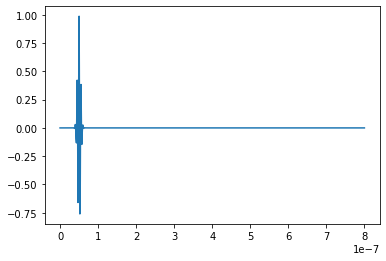

In [1]:
# paraPropPython example use of paraPropPython.py notebook
# s. prohira, c. sbrocco

%matplotlib inline
import paraPropPython as ppp
import numpy as np
import matplotlib.pyplot as pl
import scipy
from scipy import signal
import peakutils as pku
from peakutils.plot import plot as pplot
from scipy.signal import butter, filtfilt
from scipy.optimize import least_squares
from scipy.interpolate import interp1d
from util import interpolate
from PIL import Image
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import pulse


In [3]:
from paralell_scan import *
from pulse import *

In [4]:
#path_to_file_reference = 'ascan_pure_ice_reference/'
#path_to_file = 'ascan_pure_ice_water_pocket/'
path_to_file_reference = 'ascan_pure_ice_reference/'
path_to_file = 'ascan_pure_ice_water_pocket/'



#path_to_file = 'ascan_enceladus_reference/'


from util import *
ascan_rx = np.load(path_to_file + 'ascan.npy')
ascan_rx_ref = np.load(path_to_file_reference + 'ascan.npy')

In [5]:
freq_space = np.load(path_to_file + 'freq_space.npy') #Frequencies used in Simulation
time_space = np.load(path_to_file + 'time_space.npy') #Time space of pulse
tx_pulse_array =  np.load(path_to_file + 'tx_pulse.npy') #Transmitter pulse (complex)
tx_array = np.load(path_to_file + 'tx_array.npy') #Array of Transmitter positions (1D)
rx_array = np.load(path_to_file + 'rx_array.npy') #Array of Receiver positions (2D)

freq_space_ref = np.load(path_to_file_reference + 'freq_space.npy') #Frequencies used in Simulation
time_space_ref = np.load(path_to_file_reference + 'time_space.npy') #Time space of pulse
tx_pulse_array_ref =  np.load(path_to_file_reference + 'tx_pulse.npy') #Transmitter pulse (complex)
tx_array_ref = np.load(path_to_file_reference + 'tx_array.npy') #Array of Transmitter positions (1D)
rx_array_ref = np.load(path_to_file_reference + 'rx_array.npy') #Array of Receiver positions (2D)


#Save Simulation Data to External File
info_file = path_to_file + 'simul_info.txt'
fout = open(info_file, 'r+')

info_file_ref = path_to_file_reference + 'simul_info.txt'
fout_ref = open(info_file_ref, 'r+')

simul_info = []
for line in fout:
    print(line)
    print(line.split())
    simul_info.append(line.split())


simul_info_ref = []
for line in fout_ref: 
    print(line)
    print(line.split())
    simul_info_ref.append(line.split())


method =  str(simul_info[0][0])
nProfile = str(simul_info[1][0])
central_frequency = float(simul_info[2][0]) * 1e6
nSamples = int(simul_info[3][0])
sampling_interval = float(simul_info[4][0])
nyquist_frequency = float(simul_info[5][0])

tStart = 0
tEnd = nSamples*sampling_interval

print(central_frequency)
tx_pulse = pulse(A=1, f= central_frequency, tstart=tStart, tend=tEnd, tsamp=sampling_interval)
tx_pulse.real = tx_pulse_array.real
tx_pulse.imag = tx_pulse_array.imag
tx_pulse.abs = abs(tx_pulse_array)


# Reference Simulation

method_ref =  str(simul_info_ref[0][0])
nProfile_ref = str(simul_info_ref[1][0])
central_frequency_ref = float(simul_info_ref[2][0]) * 1e6
nSamples_ref = int(simul_info_ref[3][0])
sampling_interval_ref = float(simul_info_ref[4][0])
nyquist_frequency_ref = float(simul_info_ref[5][0])

tStart_ref = 0
tEnd_ref = nSamples_ref*sampling_interval_ref

print(central_frequency_ref)
tx_pulse_ref = pulse(A=1, f= central_frequency_ref, tstart=tStart_ref, tend=tEnd_ref, tsamp=sampling_interval_ref)
tx_pulse_ref.real = tx_pulse_array.real
tx_pulse_ref.imag = tx_pulse_array.imag
tx_pulse_ref.abs = abs(tx_pulse_array_ref)


func	#method

['func', '#method']
pure_ice_water_pocket	nProfile

['pure_ice_water_pocket', 'nProfile']
500.0	#Central-Frequency-MHz

['500.0', '#Central-Frequency-MHz']
1999	#Number-Samples

['1999', '#Number-Samples']
5e-10	#Sampling-interval-s

['5e-10', '#Sampling-interval-s']
999999999.9999999	#nyquist-freauency-Hz

['999999999.9999999', '#nyquist-freauency-Hz']
2021.06.24.17:06:07	#datetime

['2021.06.24.17:06:07', '#datetime']
func	#method

['func', '#method']
pure_ice	nProfile

['pure_ice', 'nProfile']
500.0	#Central-Frequency-MHz

['500.0', '#Central-Frequency-MHz']
1999	#Number-Samples

['1999', '#Number-Samples']
5e-10	#Sampling-interval-s

['5e-10', '#Sampling-interval-s']
999999999.9999999	#nyquist-freauency-Hz

['999999999.9999999', '#nyquist-freauency-Hz']
2021.06.27.10:11:33	#datetime

['2021.06.27.10:11:33', '#datetime']
500000000.0
500000000.0


[ 10.  20.  30.  50.  80. 100.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]


C:\Users\gianl\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


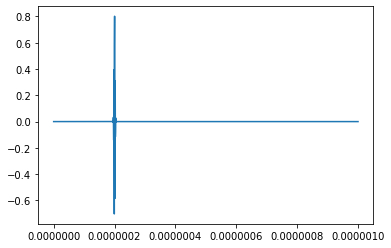

In [8]:
print(Range_list)
print(sourceDepth_list)
a = np.load('ascan_pure_ice_water_pocket/tx_pulse.npy', 'r')
pl.plot(time_space, a)

In [7]:
# Water Pocket Simulation

Range_list = rx_array[0,:,0]
sourceDepth_list = tx_array[:]
receiverDepth_list = rx_array[:,0,1]

nRanges = len(Range_list)
nSources = len(sourceDepth_list)
nDepths_rx = len(receiverDepth_list)
print(receiverDepth_list)

# Reference Simulation

Range_list_ref= rx_array_ref[0,:,0]
sourceDepth_list_ref = tx_array_ref[:]
receiverDepth_list_ref = rx_array[:,0,1]

nRanges_ref = len(Range_list_ref)
nSources = len(sourceDepth_list_ref)
nDepths_rx = len(receiverDepth_list)
print(receiverDepth_list_ref)
print(Range_list)
print(Range_list_ref)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
[ 10.  20.  30.  50.  80. 100.]
[ 10.  20.  30.  50.  80. 100.]


In [6]:
#spectrum_rx = ascan_rx[:,0,4,5]
#print(Range_list[4], sourceDepth_list[5])

pl.plot(tx_pulse.freq_space, spectrum_rx)  # transmitted Pulse in frequency space
pl.show()

pulse_rx = np.fft.ifft(spectrum_rx)
pl.plot(tx_pulse.time_space, tx_pulse.real)  # transmitted Pulse in time space
pl.show()

range_scan = np.zeros((nRanges, tx_pulse.nSamples))
for i in range(nRanges):
    spectrum_rx = ascan_rx[:,0,i,0]
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    
    pulse_rx = np.fft.ifft(spectrum_rx)
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9,0.75e9, 1/sampling_interval,4)
    pl.plot(tx_pulse.time_space, abs(pulse_rx)) # transmitted and received pulses
    pl.show()
    range_scan[i,:] = abs(pulse_rx)
fig=pl.figure(figsize=(12,10), dpi =100)
ax = fig.add_subplot(111)
pl.imshow(range_scan, extent=(0,max(tx_pulse.time_space)*1e9, max(Range_list), 0),aspect='auto')
pl.xlabel('Time [ns]', fontsize=20)
pl.ylabel('Depth [m]', fontsize=20)
pl.ylim(80,0)
pl.colorbar()
pl.xticks(fontsize=18)
pl.yticks(fontsize=18)
pl.show()

NameError: name 'spectrum_rx' is not defined

In [7]:
#spectrum_rx_ref = ascan_rx_ref[:,0,4,5]
#print(Range_list[4], sourceDepth_list[5])

pl.plot(tx_pulse_ref.freq_space, spectrum_rx_ref)  # transmitted Pulse in frequency space
pl.show()

pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
pl.plot(tx_pulse_ref.time_space, tx_pulse_ref.real)  # transmitted Pulse in time space
pl.show()

range_scan_ref = np.zeros((nRanges_ref, tx_pulse_ref.nSamples))
for i in range(nRanges_ref):
    spectrum_rx_ref = ascan_rx_ref[:,0,i,0]
    nHalf_ref = int(len(spectrum_rx_ref)/2)
    spectrum_rx_ref[:nHalf_ref] = np.zeros(nHalf_ref)
    
    pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
    pulse_rx_ref = butterBandpassFilter(pulse_rx_ref, 0.25e9,0.75e9, 1/sampling_interval_ref,4)
    pl.plot(tx_pulse_ref.time_space, abs(pulse_rx_ref)) # transmitted and received pulses
    pl.show()
    
    range_scan_ref[i,:] = abs(pulse_rx_ref)
    

NameError: name 'spectrum_rx_ref' is not defined

NameError: name 'range_scan' is not defined

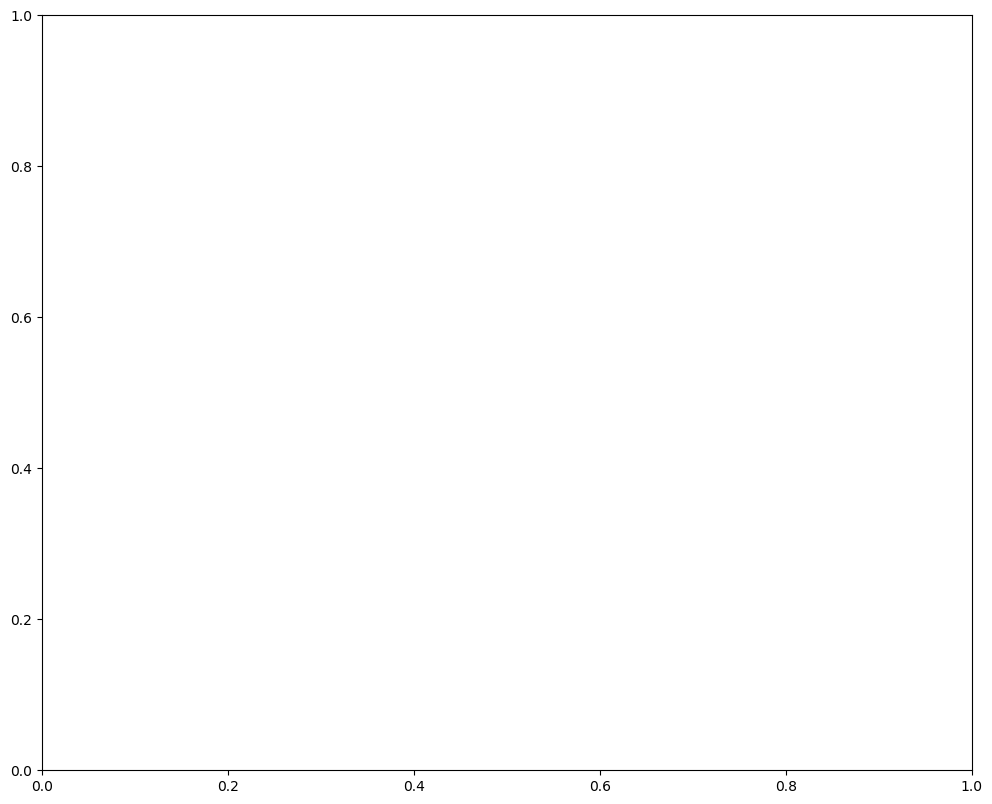

In [8]:
fig=pl.figure(figsize=(12,10), dpi =100)
ax = fig.add_subplot(111)
pl.imshow(range_scan, extent=(0,max(tx_pulse_ref.time_space)*1e9, max(Range_list_ref), 0),aspect='auto')
pl.colorbar()
pl.show()

In [10]:
depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))

fitfunc = lambda p, x: gaussian(x, p[0], p[1], p[2], p[3])  # fit function for SciPy optimize
errfunc = lambda p, x, y: fitfunc(p, x) - y  # residual function -> minimized by SciPy optimize

fitfunc2 = lambda q, x: gauss_pulse(x, q[0], 500e6, q[1]) #.real
errfunc2 = lambda q, x, y: fitfunc2(q, x) - y

In [11]:
def gauss_pulse(t, t_central, frequency, amplitude):
    return amplitude * scipy.signal.gausspulse(t-t_central, frequency)

In [12]:
def gaussian(x, mu, sig, norm, base):
    a = -1. * pow(x - mu, 2. ) / (2 * pow(sig, 2.))
    return norm * np.exp(a) + base

Text(0, 0.5, 'Amplitude [arb.]')

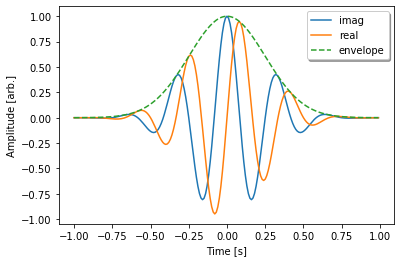

In [13]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=3, retquad=True, retenv=True)
plt.plot(t, i, label='imag')
plt.plot(t, q, label='real')
plt.plot(t, e, '--', label='envelope')
plt.legend(shadow=True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [arb.]')
#plt.title('Real and Imaginary Part and Envelope \n of a Gaussian Pulse with $f_c$ = 500 MHz')

C:\Users\gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


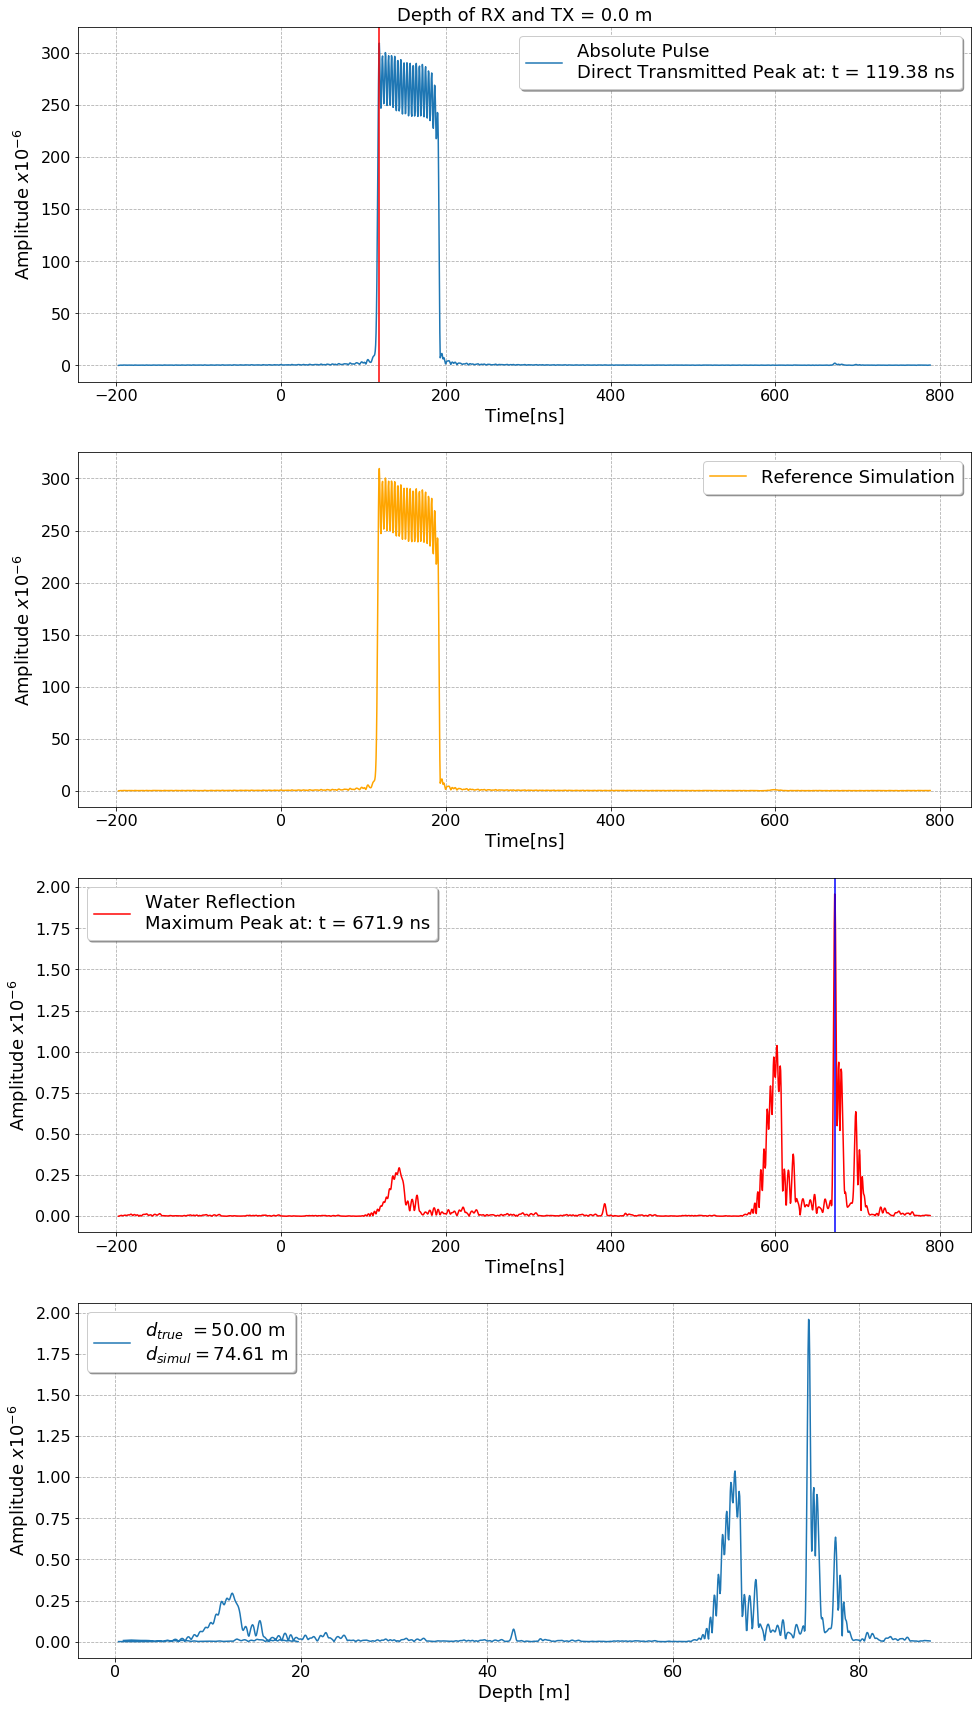

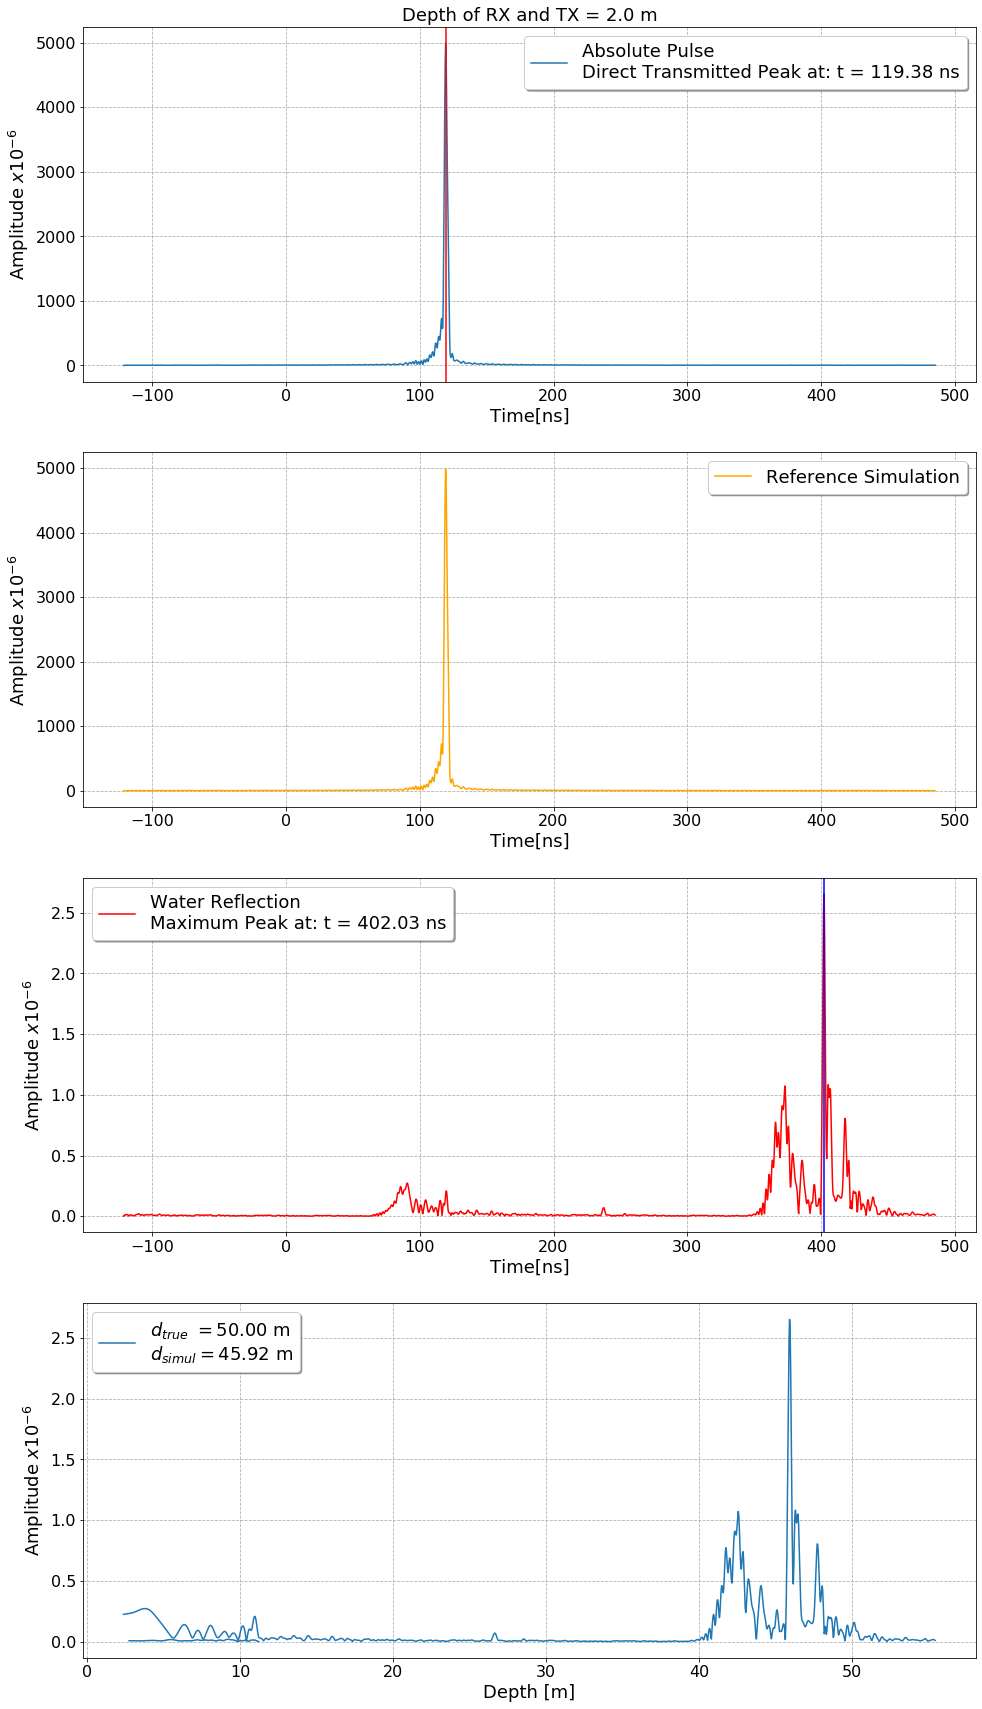

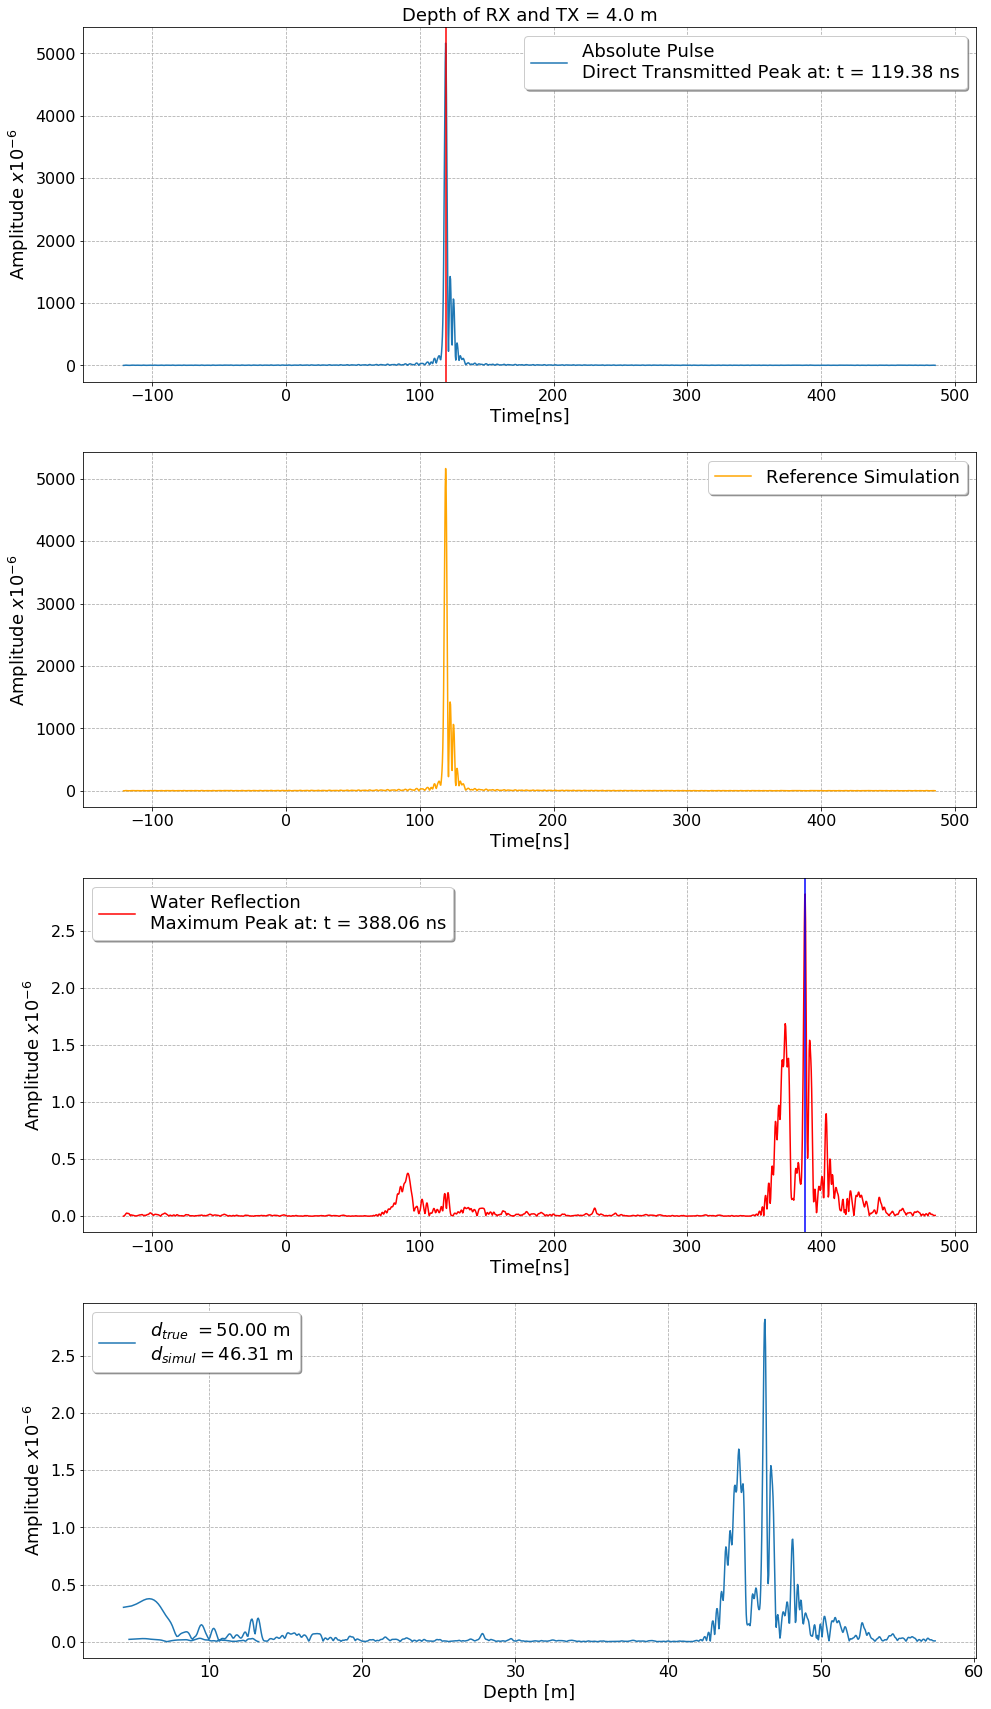

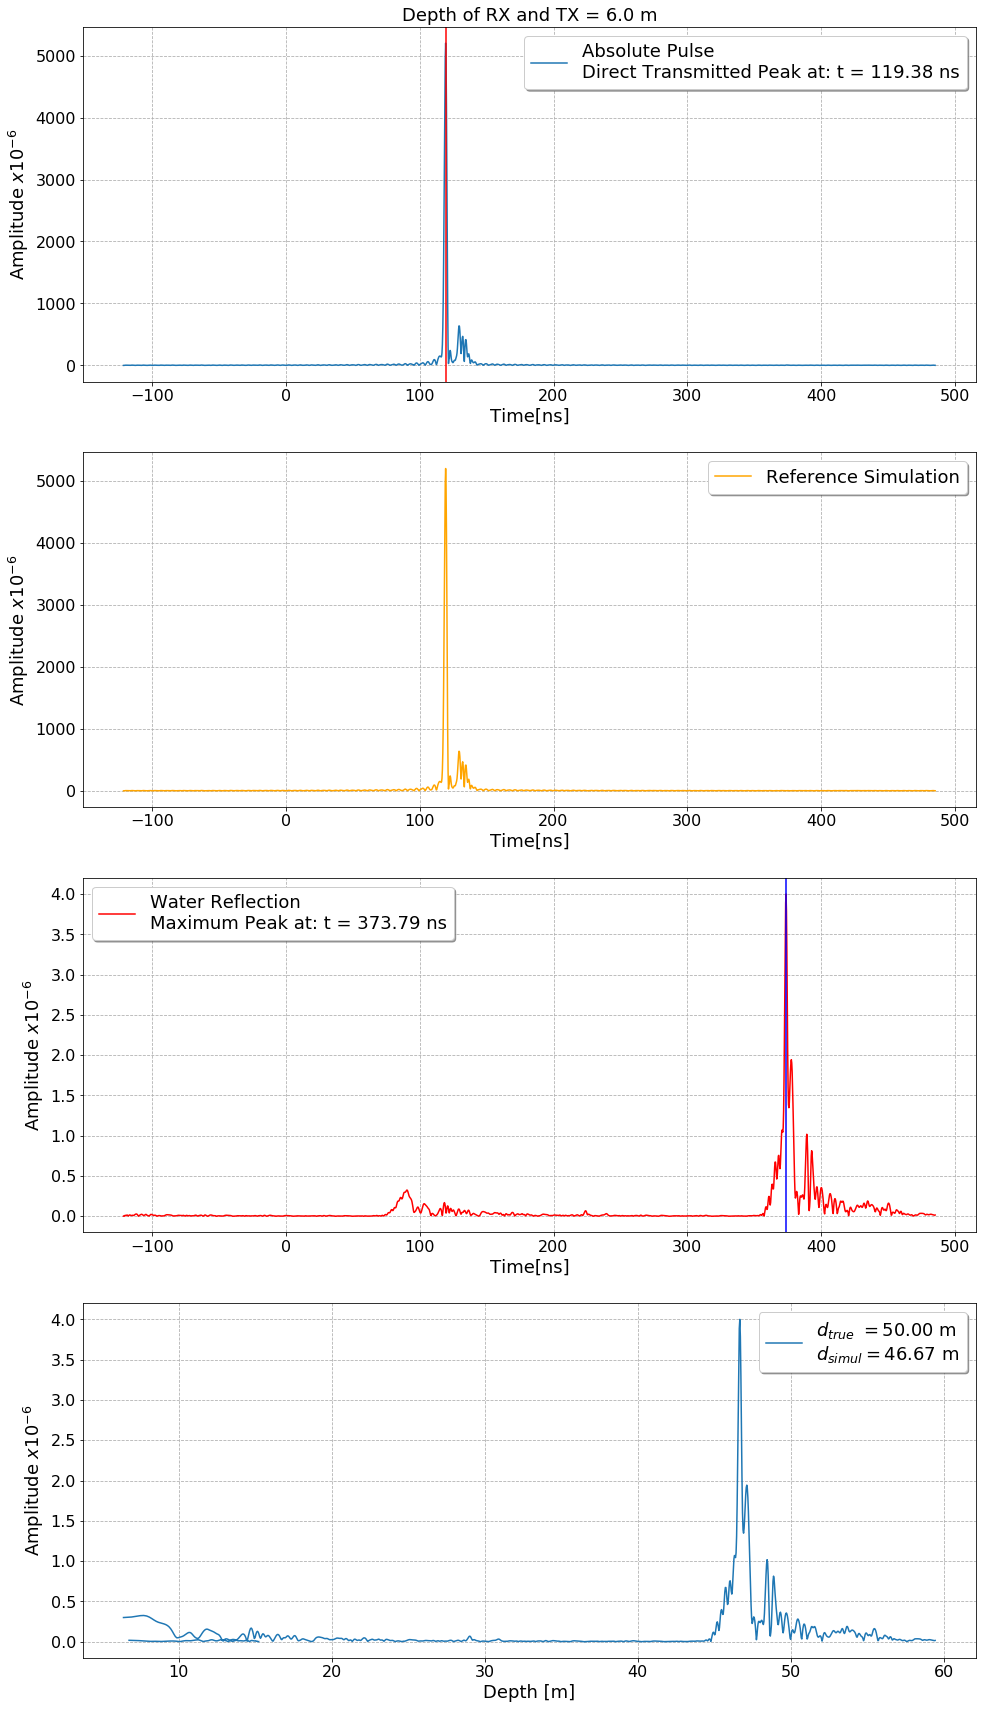

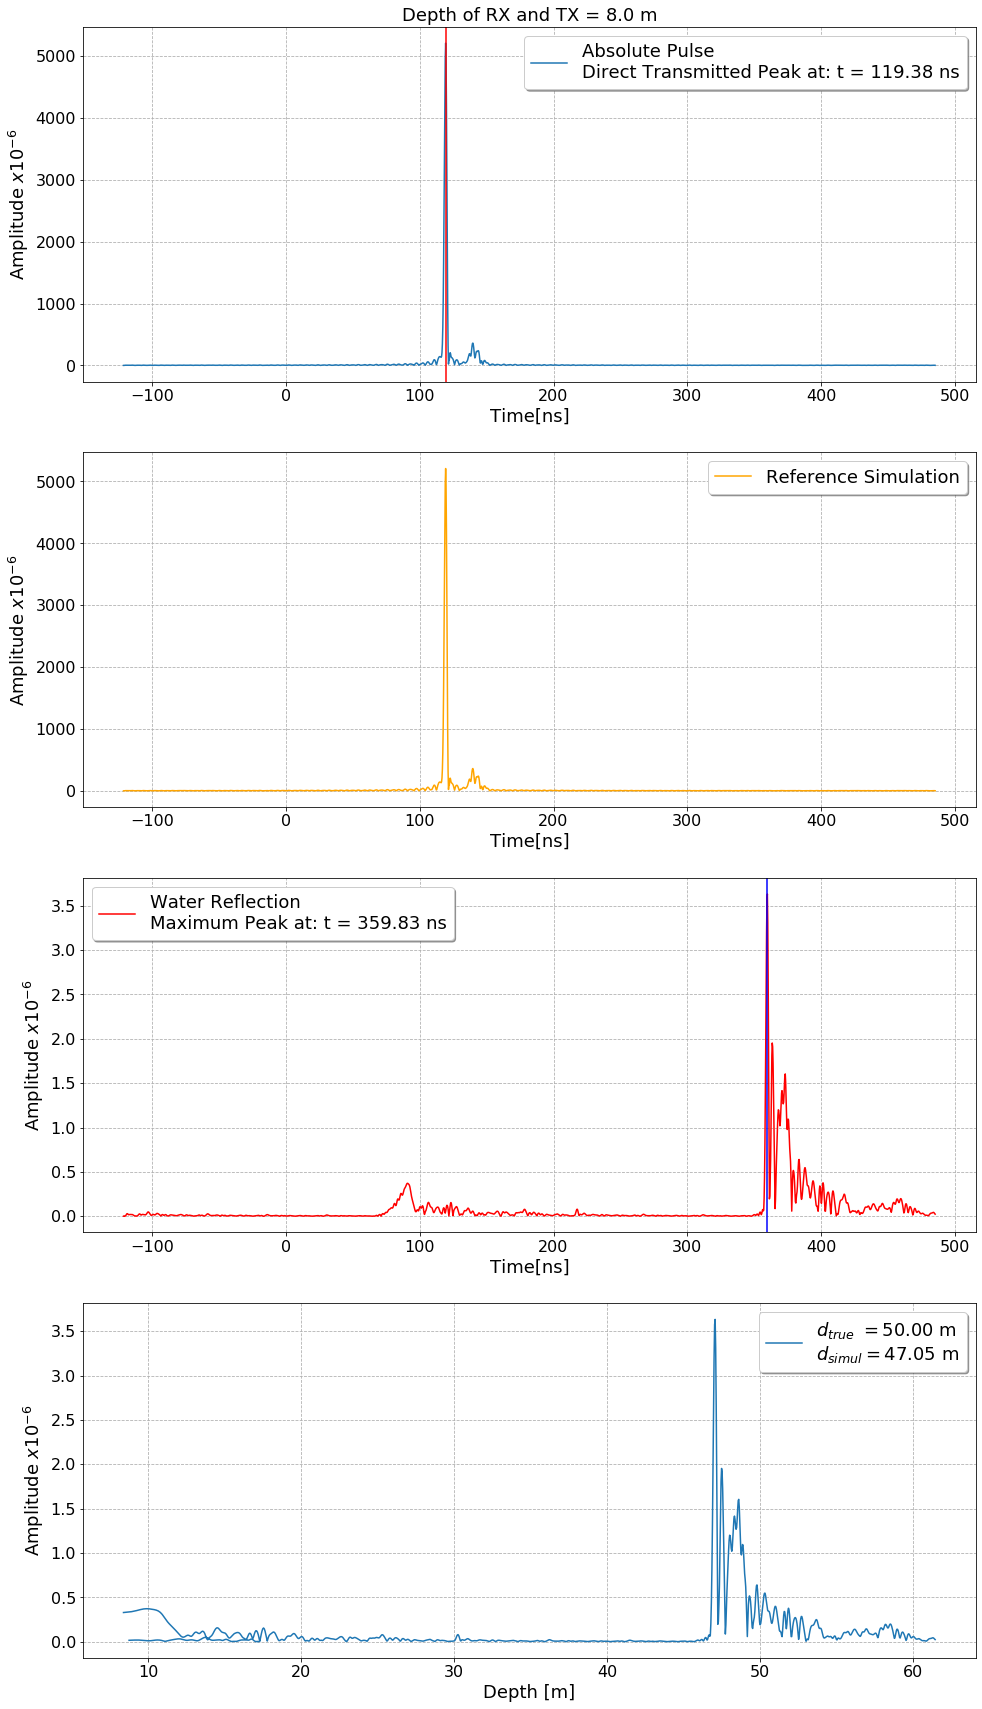

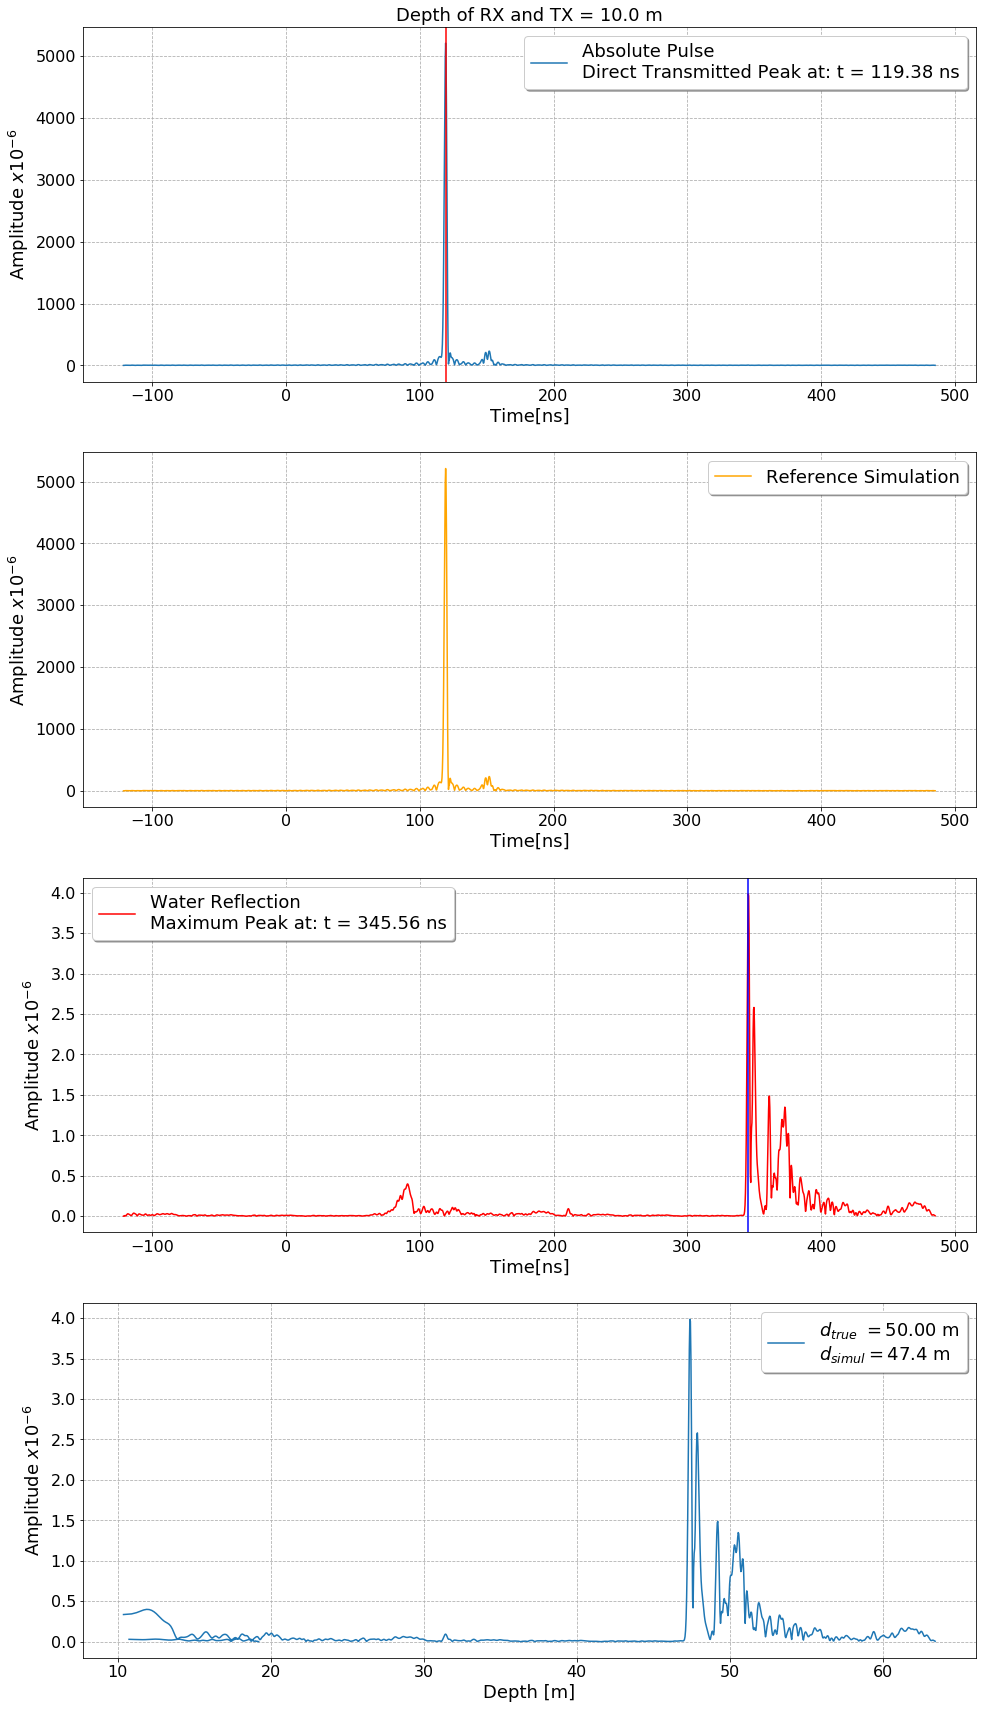

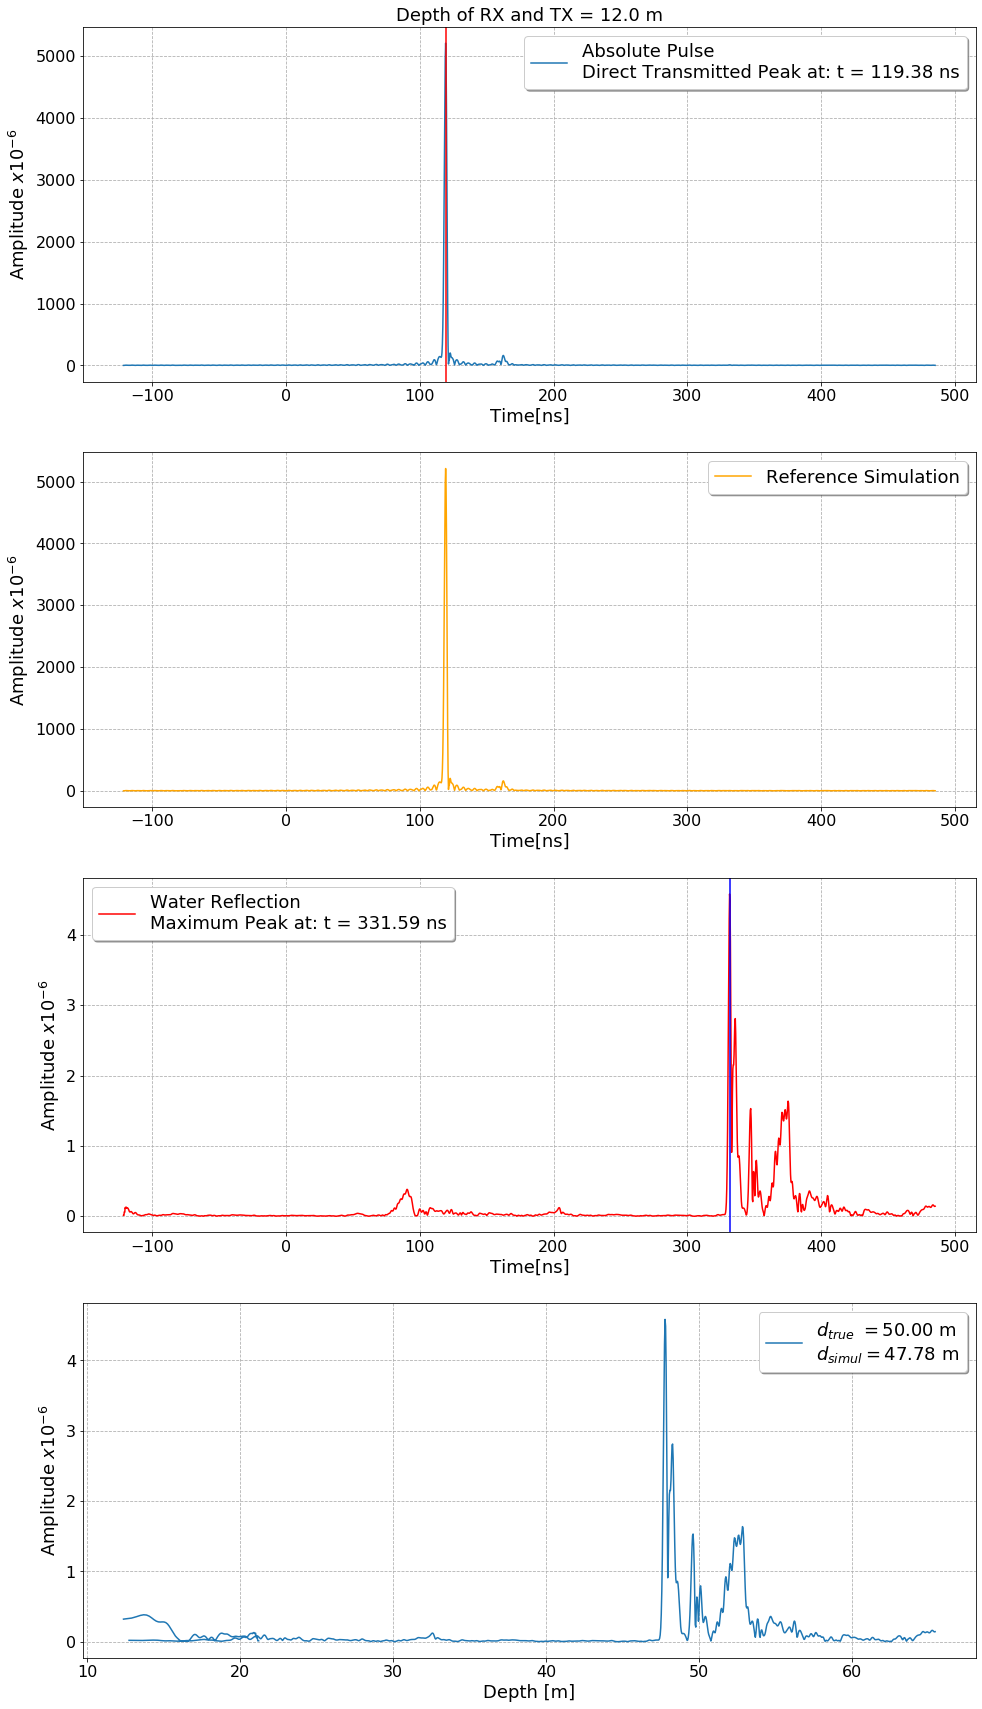

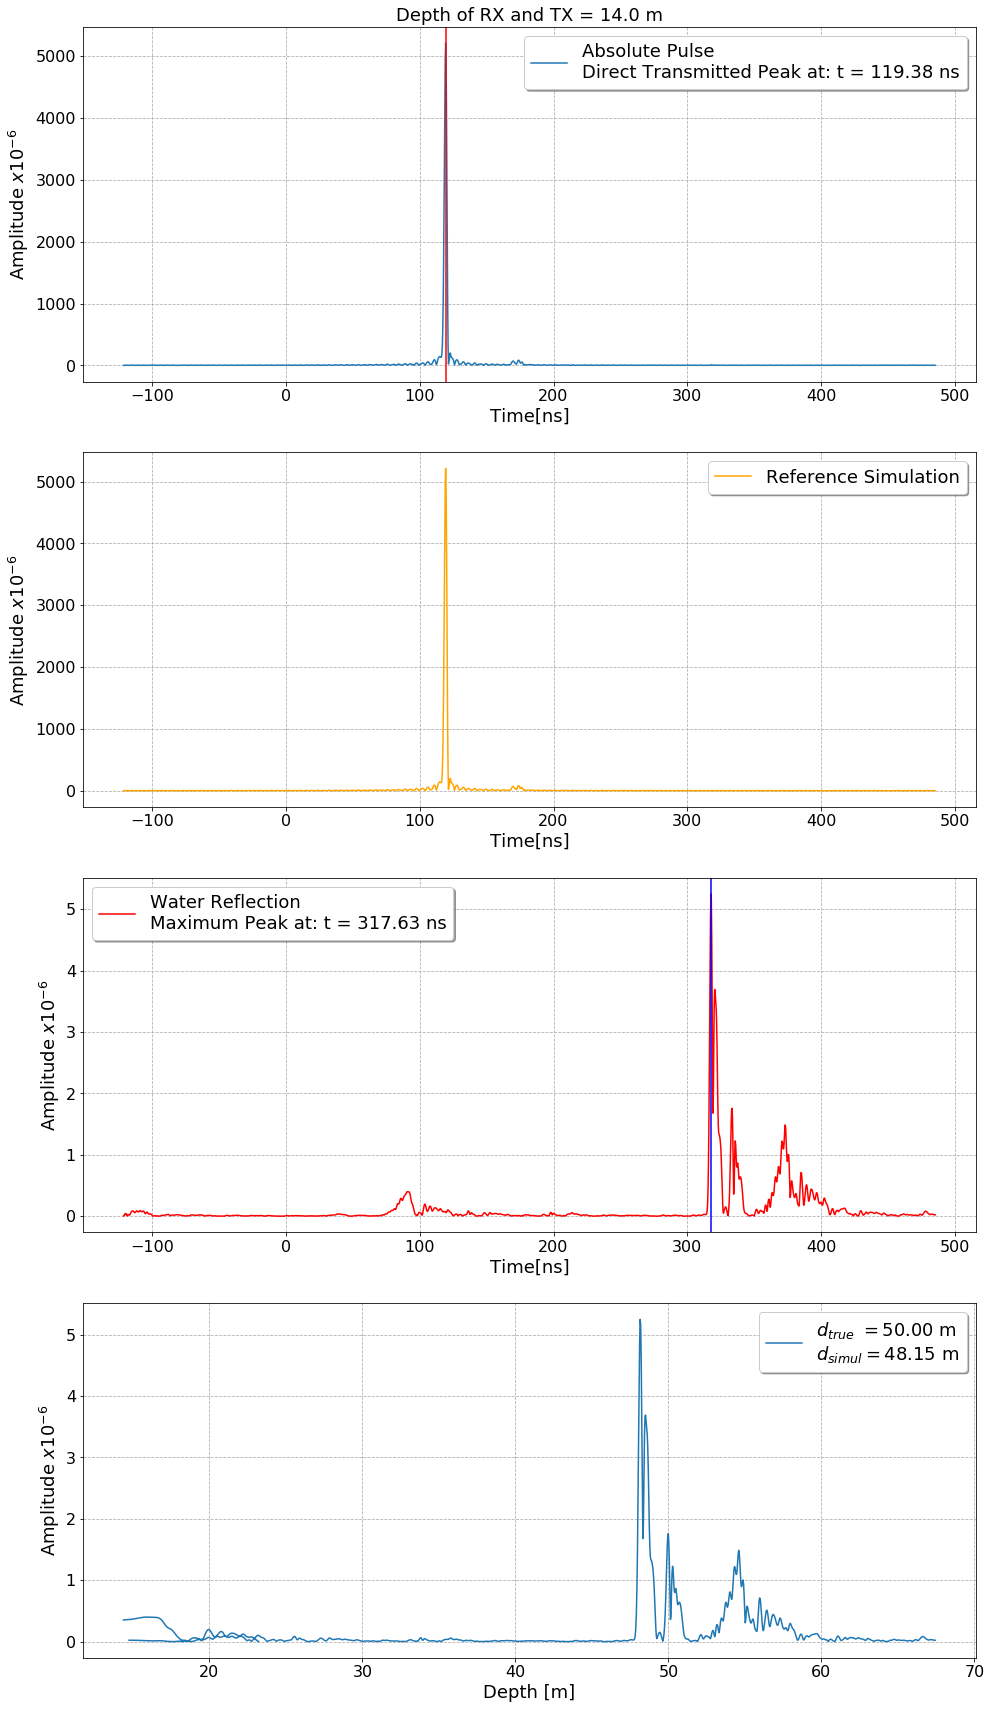

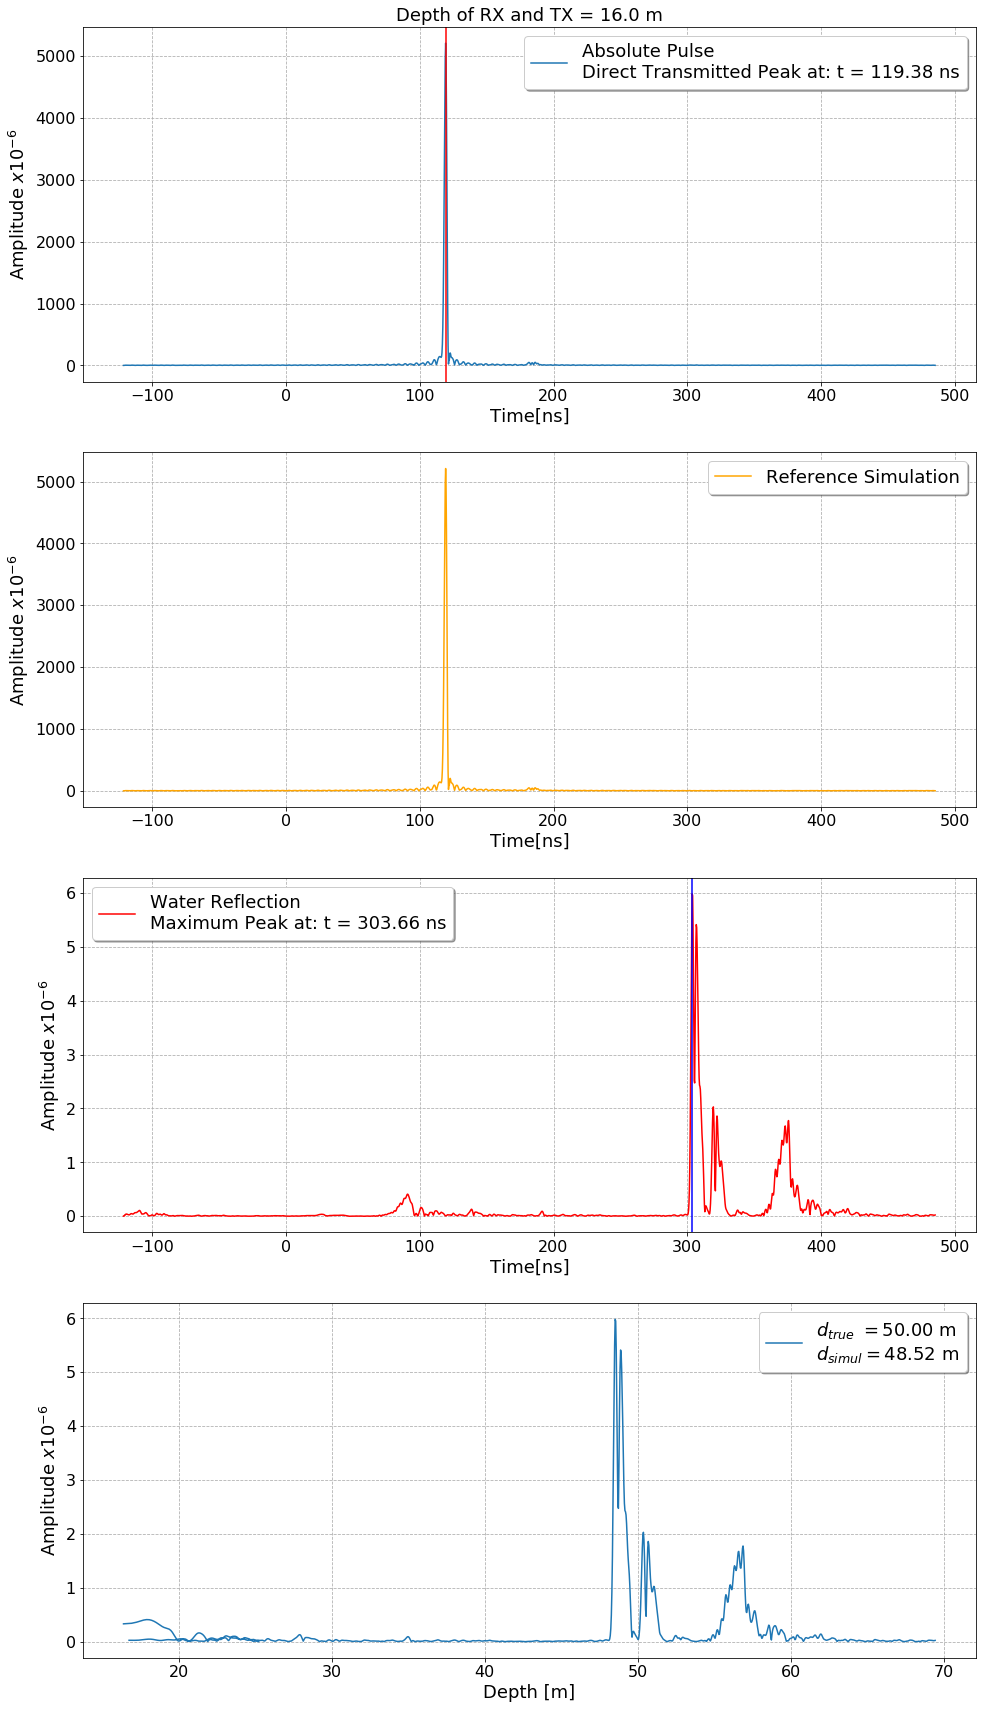

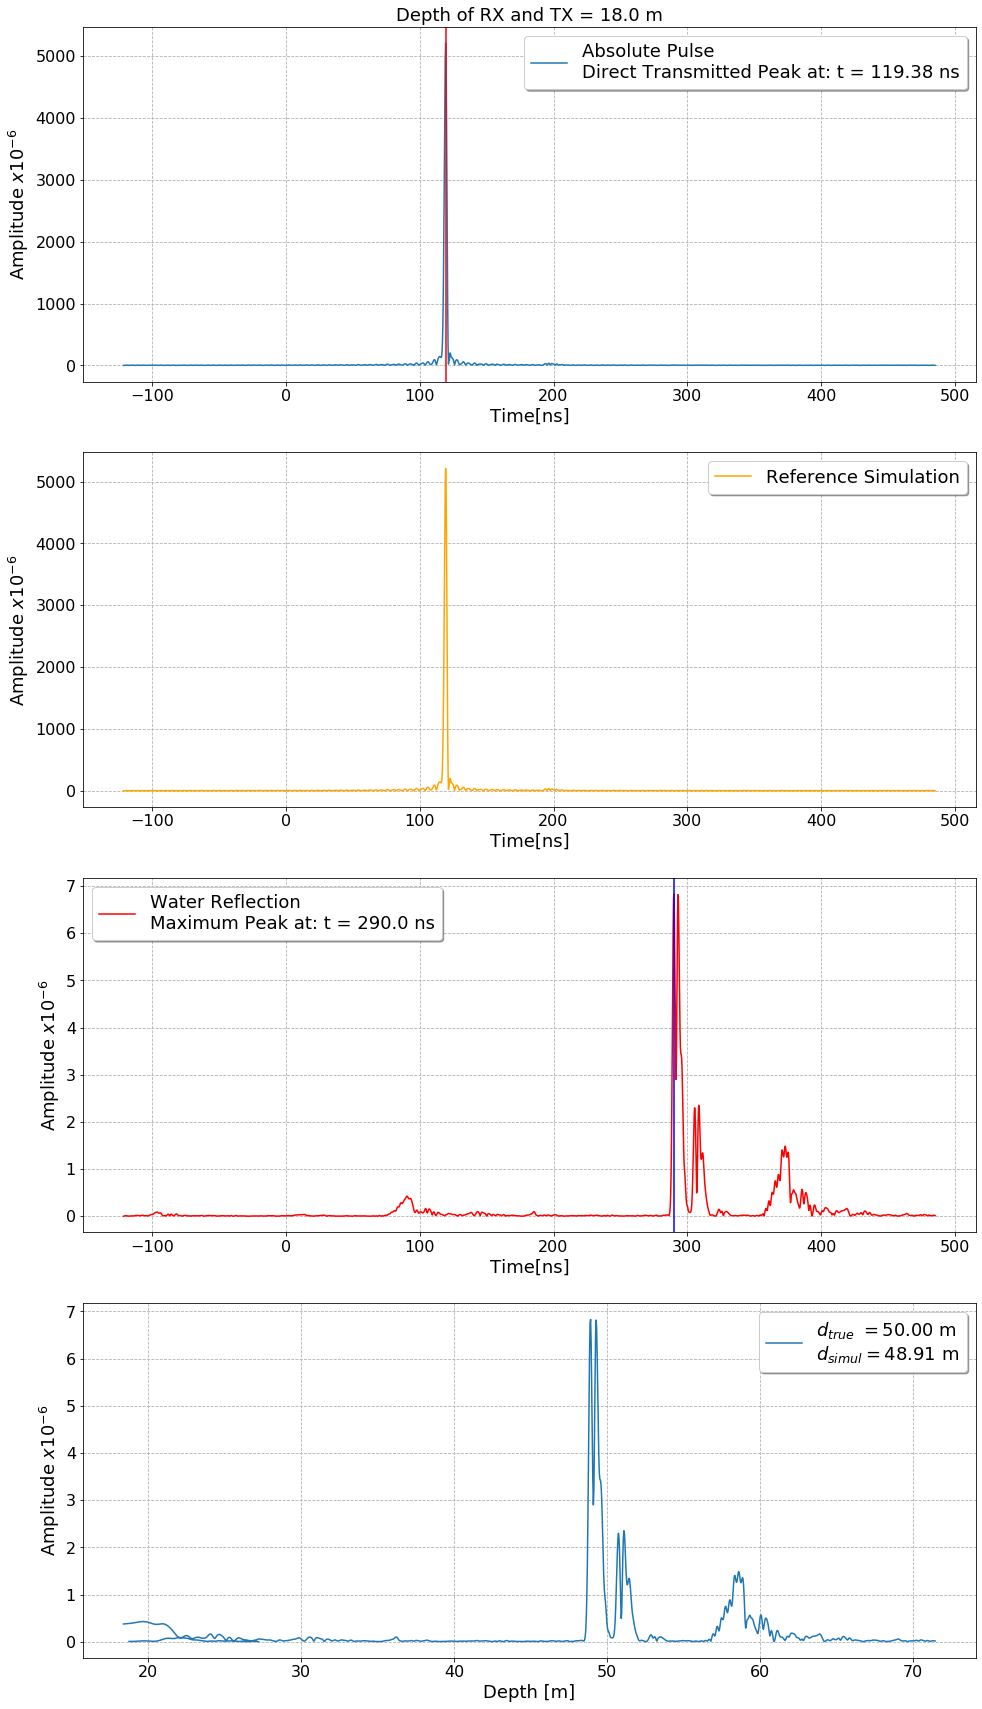

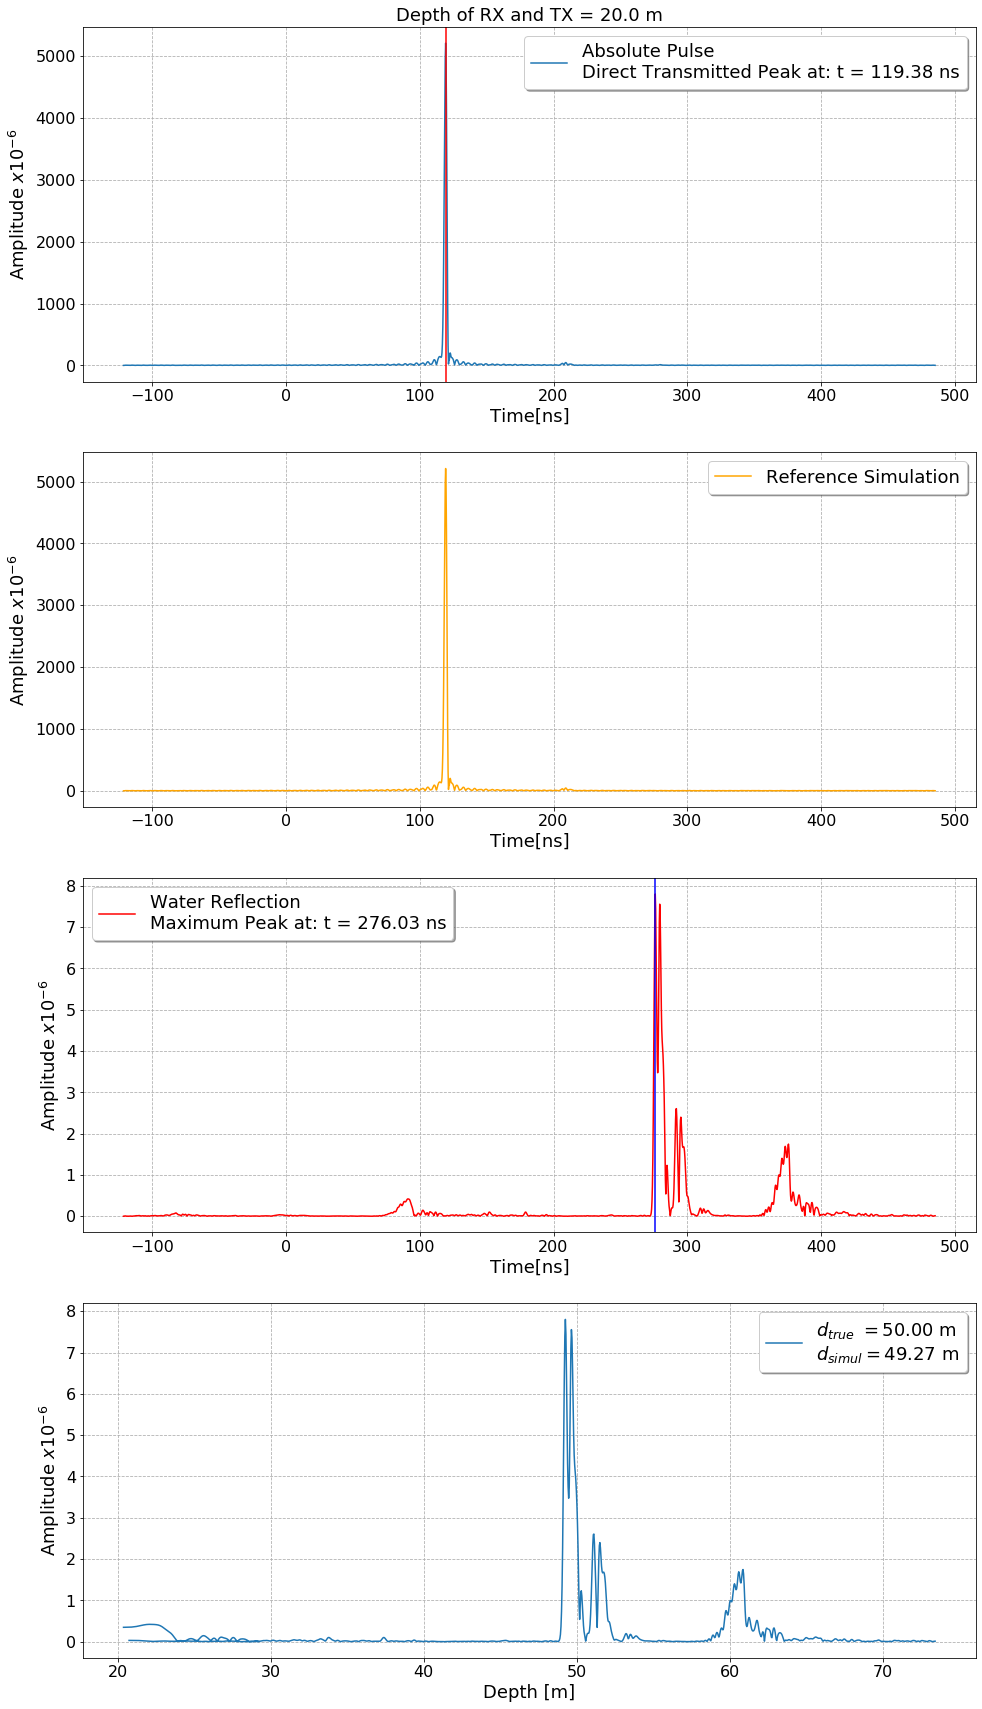

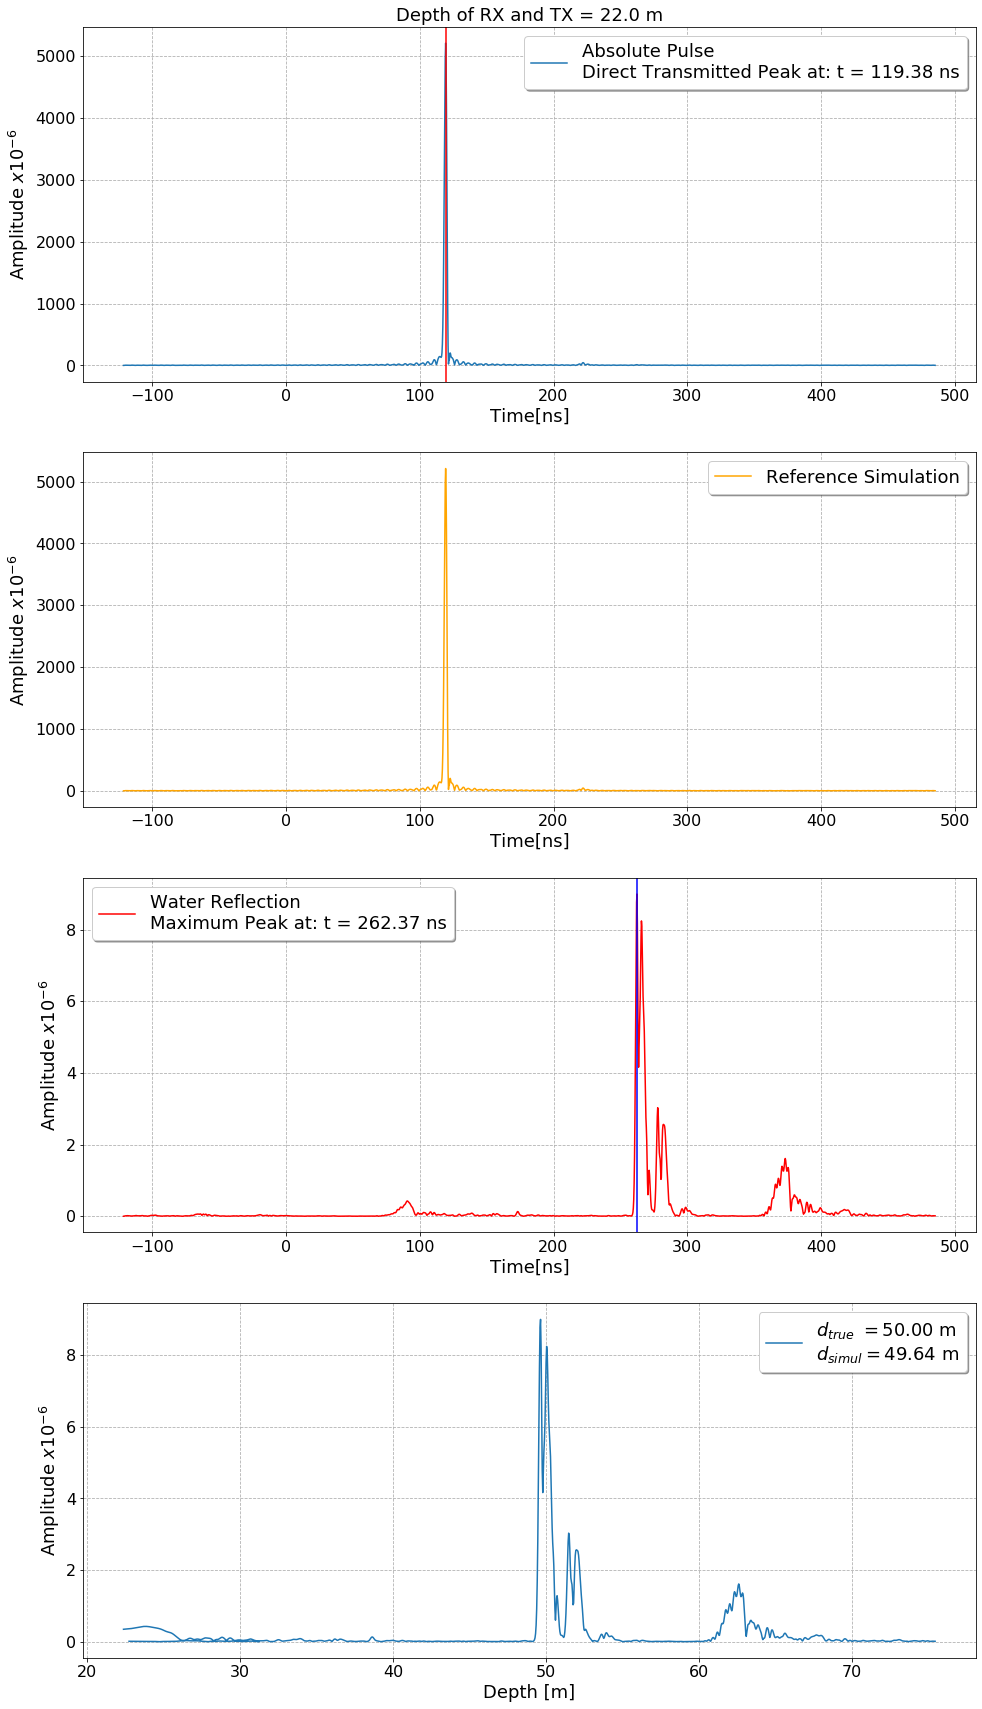

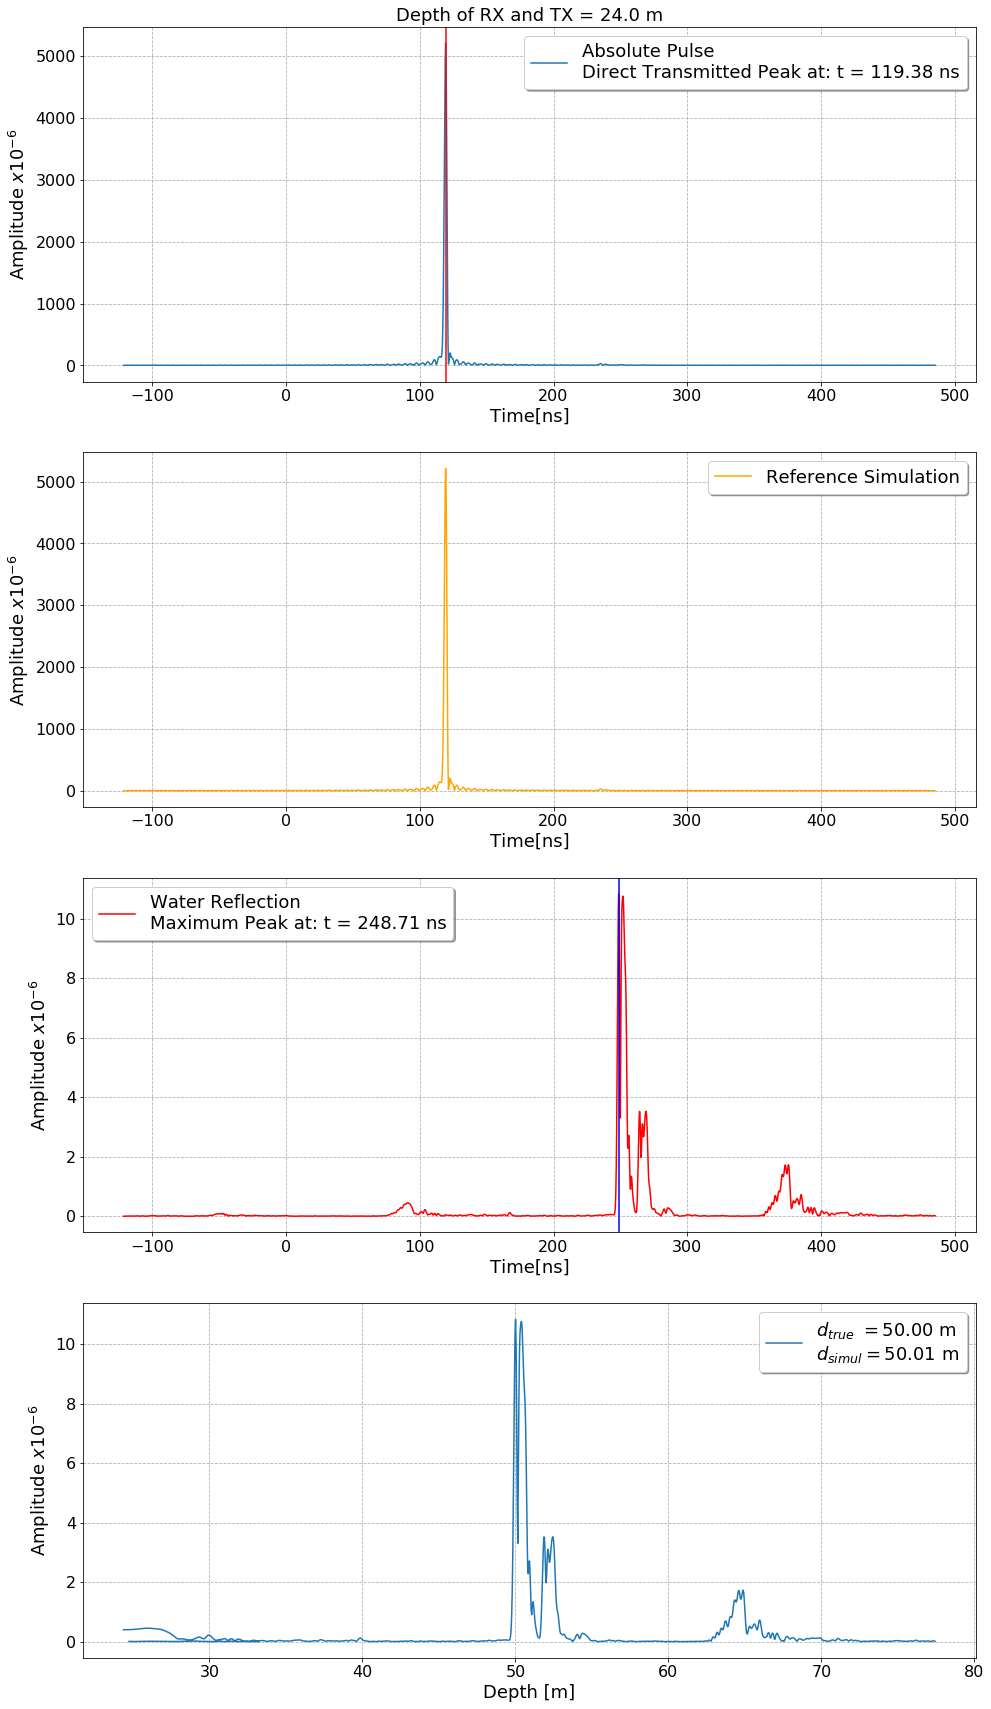

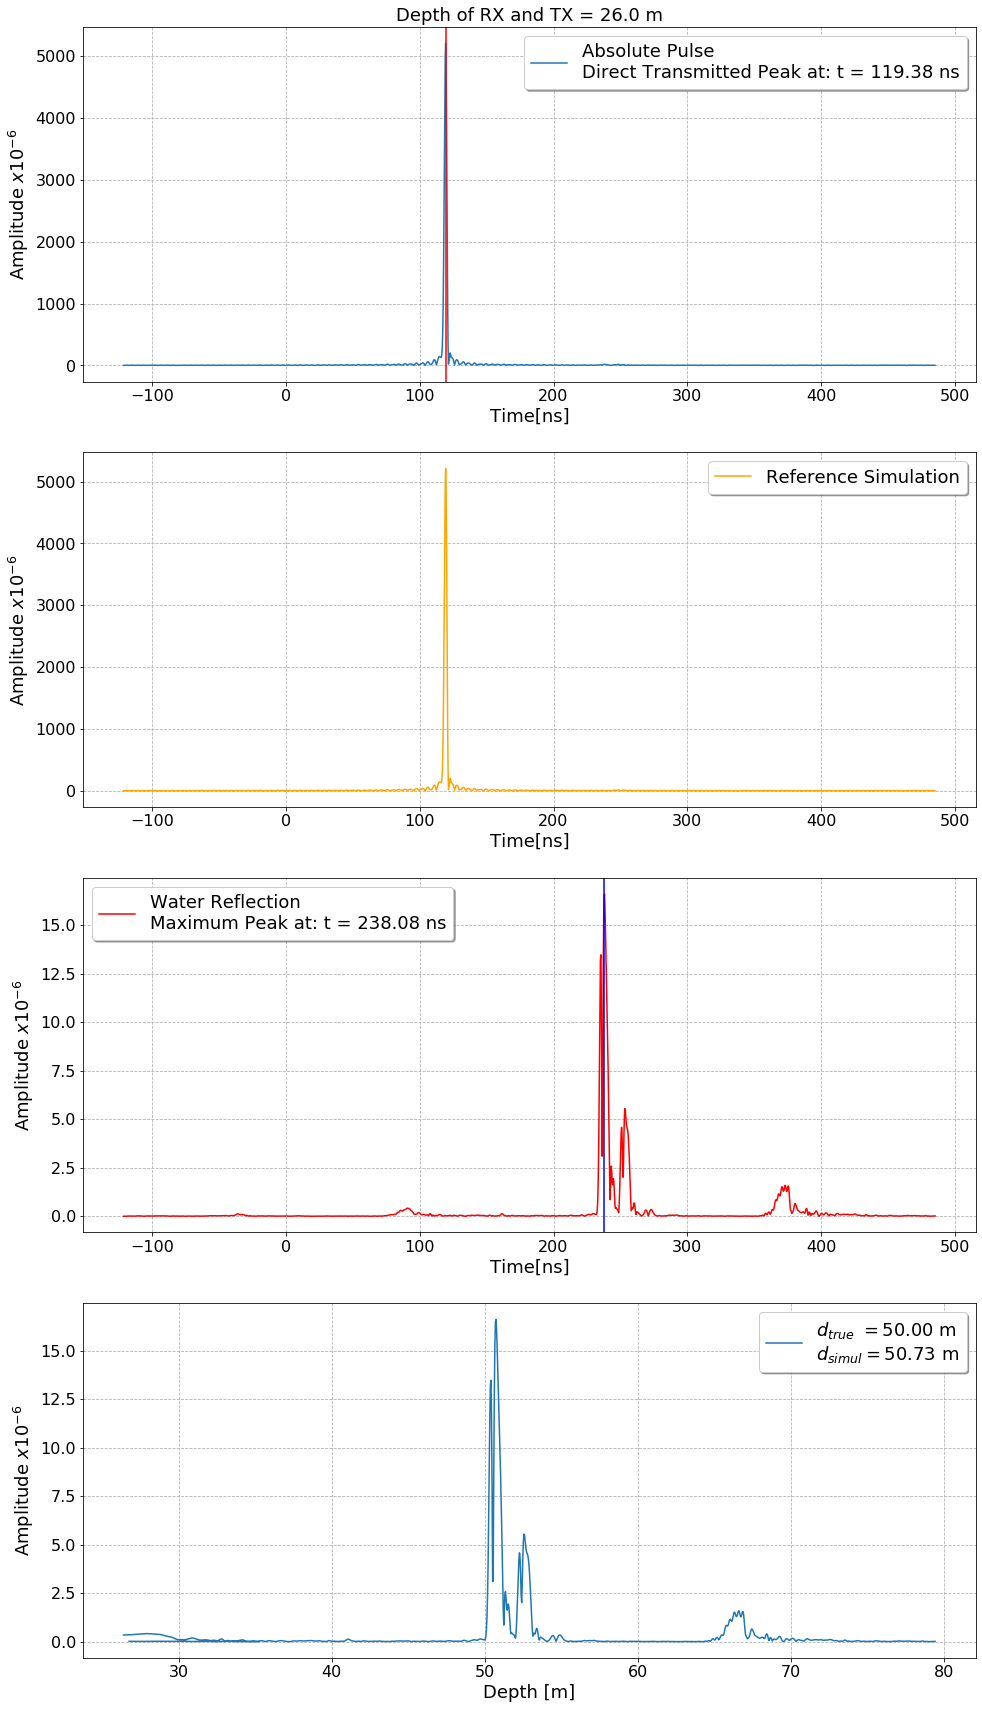

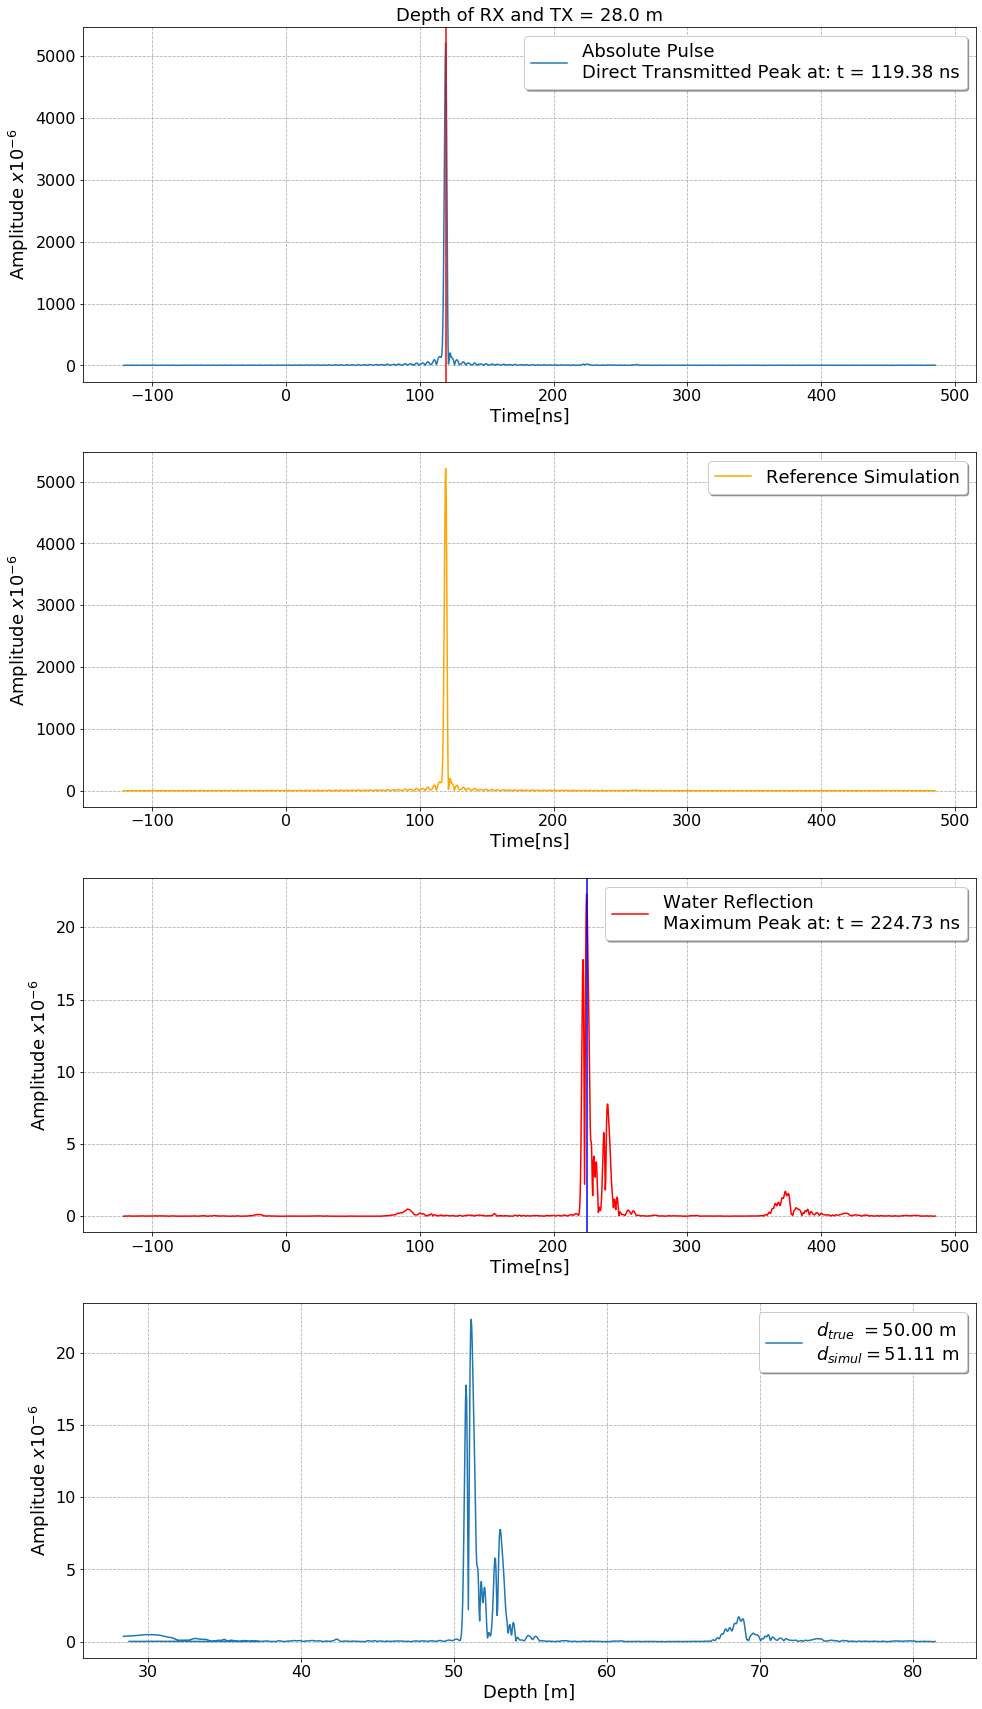

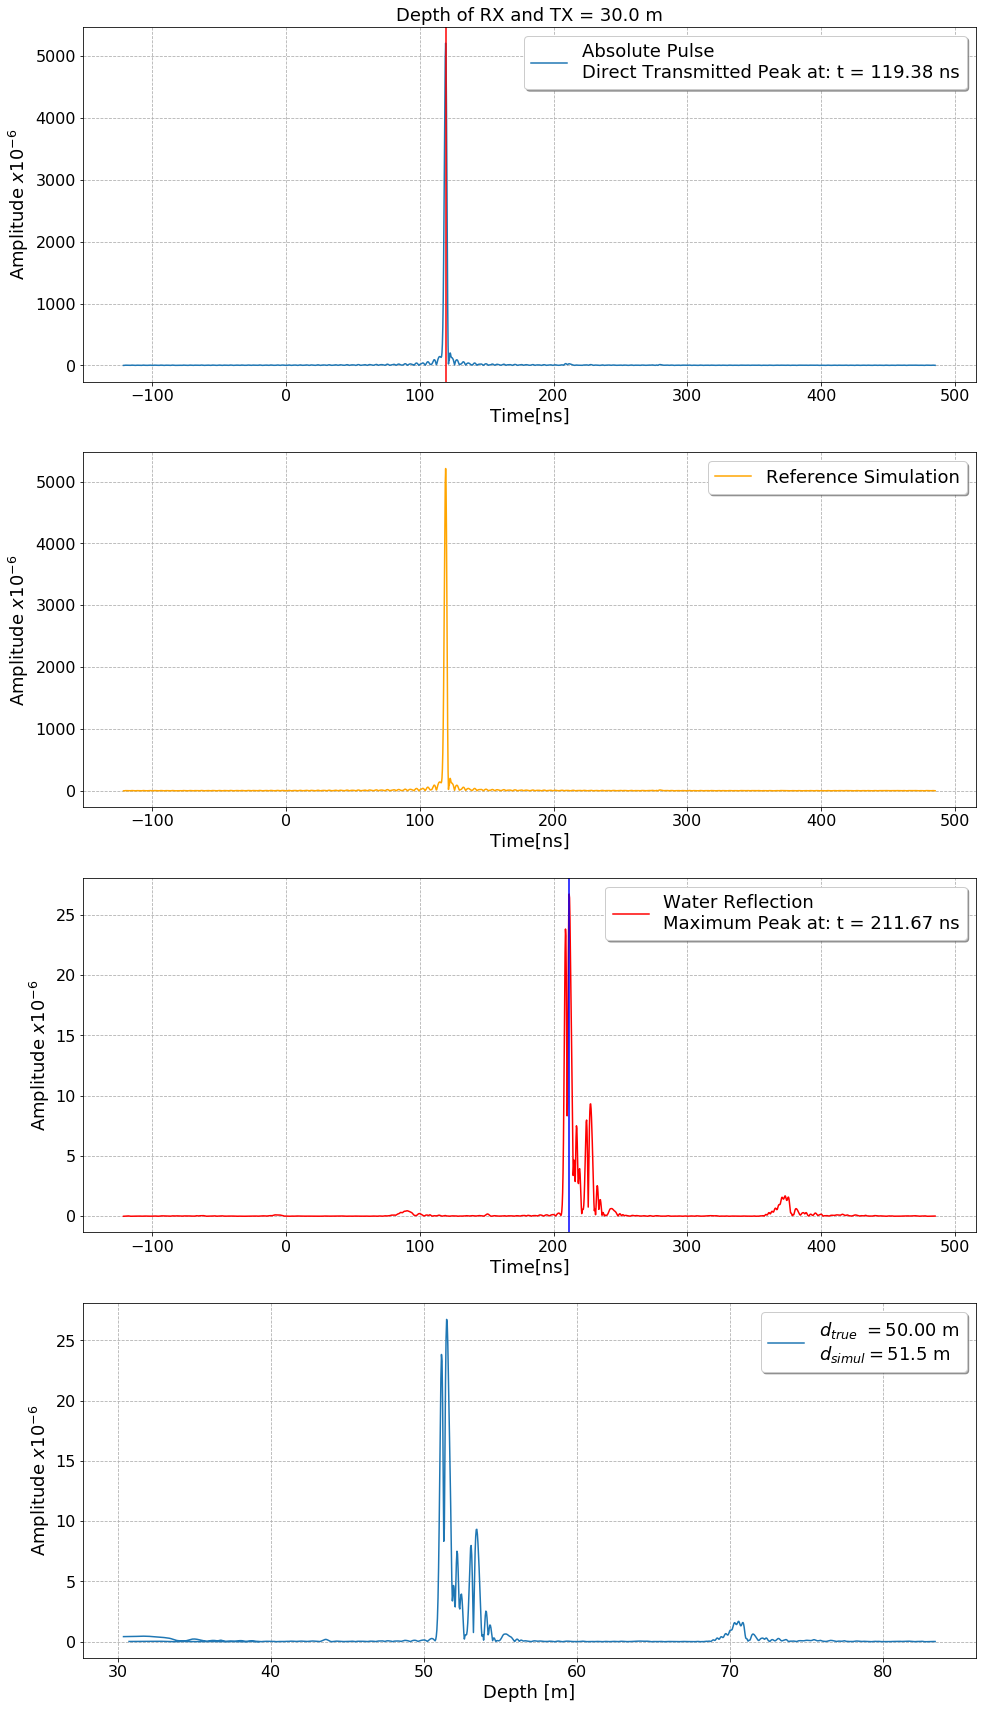

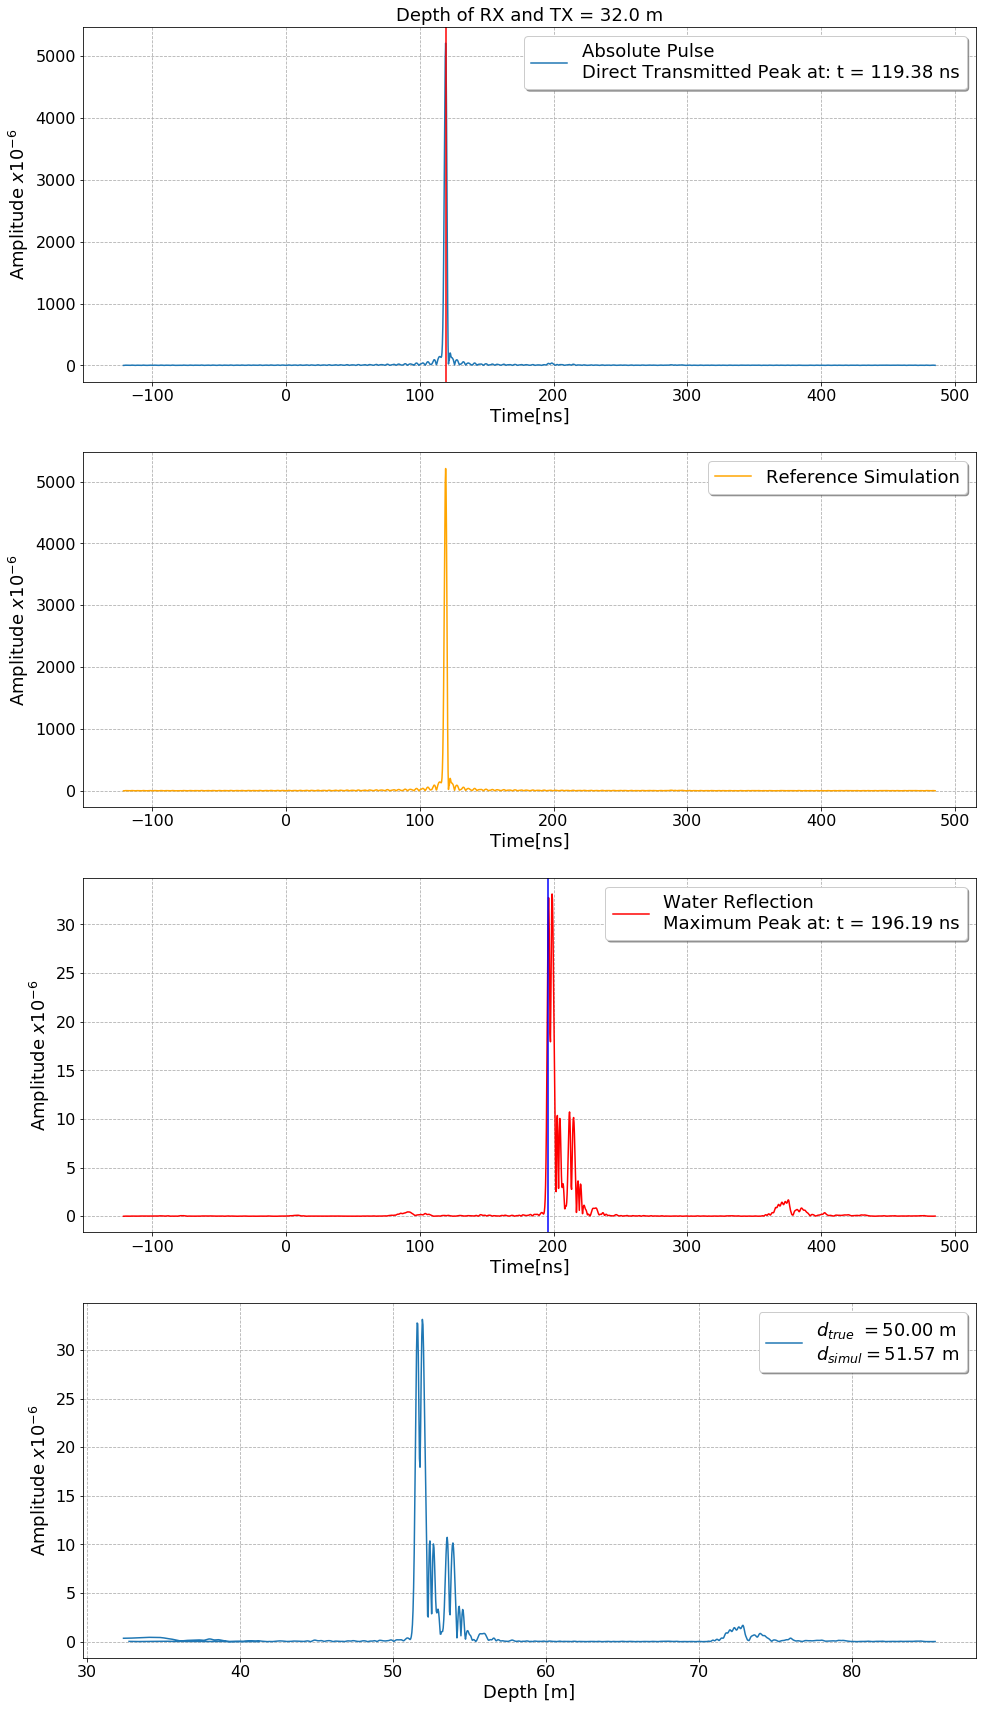

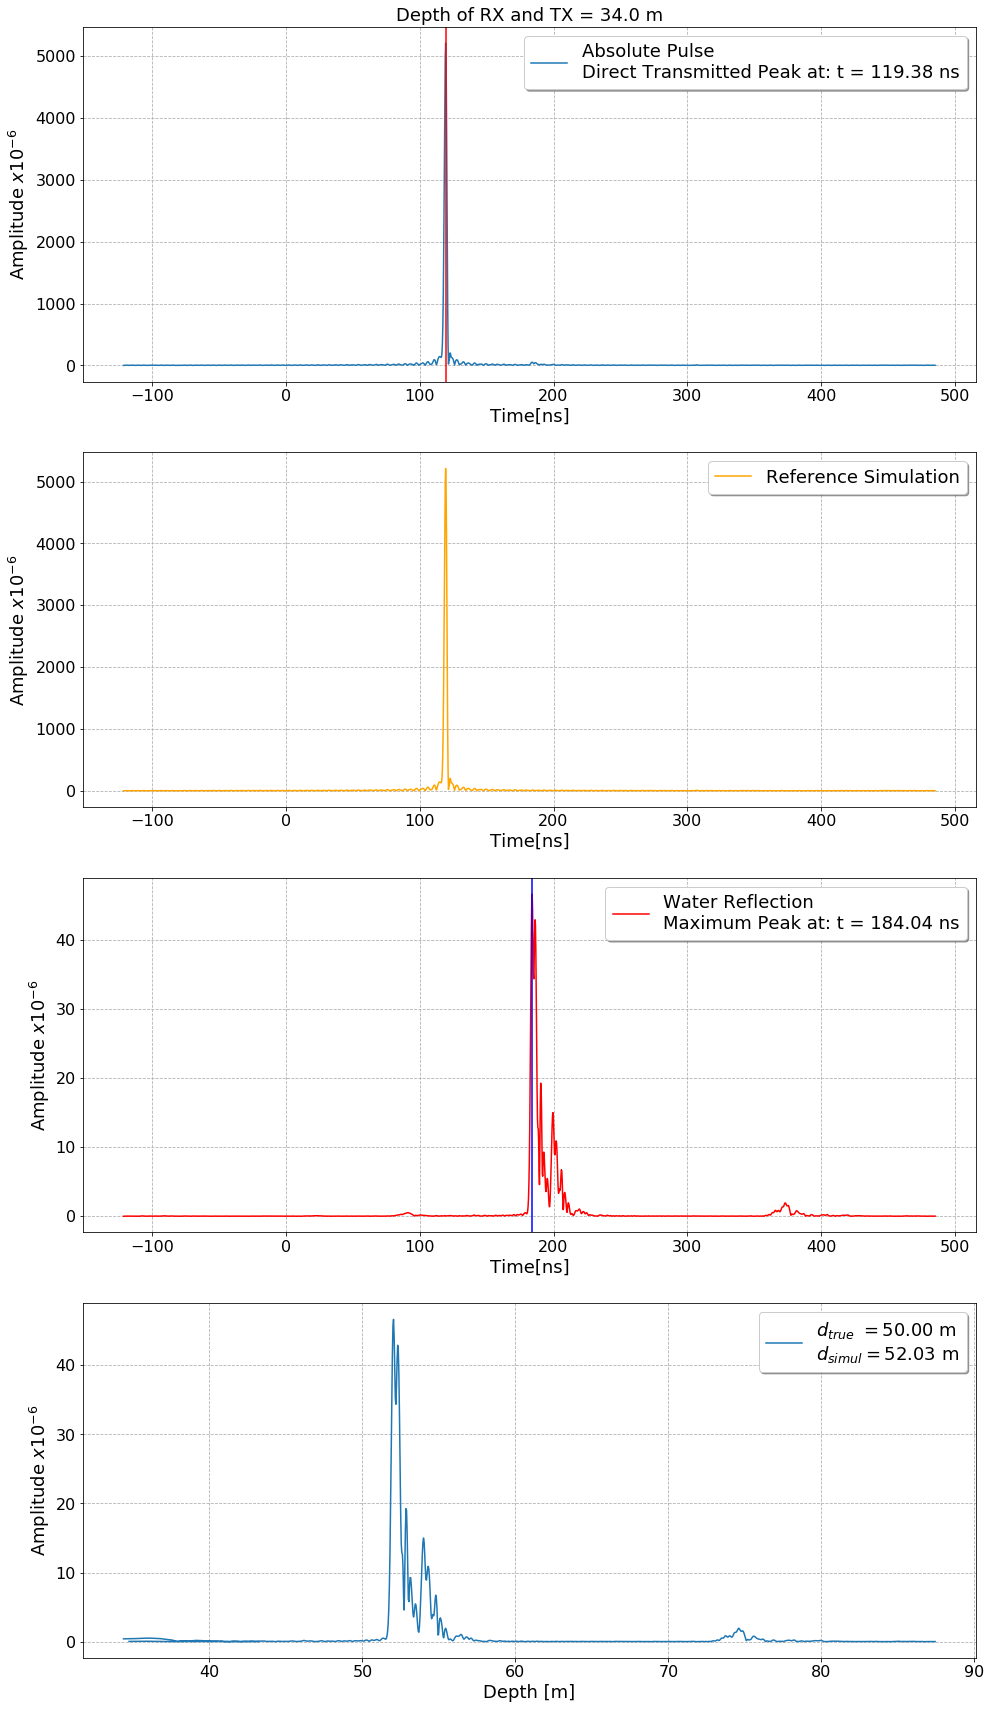

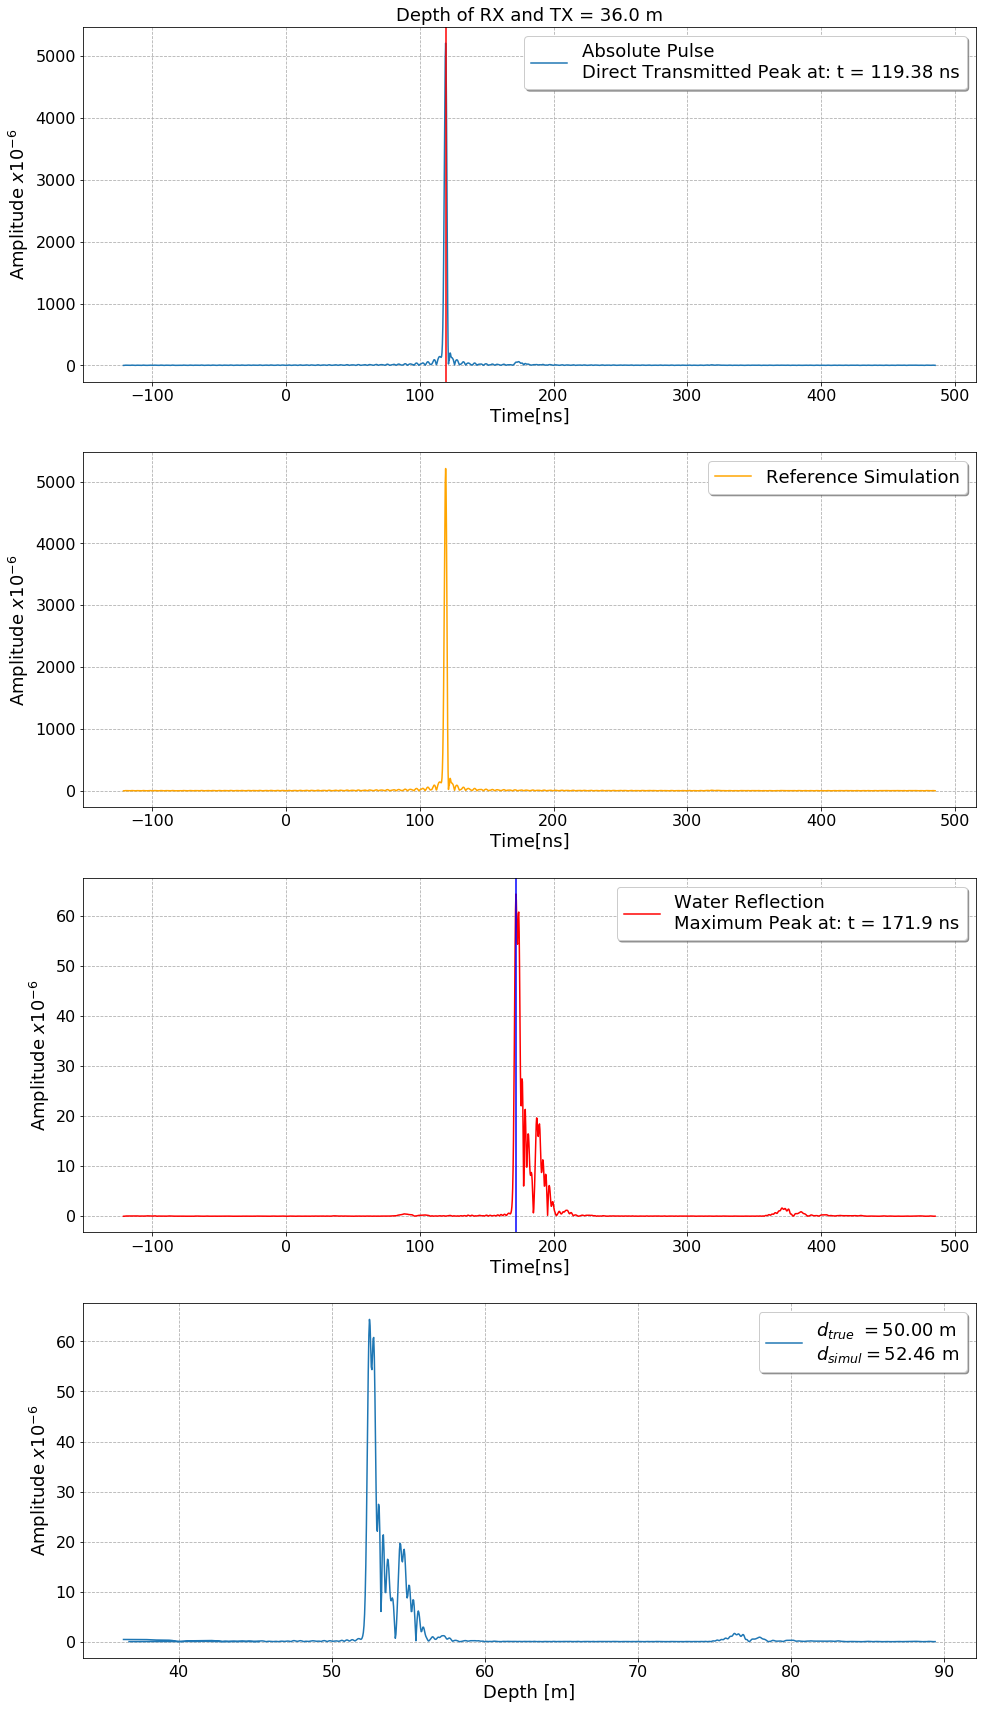

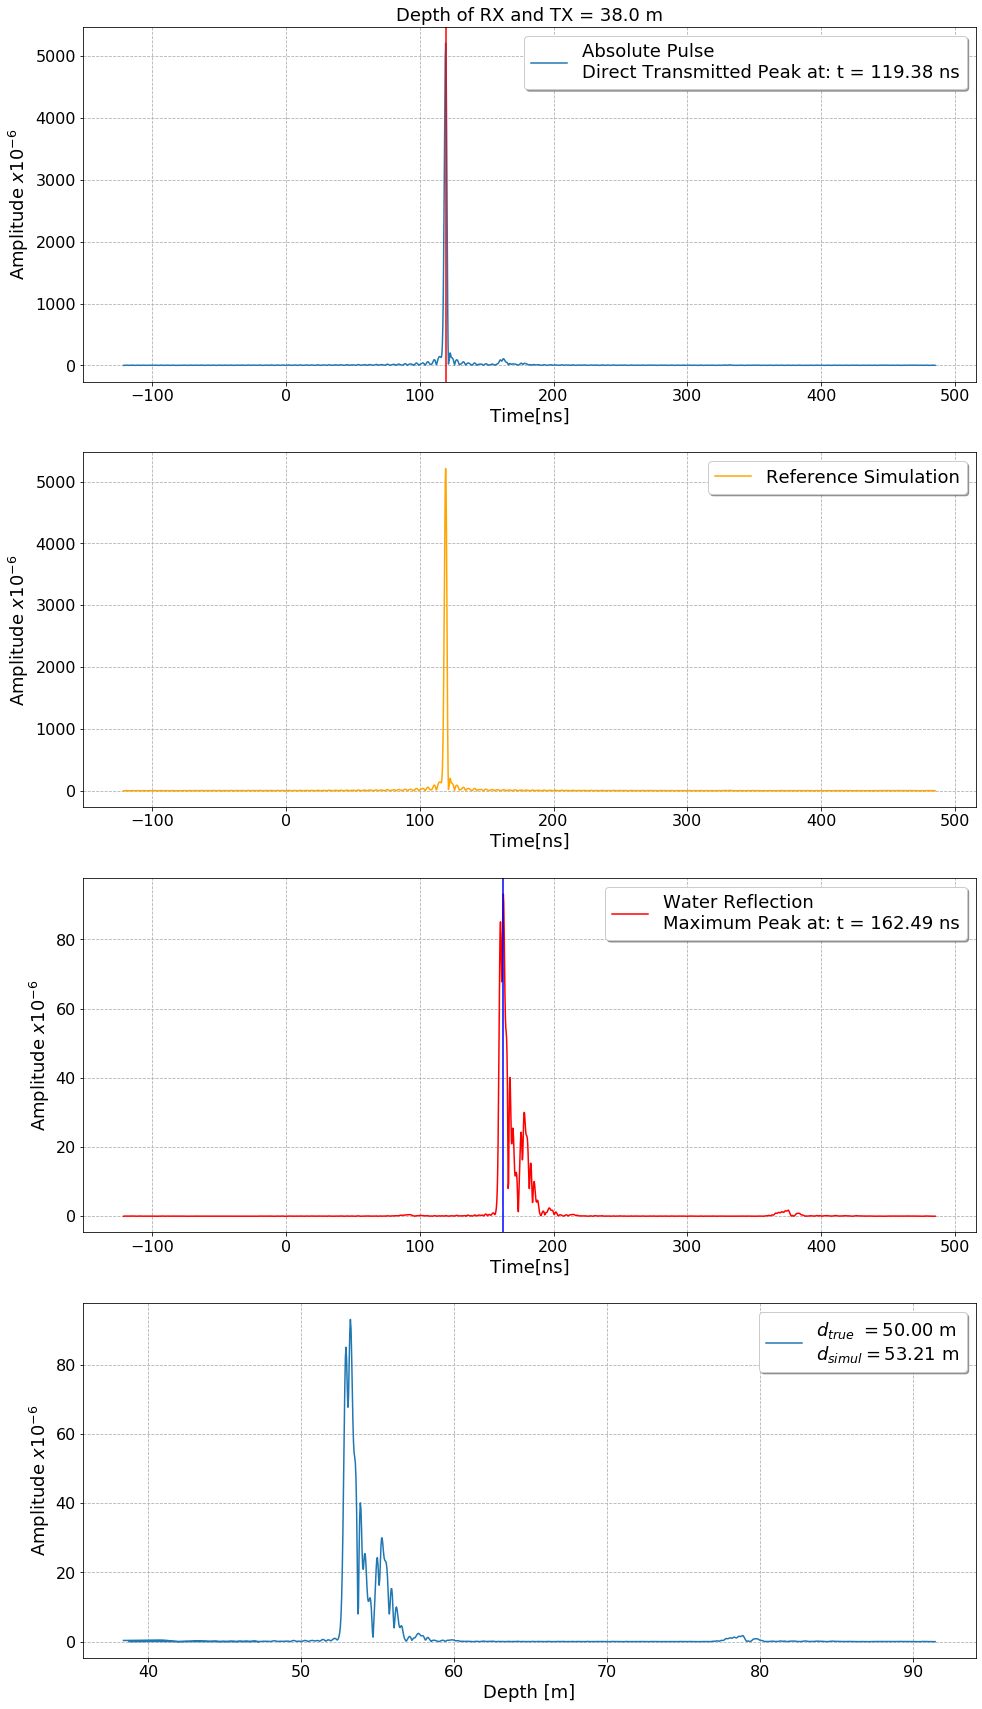

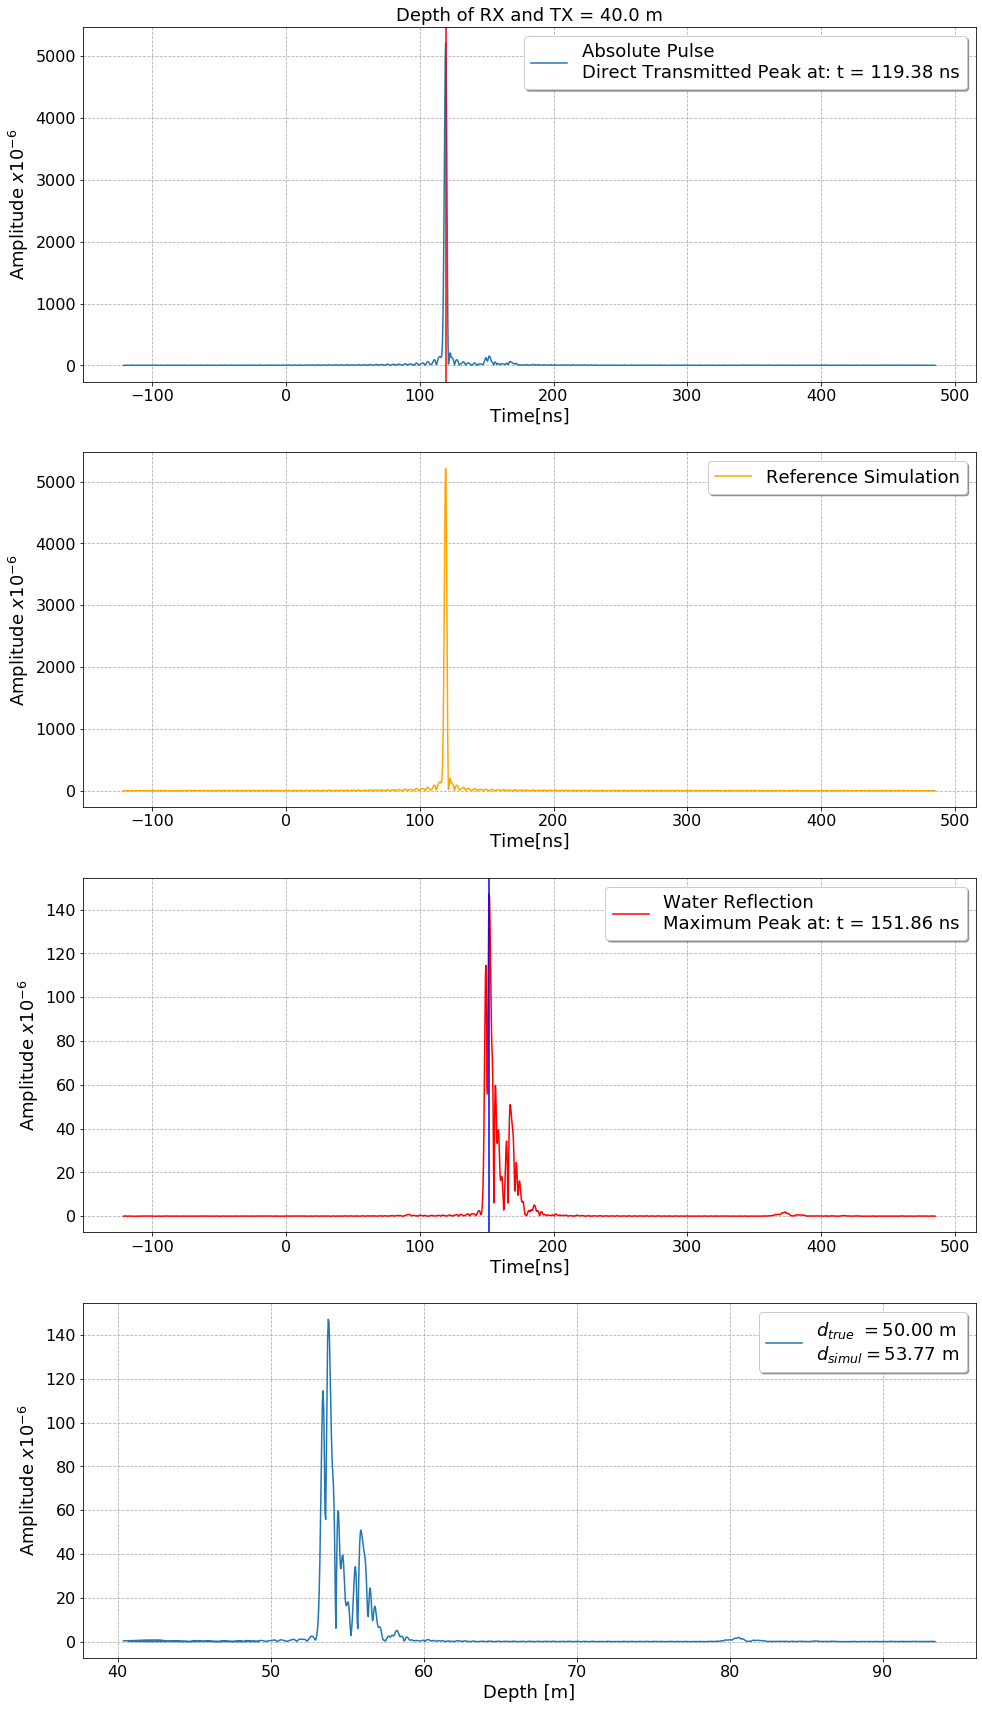

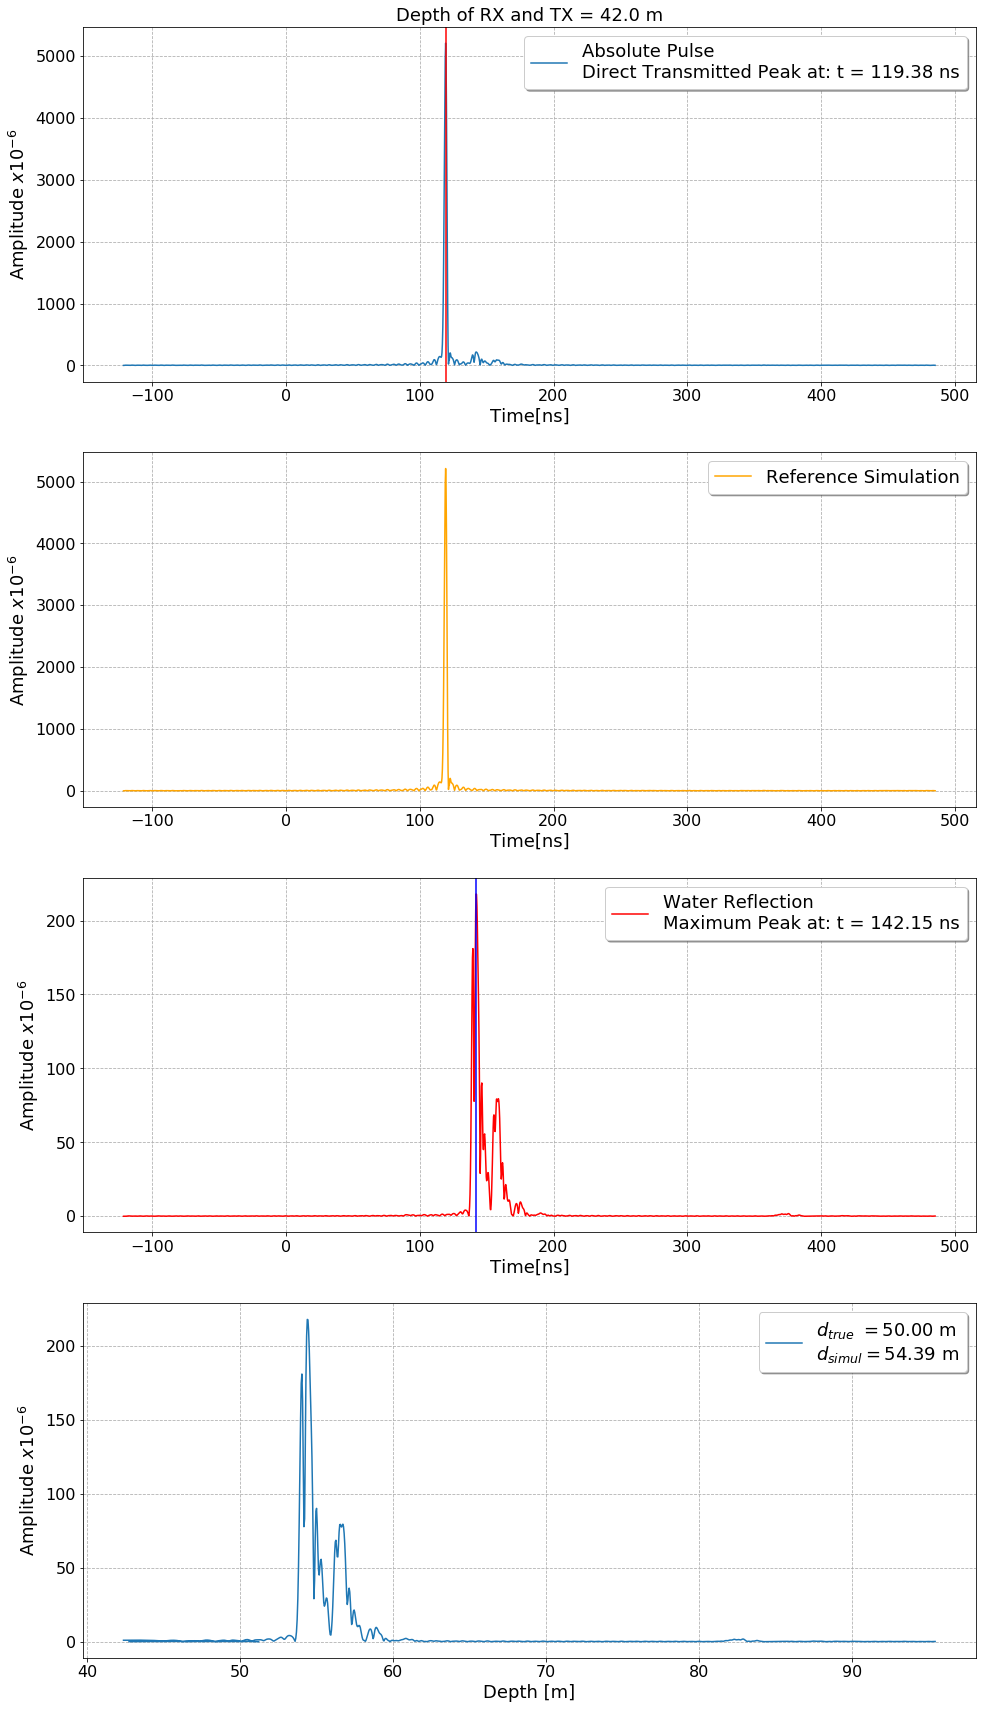

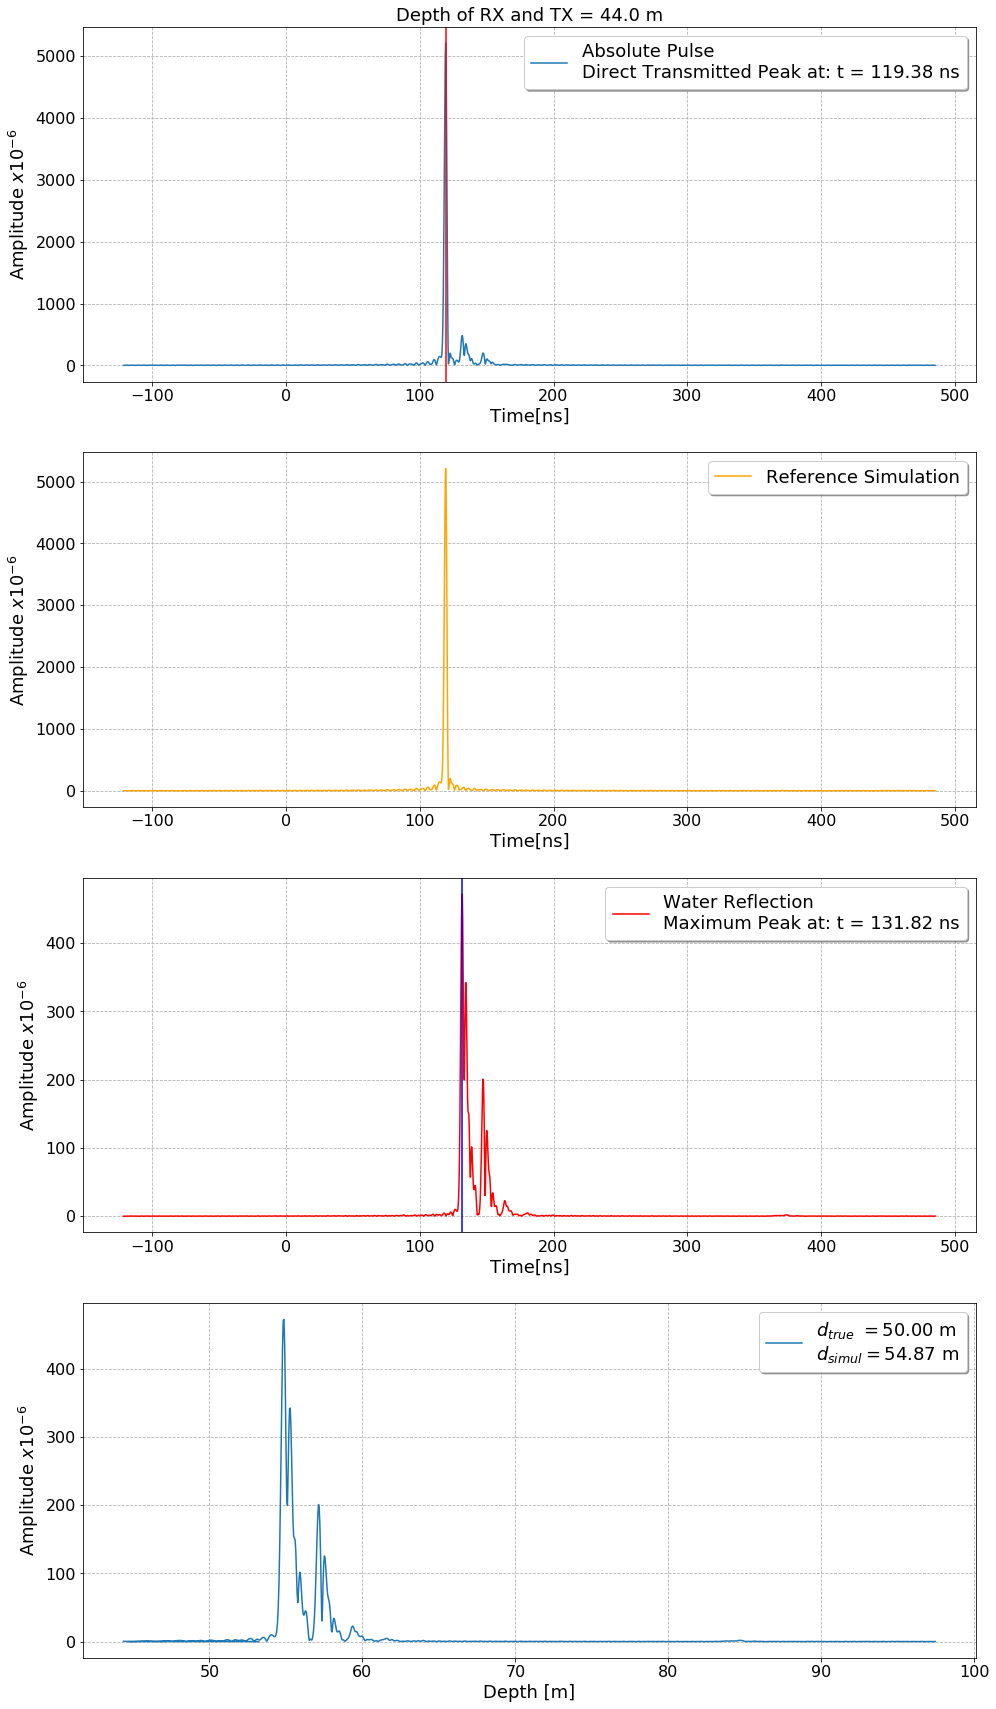

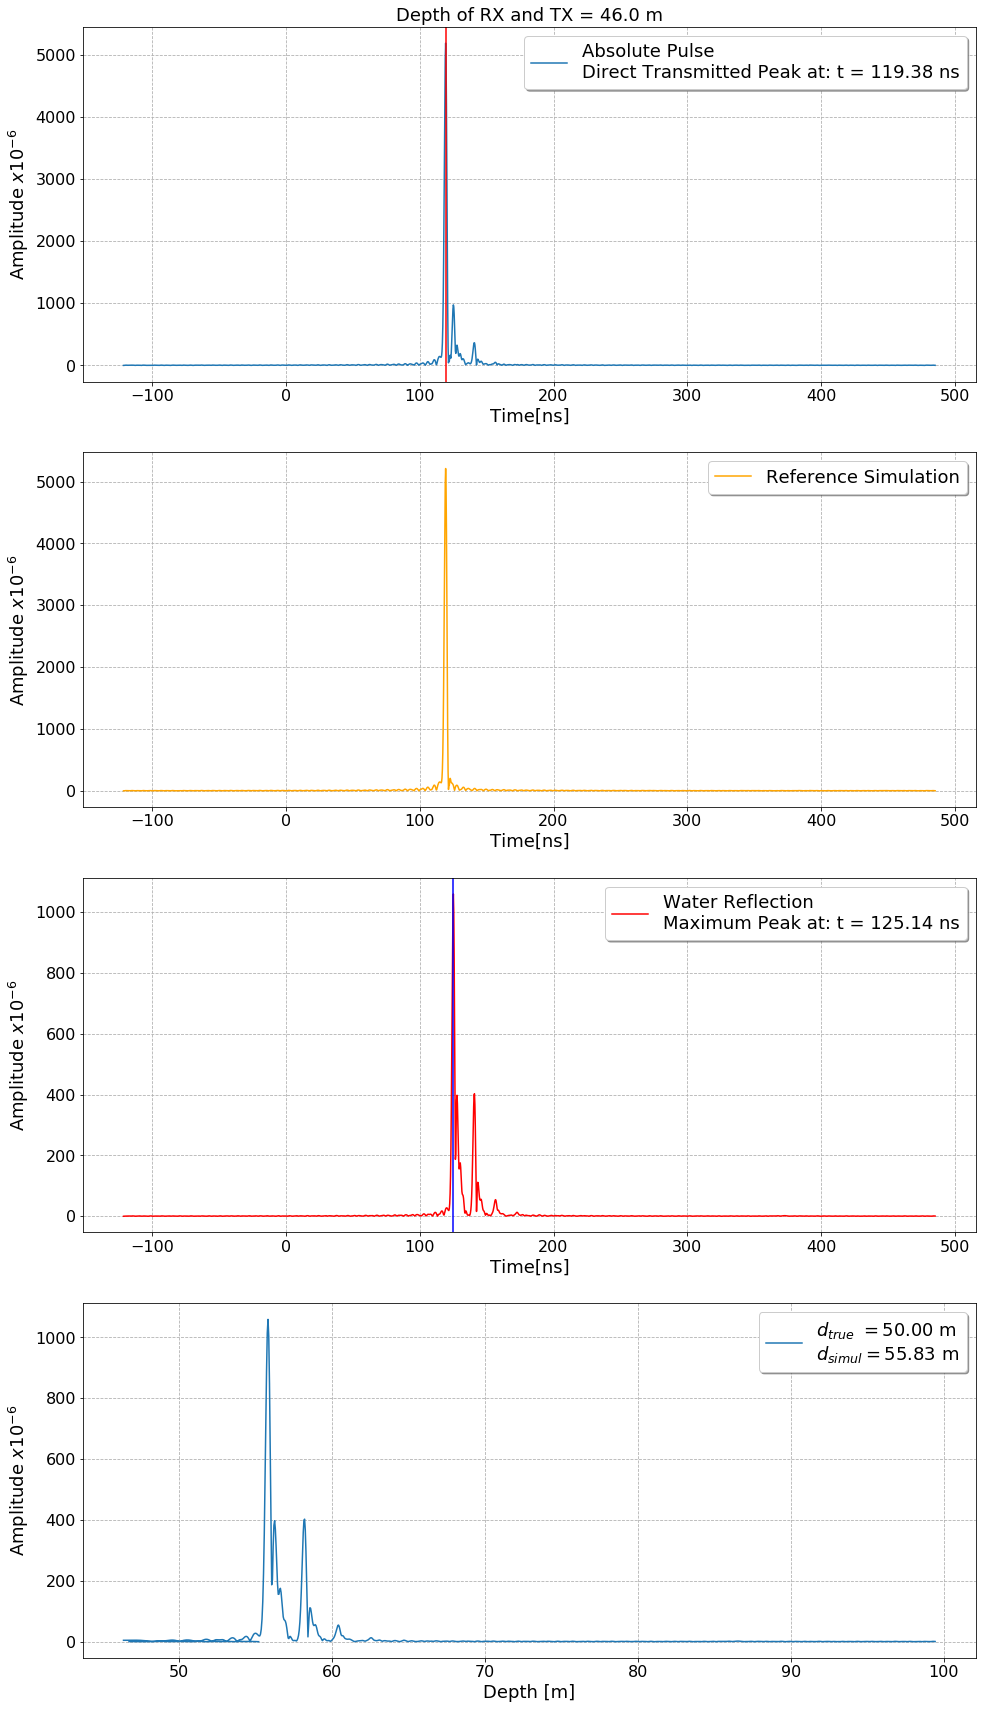

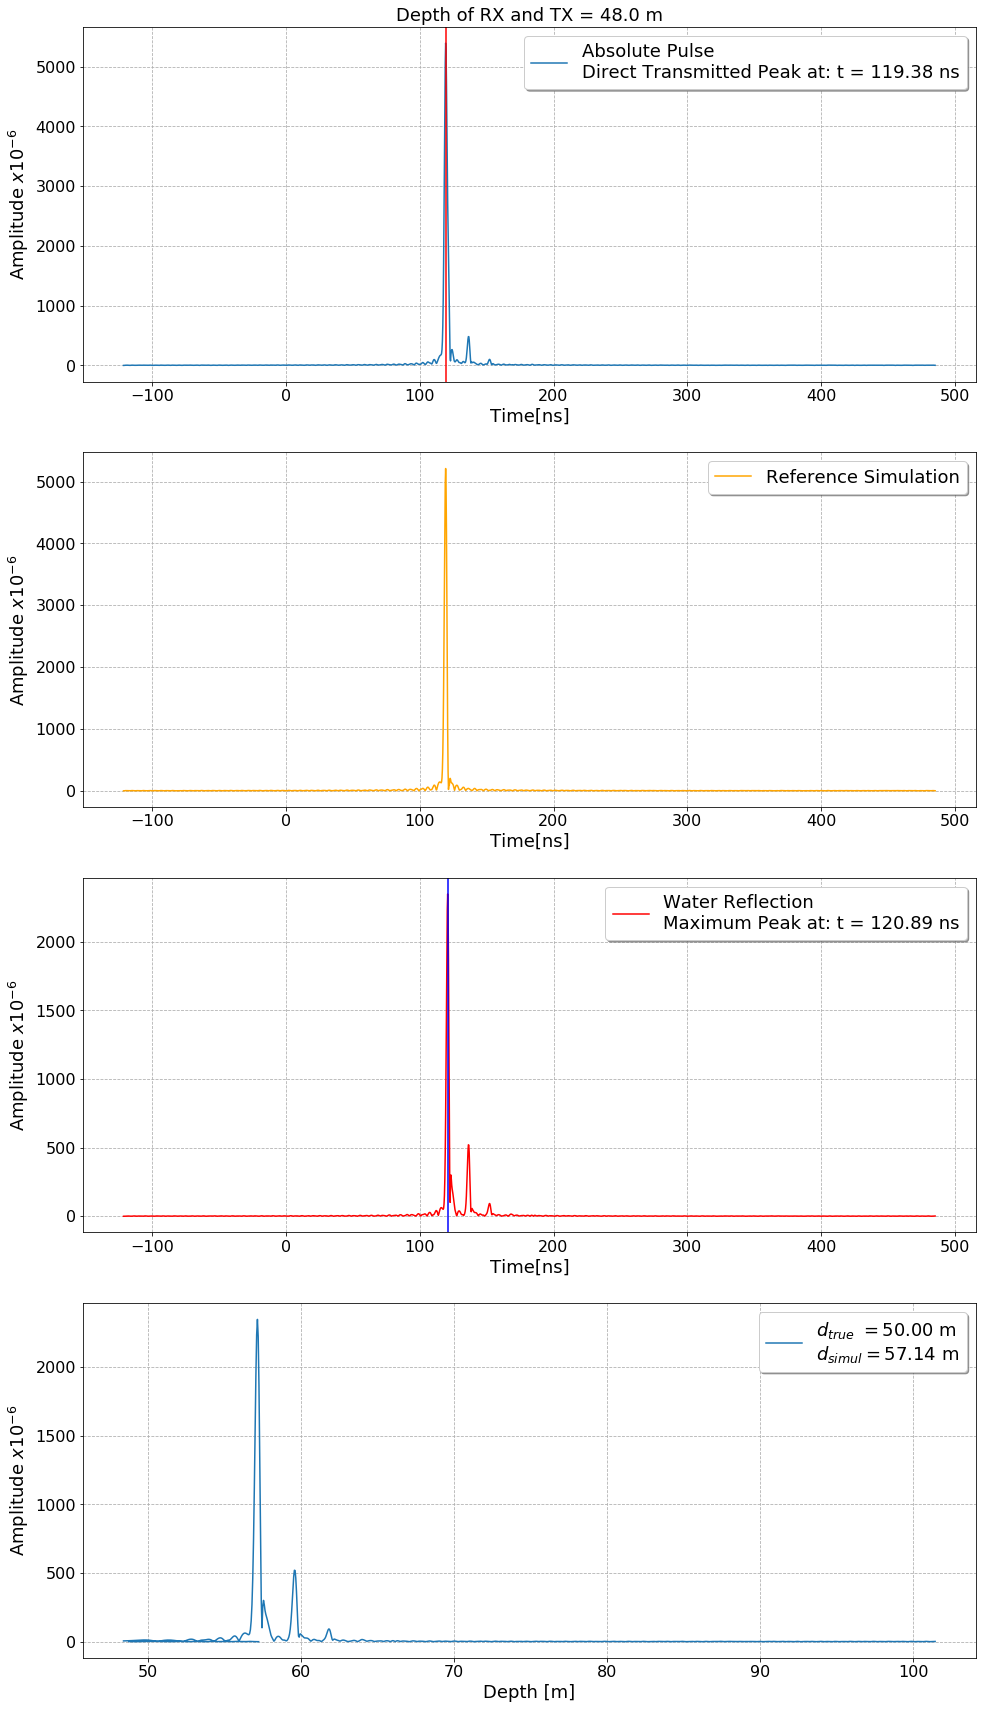

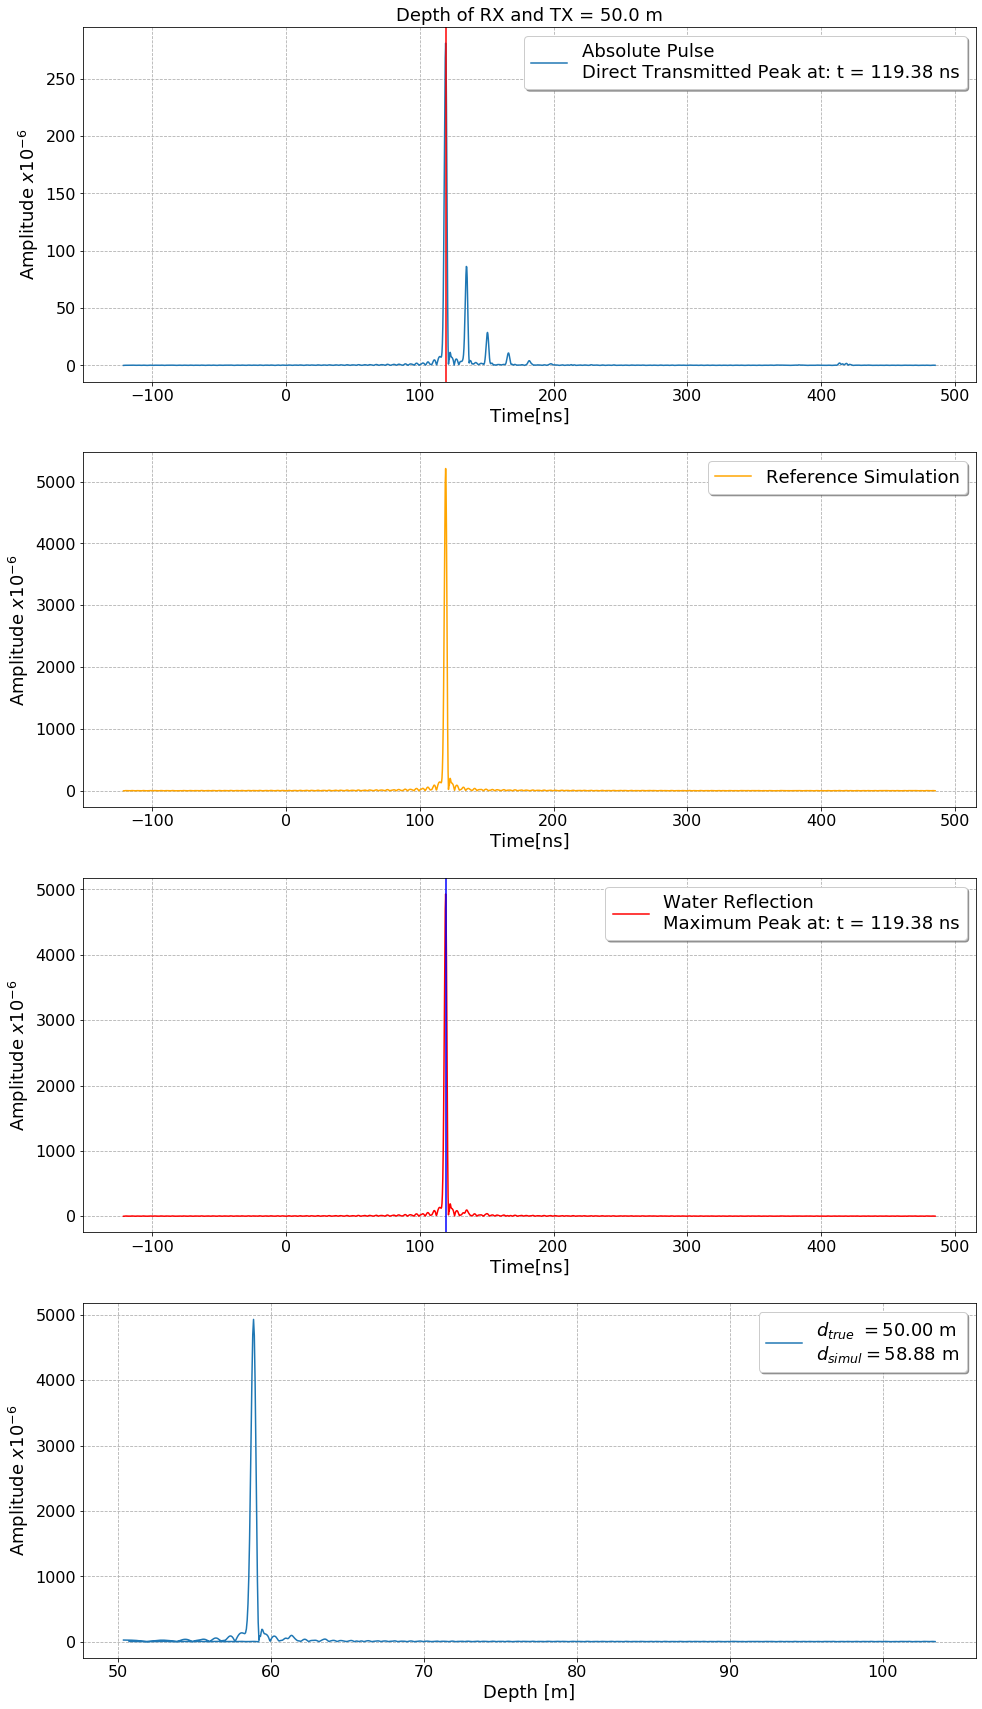

In [14]:
c = 2.997e8
for i in range(nDepths_rx):
    spectrum_rx = ascan_rx[:,i,1,i] 
    spectrum_rx_ref = ascan_rx_ref[:,i,1,i] #ranges
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    pulse_rx = np.fft.ifft(spectrum_rx)    # Fourier Transformation of the receiving Spectrum
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9, 0.75e9, 1/sampling_interval, 4) # Highpass Filter
    nHalf_ref = int(len(spectrum_rx_ref)/2)
    spectrum_rx_ref[:nHalf_ref] = np.zeros(nHalf_ref)
    pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
    pulse_rx_ref = butterBandpassFilter(pulse_rx_ref, 0.25e9, 0.75e9, 1/sampling_interval, 4)
    
    
    
    # F I L T E R I N G
    
    spectrum = spectrum_rx - spectrum_rx_ref
    spectrum[:nHalf] = np.zeros(nHalf)
    pulse = np.fft.ifft(spectrum)
    pulse = butterBandpassFilter(pulse, 0.25e9, 0.75e9, 1/sampling_interval, 4)
    #pulse = pulse_rx - pulse_rx_ref
    
      
    # P E A K  A N A L Y S I S
    
    indexes = pku.indexes(abs(pulse_rx), thres = 0.9)
    time = np.linspace(min(tx_pulse.time_space), max(tx_pulse.time_space), len(abs(pulse_rx))) 
    
    def t_true(r, epsilon_r_true):
        t = r/(c/np.sqrt(epsilon_r_true))
        return t
    
    time = time-200e-9
    time = time/(time[indexes][0]*1e9)*t_true(20,3.2)*1e9
    fpeaks = pku.interpolate(time, abs(pulse_rx), indexes) 
    fmod = 1/500e6 
    indexes_water = pku.indexes(abs(pulse), thres = 0.95)
    fpeaks_water = pku.interpolate(time, abs(pulse), indexes_water)
    
    
    
    # F I T T I N G 
        
    #p0 = [fpeaks[0], fmod, max(abs(pulse_rx)), np.median(abs(pulse_rx))]   # Fit Parameters 
    #p1 = least_squares(errfunc, p0[:], args = (time, abs(pulse_rx)))   # Fit Method
    q0 = [fpeaks_water[0], max(abs(pulse))]
    q1 = least_squares(errfunc2, q0[:], args = (time, abs(pulse)))
    
    # D E P T H
    def WaterPocketDepth(t,r):
        epsilon_r = np.sqrt(3.2)
        d = 0.5*np.sqrt((c**2/epsilon_r)*t**2-r**2) + receiverDepth_list[i]
        return d
   
    # P L O T T I N G
    
    #d_simul_list =  []
    d_simul = WaterPocketDepth(time[indexes_water][0],20)
    #d_simul_list.append(d_simul)
    plt.rcParams["figure.figsize"] = (16, 30)
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4)
    #gauss_label = 'Gaussian Fit: \n $\Delta t = ' + str(round(p1.x[0]*1e9,2)) + '\pm' + str(round(p1.x[1]*1e9,2)) +  '$ ns \n a = '+ str(round(p1.x[2],4))
    peak_label = 'Maximum Peak at: t = '+ str(round(time[indexes_water][0]*1e9,2)) + ' ns'
    peak_label2 = 'Direct Transmitted Peak at: t = '+ str(round(time[indexes][0]*1e9,2)) + ' ns'
    ax4label = '$d_{true} \,\,= 50.00$ m\n$d_{simul} = $' + str(round(d_simul,2)) + ' m'

    
    ax1.plot(time*1e9, 1e6*abs(pulse_rx), label = 'Absolute Pulse \n' + peak_label2)   # Absolute Pulse
    ax2.plot(time*1e9, 1e6*abs(pulse_rx_ref), label='Reference Simulation', c='orange') # Reference Simulation
    ax3.plot(time*1e9, 1e6*abs(pulse), label= 'Water Reflection \n' +  peak_label, c='r')  # Water reflection only 
    ax4.plot(WaterPocketDepth(time,20), 1e6*abs(pulse), label = ax4label)  # Depth Spectrum
    
    ax1.grid(linestyle='--')
    ax2.grid(linestyle='--')
    ax3.grid(linestyle='--')
    ax4.grid(linestyle='--')

    ax1.axvline(time[indexes][0]*1e9, c='r')
    ax3.axvline(time[indexes_water][0]*1e9, c='b')


    #pl.plot(time, gaussian(time, p1.x[0], p1.x[1], p1.x[2], p1.x[3]), c='y', label = gauss_label, alpha=0.6) # Gaussian Fit
    #ax2.plot(time, pulse_filtered, label = 'Pulse Filtered', c = 'b')
    #ax3.plot(time, np.array(gauss_pulse(time, q1.x[0], 500e6, q1.x[1])), label = 'Gaussian Pulse', c = 'y')
    #ax4.plot(time, np.array(gauss_pulse(time, q1.x[0], 500e6, q1.x[1])), label = 'Gaussian Pulse')
    #ax4.plot(time, pulse_filtered, label='Pulse Filtered')
    #ax4.plot(time, pulse_rx.real, label='Pulse (real part)')
    #pl.plot(t_cut*1e9, pulse_filtered_cut)
    #print(len(indexes))    
    
    
    
    #print('central time = ' + str(q1.x[0]))
    #print('Gaussian Amplitude = ' + str(q1.x[1]))
    #print(fpeaks[0])
    #print('Gaussian Maximum = ', str(round(p1.x[2],6)))
    #print('Pulse Maximum =', round(max(abs(pulse_rx)),6))
    #print(p1.x[2])
    #print('dt_mean = ', p1.x[0], '+/- = ', p1.x[1], 's')
    #print(str(sourceDepth_list[i]), p1.x[0]*1e-9)
    #print(q1.x[0])
    
    
    
    ax1.legend(loc='best', shadow = True, fontsize=18)
    ax2.legend(loc='best', shadow = True, fontsize=18)
    ax3.legend(loc='best', shadow=  True, fontsize=18)
    ax4.legend(loc='best', shadow = True, fontsize=18)

    

    ax1.set_xlabel('Time[ns]', fontsize=18)
    ax1.set_ylabel('Amplitude $x 10^{-6}$', fontsize=18)
    ax2.set_xlabel('Time[ns]', fontsize=18)
    ax2.set_ylabel('Amplitude $x 10^{-6}$', fontsize=18)
    ax3.set_xlabel('Time[ns]', fontsize=18)
    ax3.set_ylabel('Amplitude $x 10^{-6}$', fontsize=18)
    ax4.set_xlabel('Depth [m]', fontsize=18)
    ax4.set_ylabel('Amplitude $x 10^{-6}$', fontsize=18)
    
    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    ax3.tick_params(labelsize=16)
    ax4.tick_params(labelsize=16)
    


    ax1.set_title('Depth of RX and TX = '+ str(receiverDepth_list[i])+ ' m', fontsize=18)  
    pl.show()  

[49.72 49.85 49.93 50.05 50.13 50.24 50.34 50.44 50.57 50.64 50.75 50.85
 51.36 51.46 51.59 51.33 51.52 51.66 52.17 52.42 52.74 52.8  53.41 54.43
 56.05]
51.458


Text(30.5, 50.5, 'deviation: 2.84 %')

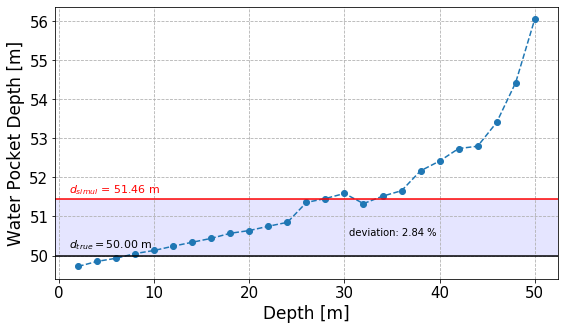

In [205]:
depths = np.genfromtxt('Water_Pocket_Depths.txt').T
print(depths[0])
print(np.mean(depths[0]))
depth_mean = np.mean(depths[0])
pl.figure(figsize=(9,5))
pl.plot(depths[1], depths[0], marker='o', linestyle='--')
pl.xticks(fontsize=15)
pl.yticks(fontsize=15)
pl.xlabel('Depth [m]', fontsize=17)
pl.ylabel('Water Pocket Depth [m]', fontsize=17)
pl.axhline(depth_mean, c='r')
pl.axhline(50, c='black')
pl.grid(linestyle='--')
pl.text(1, 51.6, '$d_{simul}$ = '+ str(round(depth_mean,2))+ ' m', c='r', fontsize=11)
pl.text(1, 50.2, '$d_{true} = 50.00$ m', fontsize=11)
pl.axhspan(50, 51.46, alpha=0.1, color='b')
pl.text(30.5, 50.5, 'deviation: 2.84 %')

2.9864939939939947e-07
3.966984484484485e-07
4.937469969969971e-07
6.898450950950953e-07
9.824914914914916e-07
1.7808908908908913e-07
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 2
    chi-square         = 2.6030e-19
    reduced chi-square = 6.5075e-20
    Akaike info crit   = -263.505239
    Bayesian info crit = -263.921720
[[Variables]]
    slope:      7.8168e-09 +/- 3.2182e-12 (0.04%) (init = 1)
    intercept:  1.6099e-07 +/- 1.8719e-10 (0.12%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.831


<Figure size 504x216 with 0 Axes>

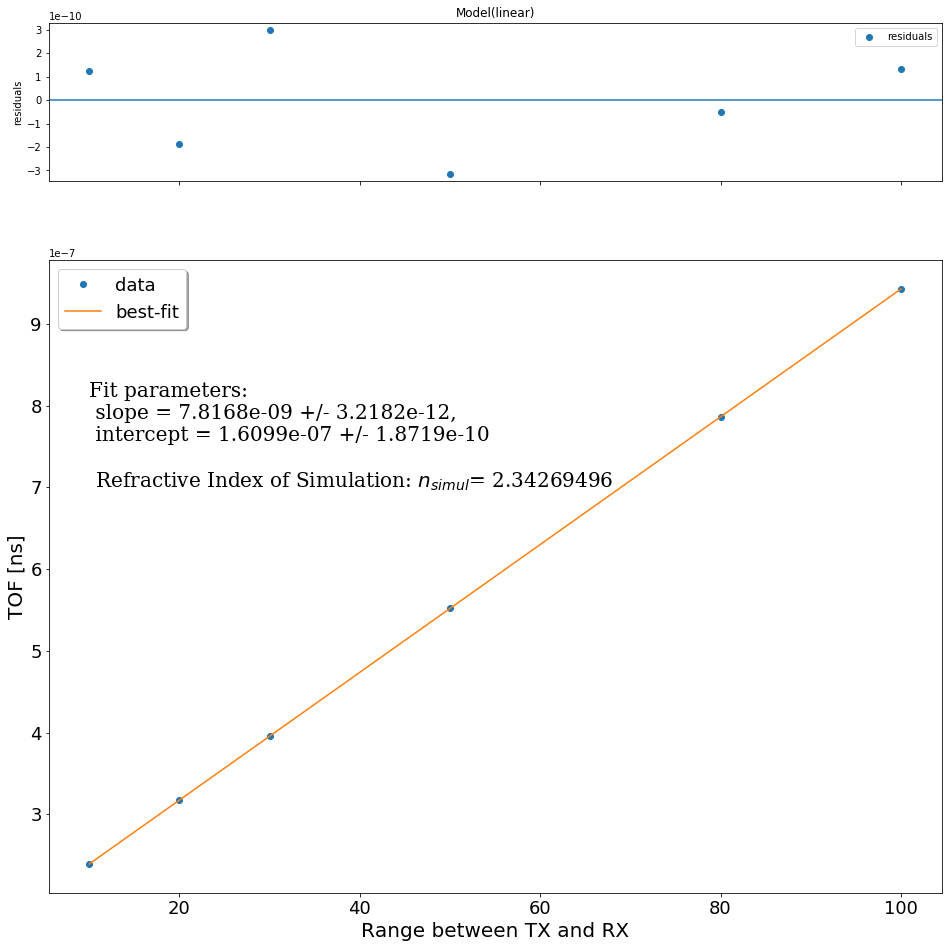

The refractive index of the simulation is n =  2.34269496


In [15]:
for j in range(nRanges):
    spectrum_rx = ascan_rx[:,1,j,1] 
    spectrum_rx_ref = ascan_rx_ref[:,1,j,1] #ranges
    nHalf = int(len(spectrum_rx)/2)
    spectrum_rx[:nHalf] = np.zeros(nHalf)
    pulse_rx = np.fft.ifft(spectrum_rx)    # Fourier Transformation of the receiving Spectrum
    pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9, 0.75e9, 1/sampling_interval, 4) # Highpass Filter
    indexes = pku.indexes(abs(pulse_rx), thres = 0.9)
    time = np.linspace(min(tx_pulse.time_space), max(tx_pulse.time_space), len(abs(pulse_rx))) 
    tof = time[indexes][0]
    if tof > 150e-09:
        print(tof)
    elif tof < 150e-09:
        print(tof+800e-9)

from lmfit import models, Model
pl.figure(figsize=(7,3))
ranges = [10, 20, 30, 50, 80, 100]
tof = [239.04e-9, 317.52e-9, 395.2e-9, 552.15e-9, 786.39e-9, 942.54e-9]
#pl.plot(ranges, tof, linestyle='--', marker='o')

lin_model = models.LinearModel()
lin_prams = lin_model.make_params()
lin_fit = lin_model.fit(tof, params=lin_prams, x=ranges)
print(lin_fit.fit_report())
# Den Fit optisch bewerten
lin_fit.plot()
plt.xlabel('Range between TX and RX', fontsize=20)
plt.ylabel('TOF [ns]', fontsize=20)
plt.legend(fontsize=18, shadow=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(10,7e-7,'Fit parameters:\n slope = 7.8168e-09 +/- 3.2182e-12, \n intercept = 1.6099e-07 +/- 1.8719e-10 \n \n Refractive Index of Simulation: $n_{simul}$= 2.34269496', fontsize=20, family='serif')


plt.show()

slope = 7.8168e-09
n_simul = 2.997e8 * slope
print('The refractive index of the simulation is n = ', n_simul)
    
    
    
    

Text(85, 50.5, 'Water Pocket Depth')

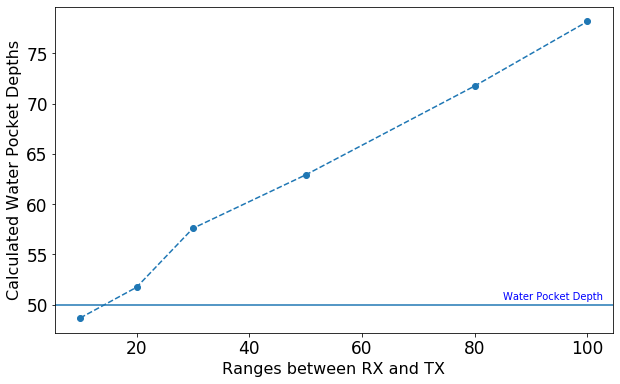

In [188]:
pl.figure(figsize=(10, 6))
depths = [48.69, 51.74, 57.6, 62.91, 71.75, 78.16]
ranges = [10, 20, 30, 50, 80, 100]
pl.plot(ranges, depths, linestyle='--', marker='o')
pl.ylabel('Calculated Water Pocket Depths', fontsize=16)
pl.xlabel('Ranges between RX and TX', fontsize=16)
pl.xticks(fontsize=17)
pl.yticks(fontsize=17)
pl.axhline(50)
pl.text(85, 50.5, 'Water Pocket Depth', c='b')


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 6
    # variables        = 2
    chi-square         = 2.6030e-19
    reduced chi-square = 6.5075e-20
    Akaike info crit   = -263.505239
    Bayesian info crit = -263.921720
[[Variables]]
    slope:      7.8168e-09 +/- 3.2182e-12 (0.04%) (init = 1)
    intercept:  1.6099e-07 +/- 1.8719e-10 (0.12%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.831


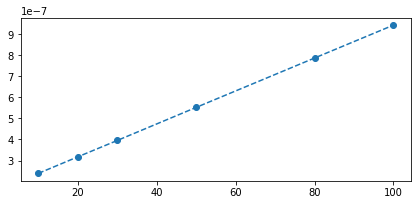

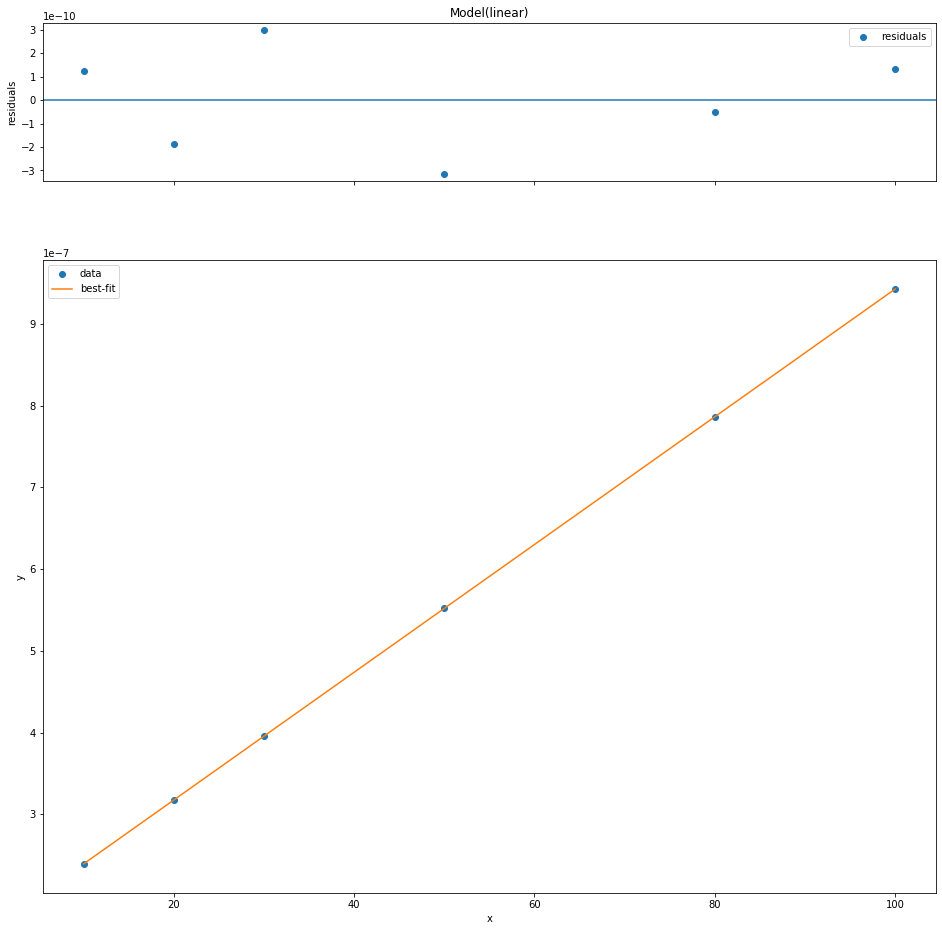

[58.12193081 58.50137304 58.91395089 59.32584078 59.70314936 60.11339595
 60.55653256 60.96474698 61.37172659 61.81123679 62.24920086 62.61734609
 63.28981097 63.75589997 64.21931189 64.57676811 65.17031866 65.82894016
 66.82886754 67.79153839 69.44505891]


<Figure size 216x72 with 0 Axes>

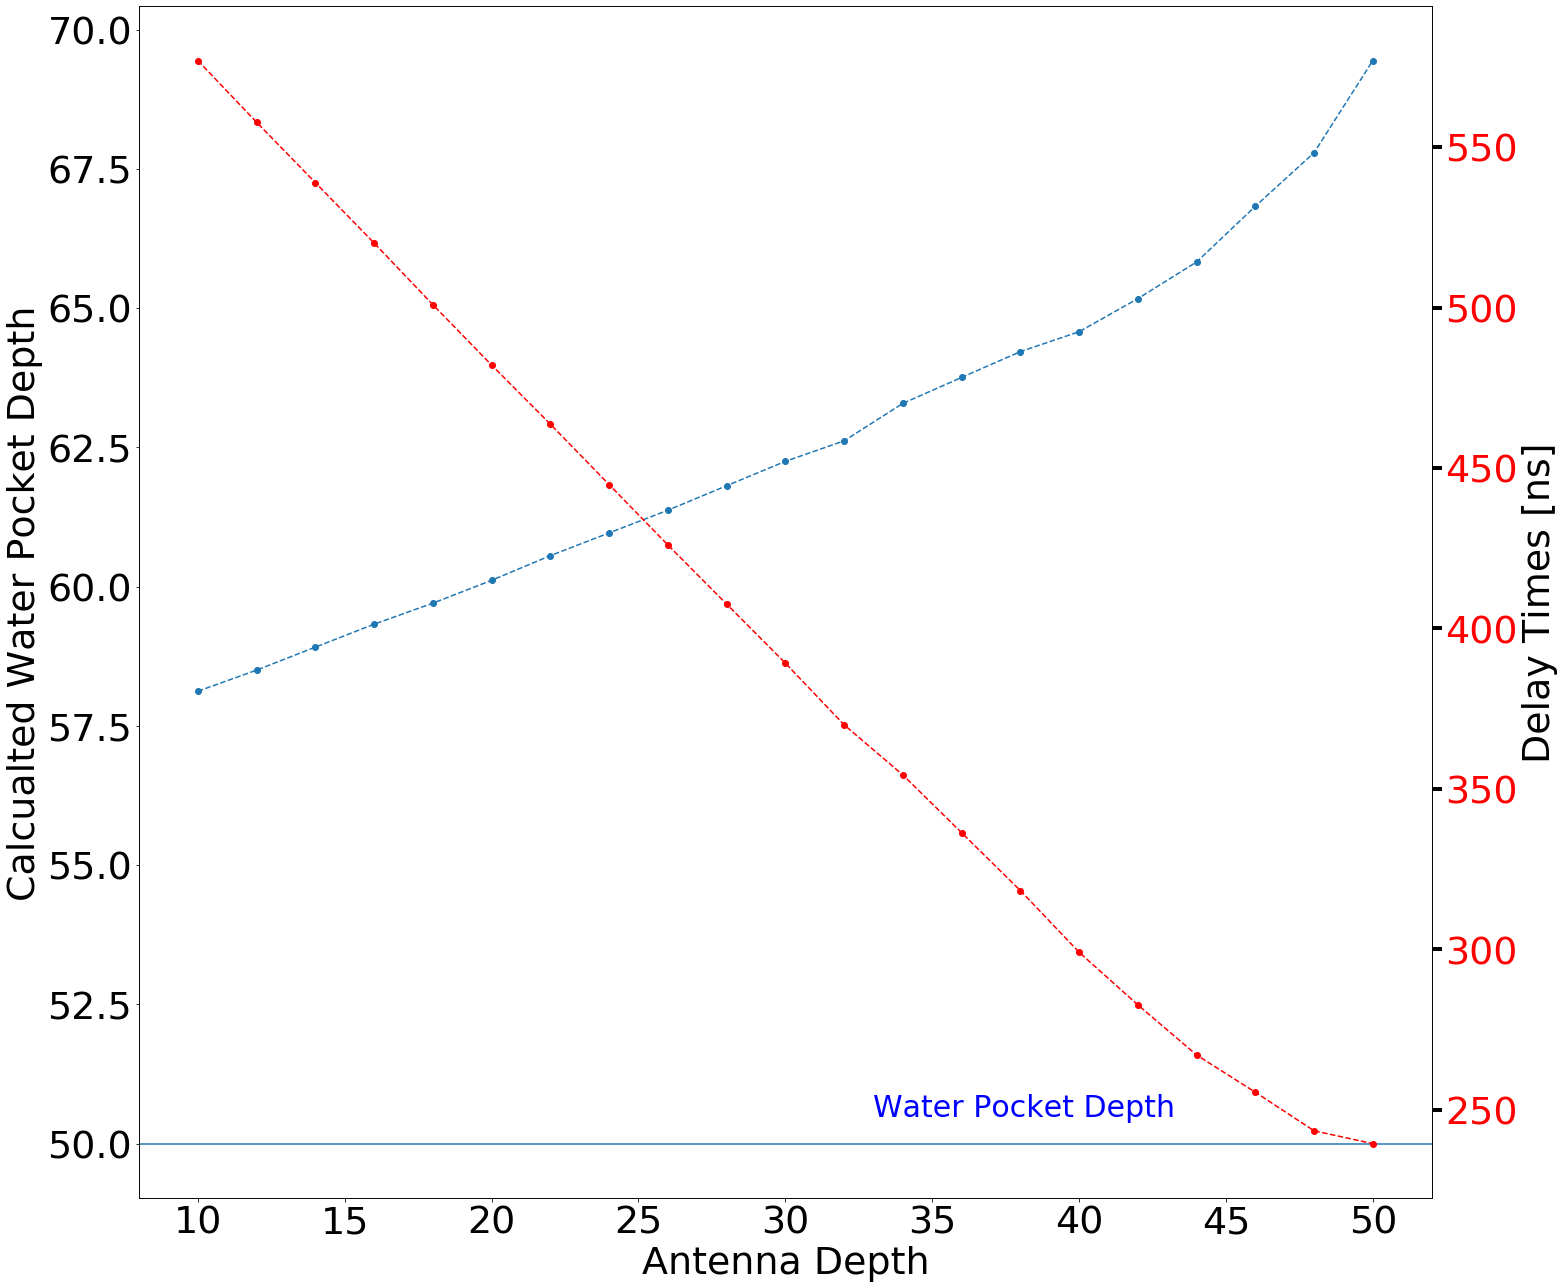

In [190]:
pl.figure(figsize=(3,1))
delay_times = np.genfromtxt('delay_times_depths.txt')
depths_depth = np.arange(10,52, 2)
print(d)
d = 1/2 * np.sqrt((3e8)**2/3.2*delay_times**2-10**2)+depths_depth

fig, ax1 = plt.subplots()
ax1.plot(depths_depth, d, linestyle='--', marker='o')
ax1.set_xlabel('Antenna Depth', fontsize=38)
ax1.set_ylabel('Calcualted Water Pocket Depth', fontsize=38)
ax1.tick_params(labelsize=38)
ax1.axhline(50)
ax1.text(33, 50.5, 'Water Pocket Depth', c='b', fontsize=30)
ax2 = ax1.twinx()
ax2.set_ylabel('Delay Times [ns]', fontsize=38)
ax2.plot(depths_depth, delay_times*1e9, c='r', linestyle='--', marker= 'o')
fig.tight_layout()
ax2.tick_params(labelcolor='r', labelsize=38, width=4, length=10)
pl.show()


In [242]:
#for i in range(nDepths_rx):
 #   pplot(1e9*time, 1e6*abs(pulse), indexes_water)   # Peak Detection with peakutils.index
  #  pl.show()

In [22]:
#for i in range(nRanges):
 #   pplot(time, abs(pulse), indexes_water)
  #  pl.show()
d = np.sqrt(3.2) 
print(d)
print(Range_list)

1.7888543819998317
[ 10.  20.  30.  50.  80. 100.]


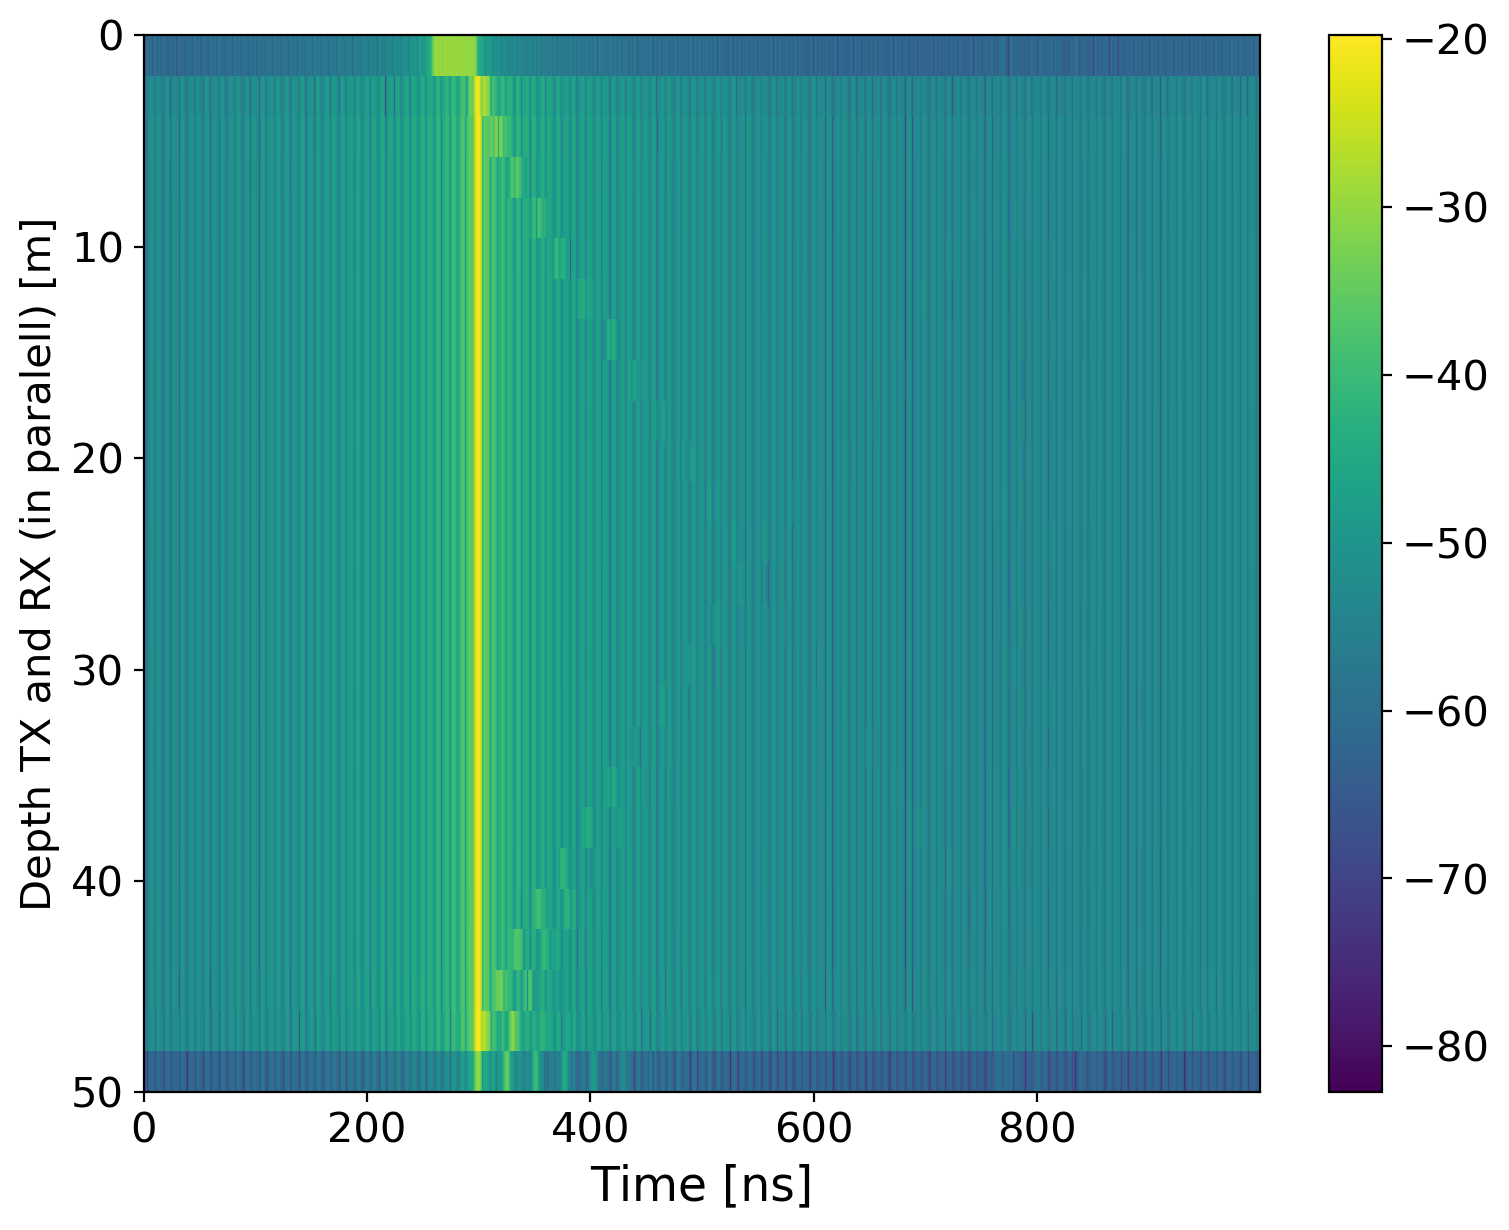

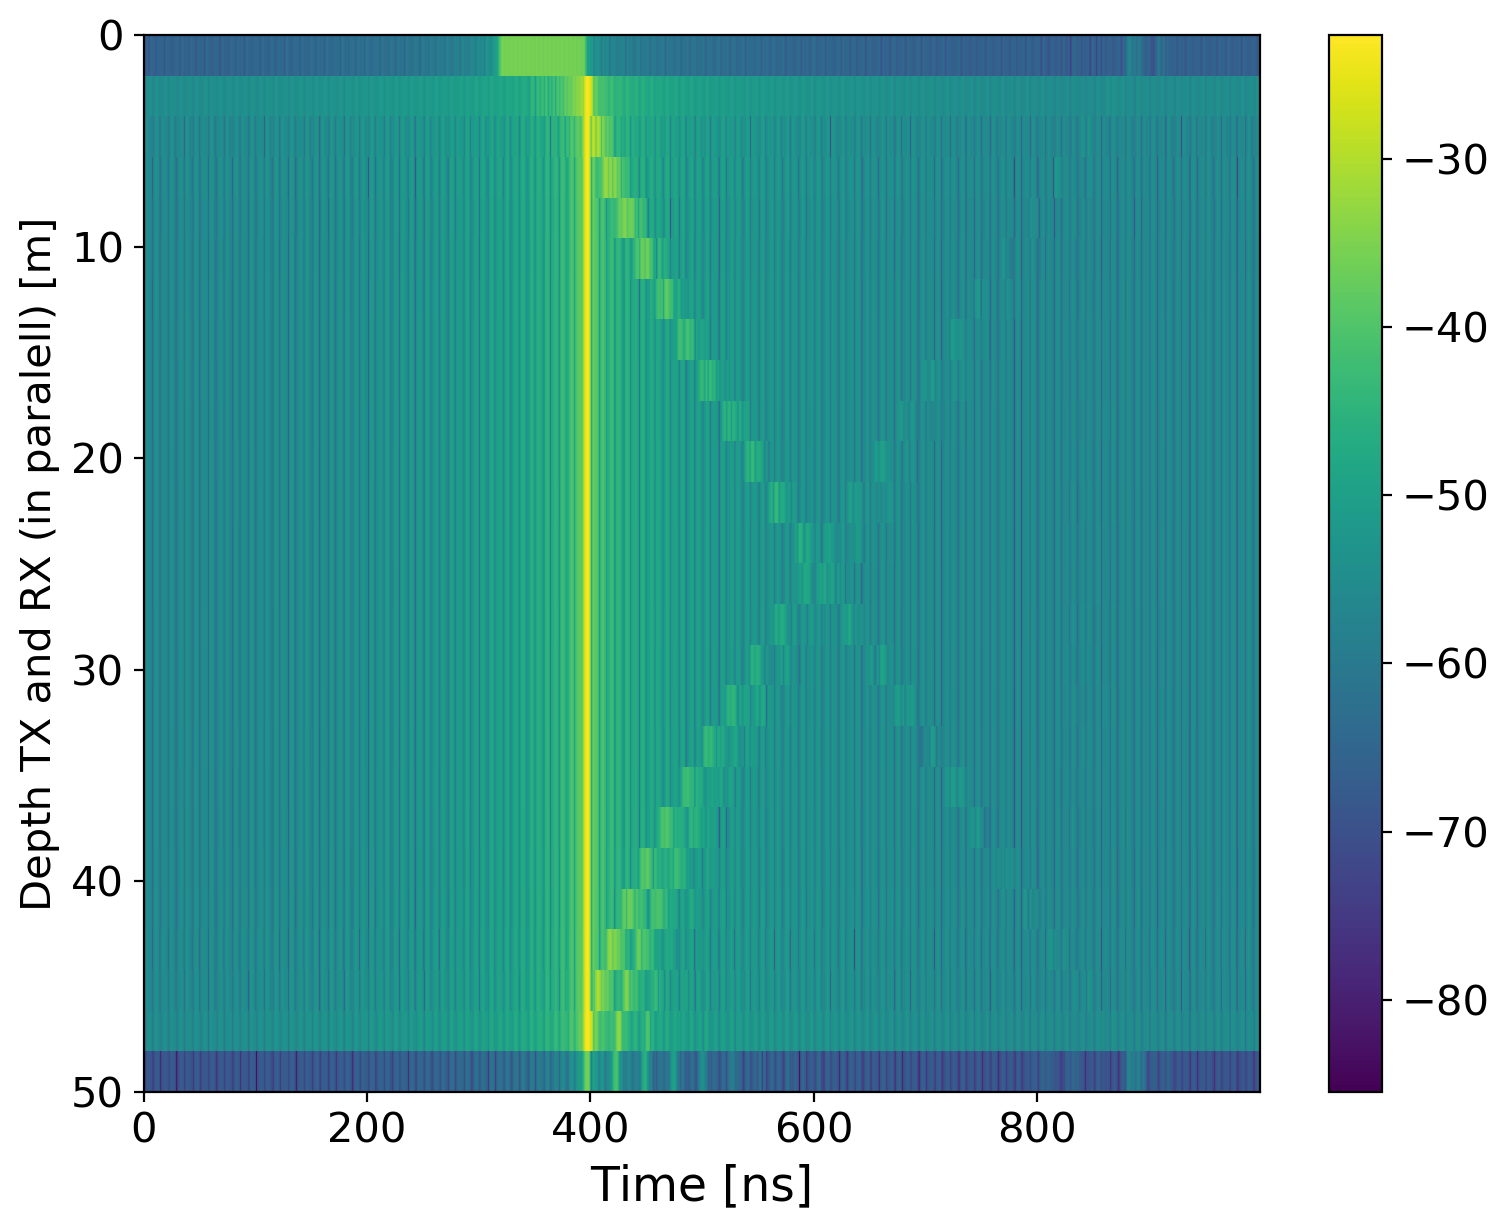

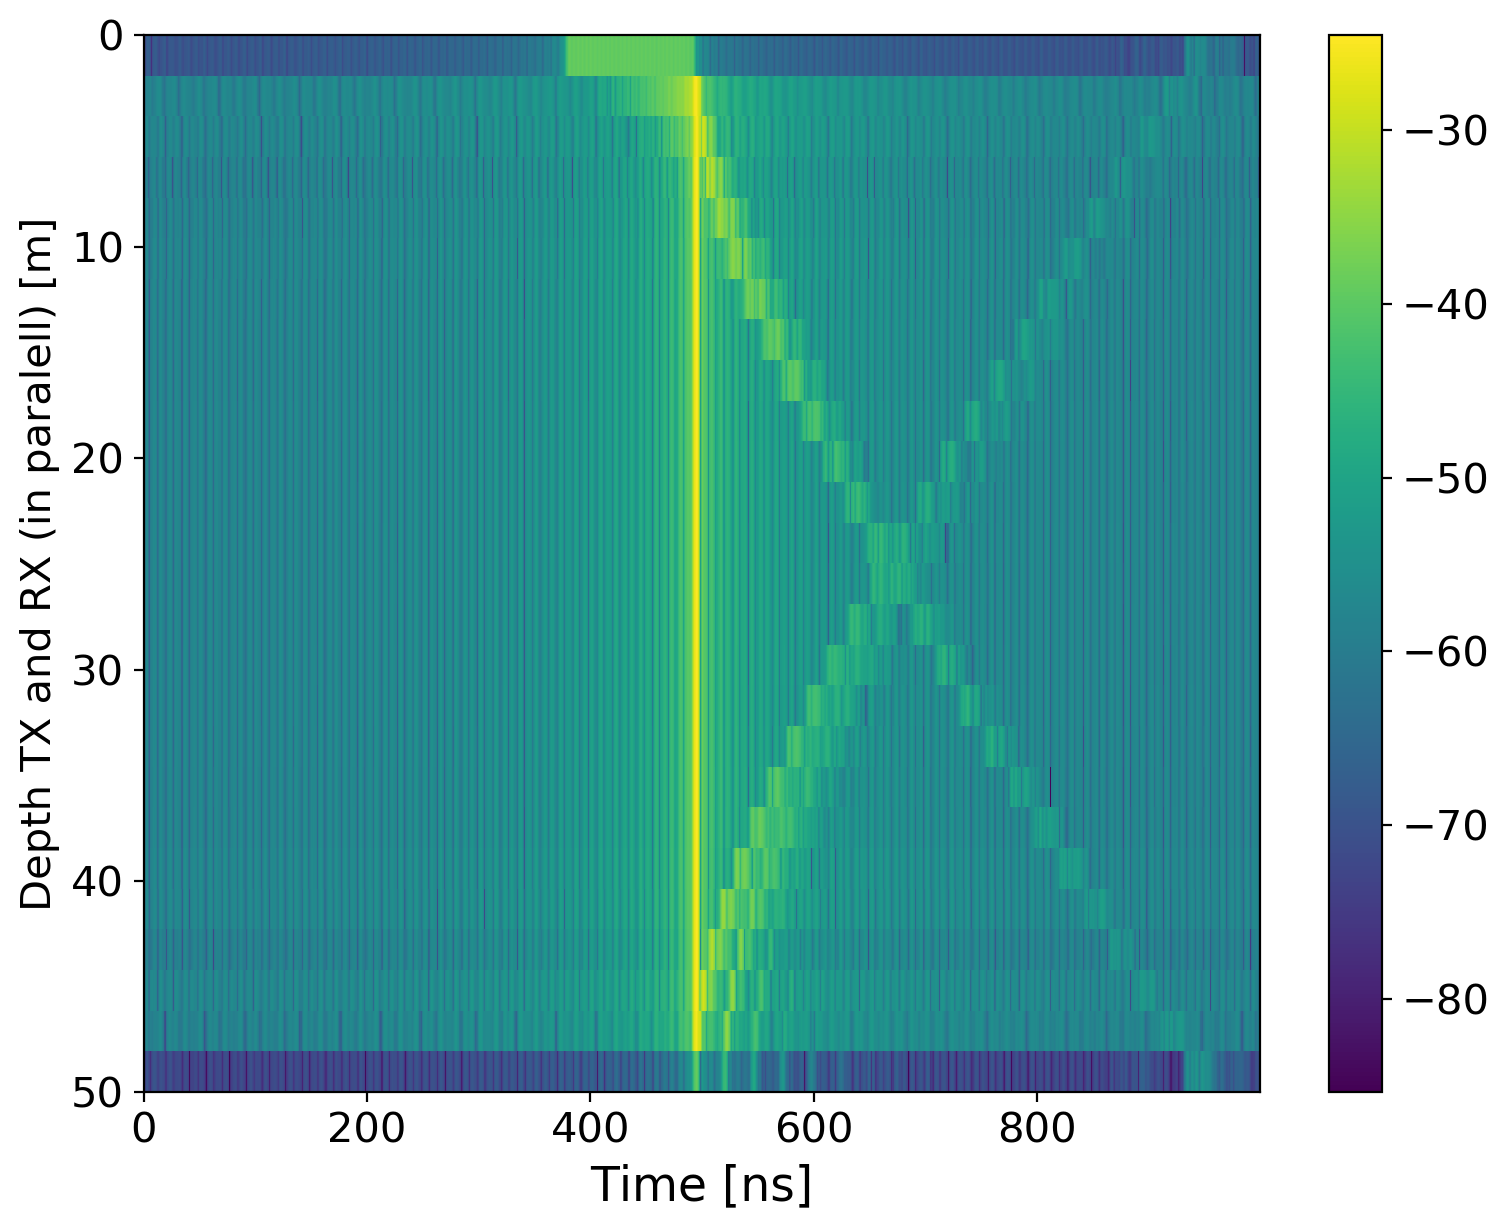

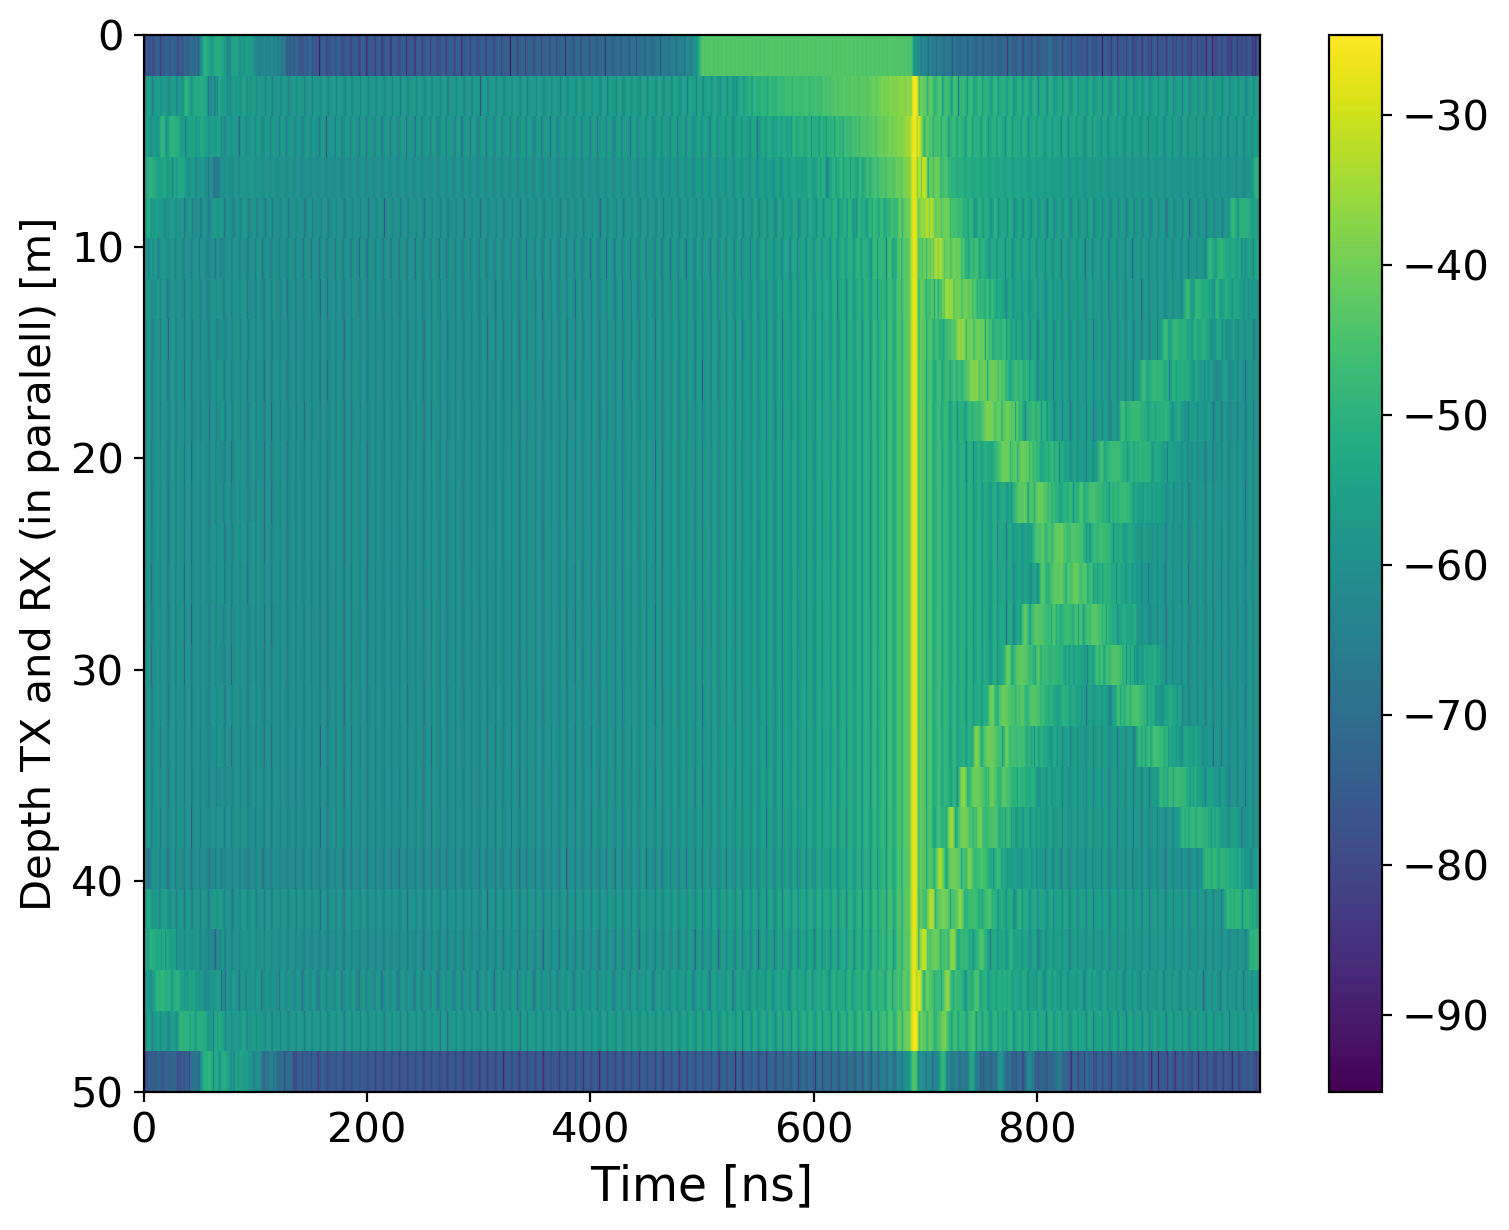

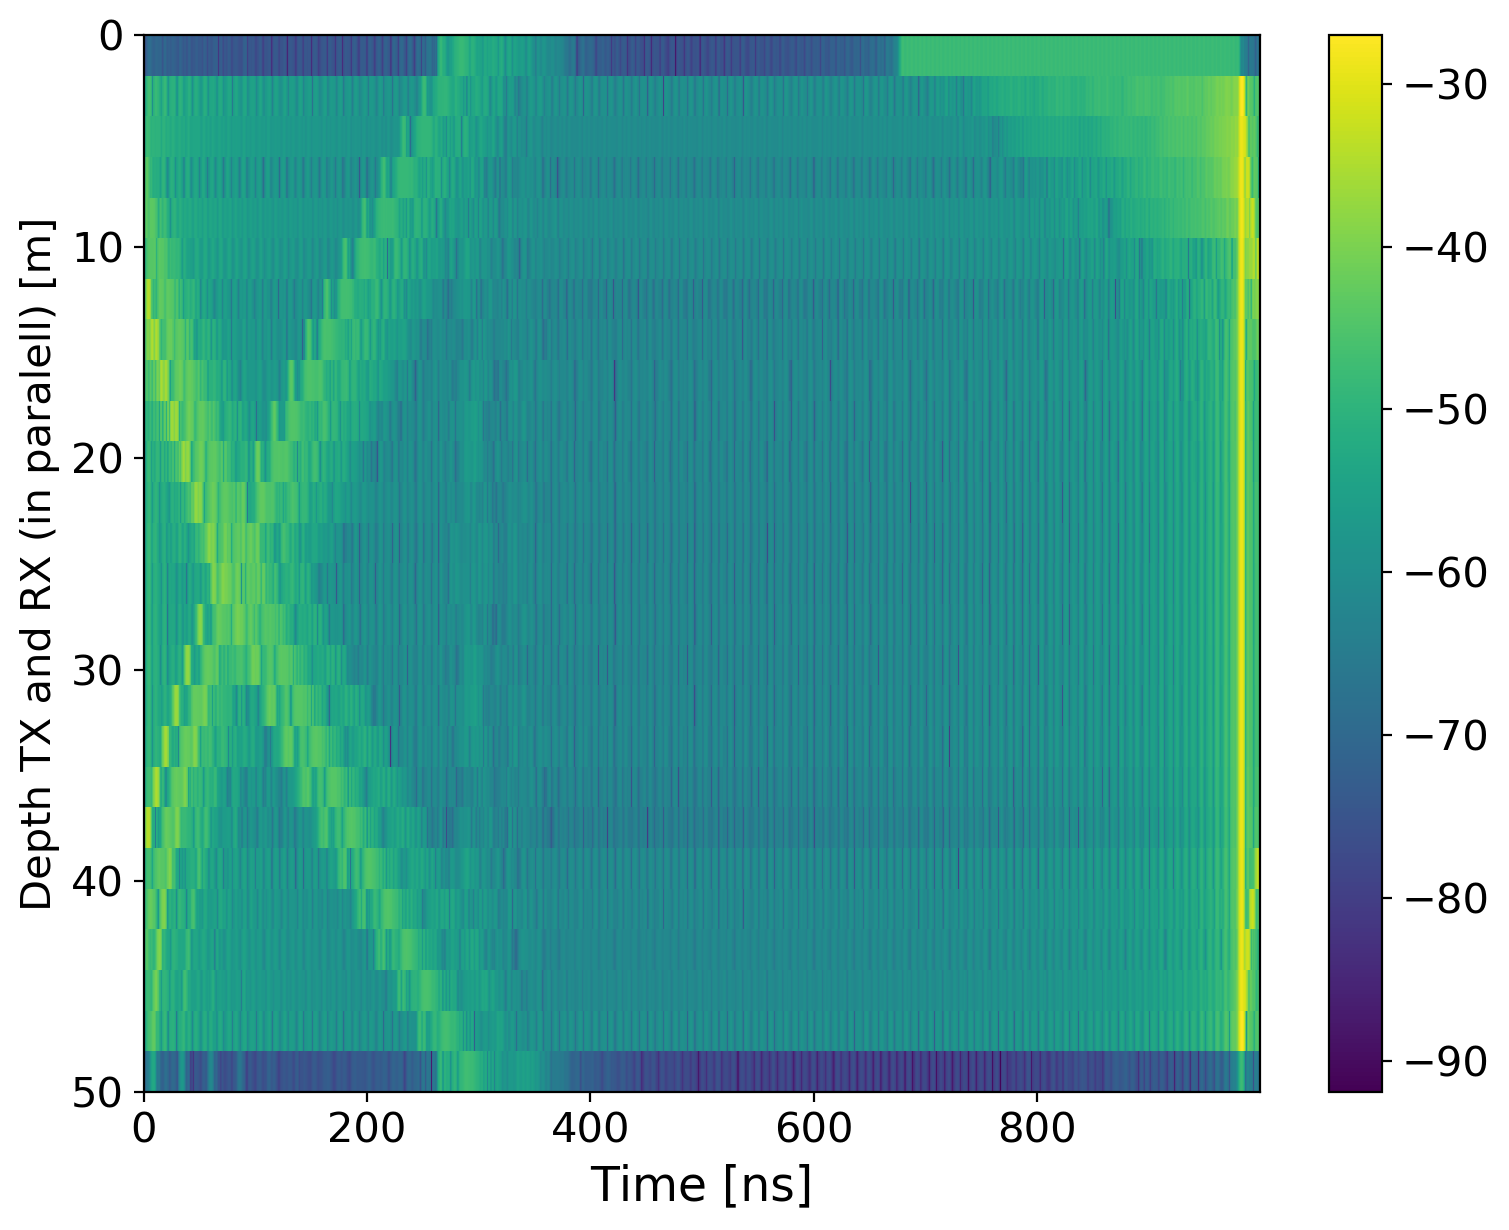

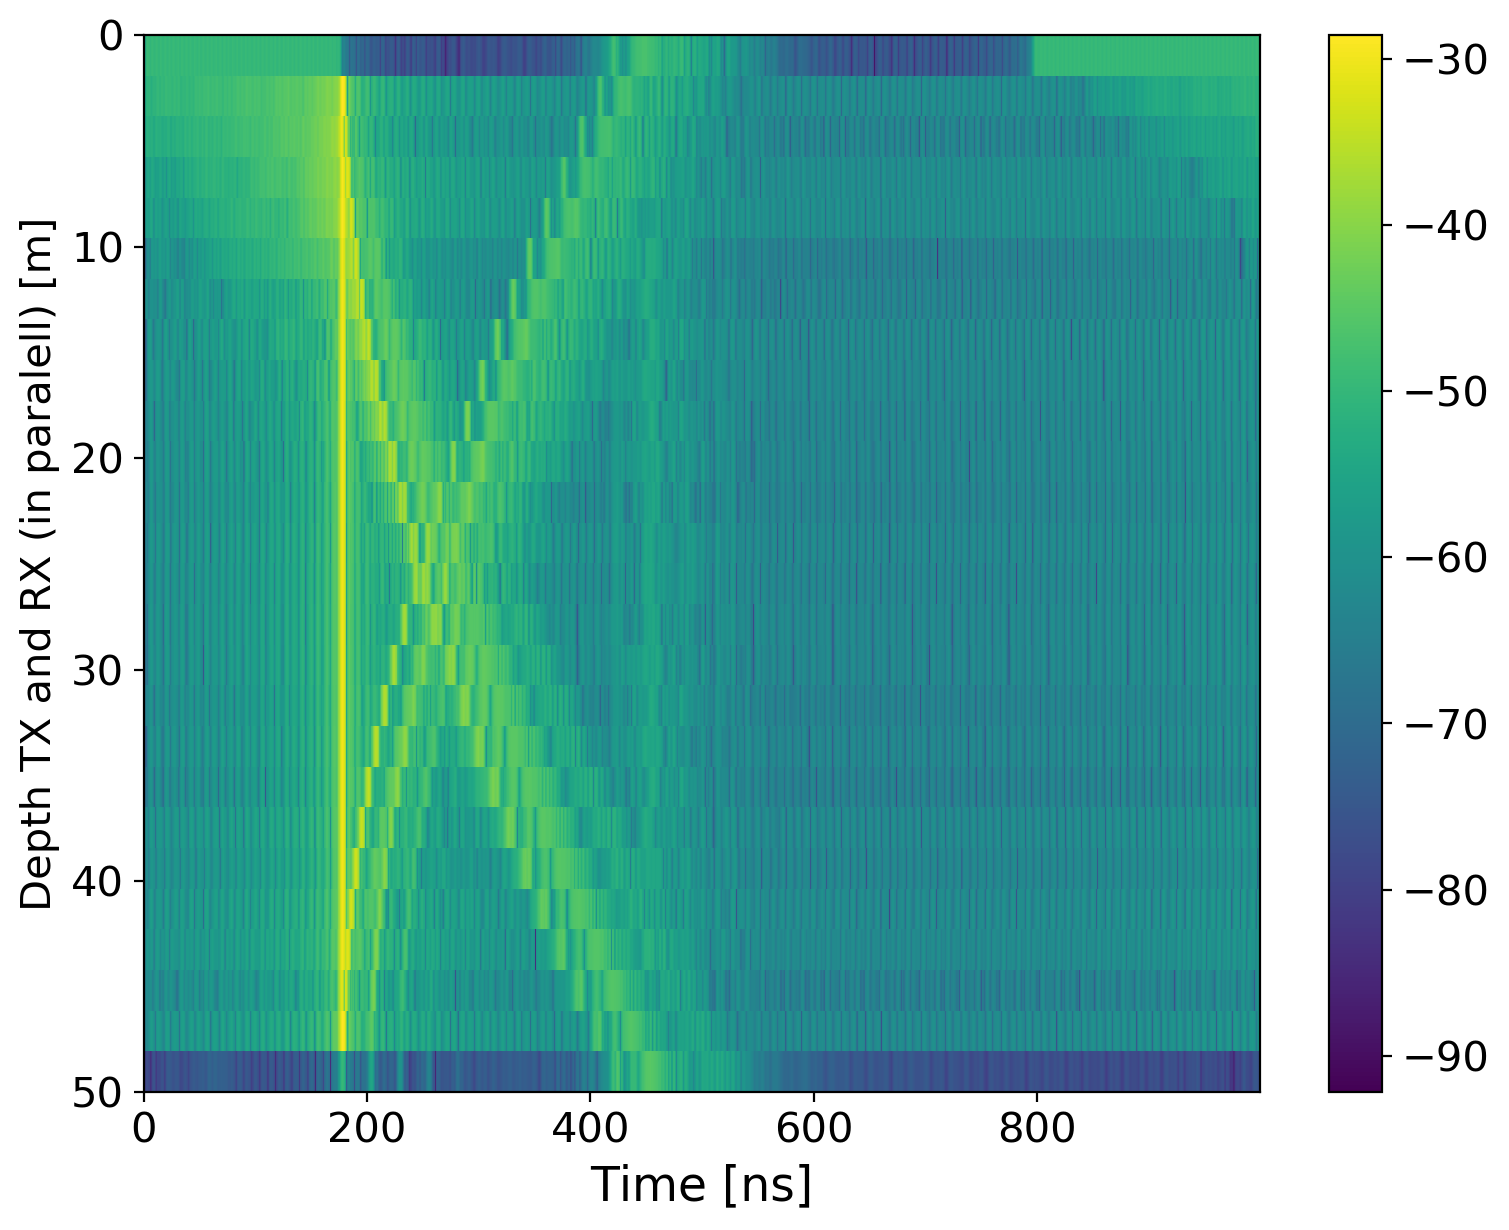

In [36]:
# Paralell Scan
bscan_parallel = np.zeros((nDepths_rx, nSamples), dtype='float')
bscan_parallel_ref = np.zeros((nDepths_rx, nSamples), dtype='float')
bscan = np.zeros((nDepths_rx, nSamples), dtype='float')


for j in range(nRanges):
 #   depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))
    for i in range(nDepths_rx):
        spectrum_rx = ascan_rx[:,i,j,i]
        nHalf = int(len(spectrum_rx)/2)
        spectrum_rx[:nHalf] = np.zeros(nHalf)
        pulse_rx = np.fft.ifft(spectrum_rx)
        pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9,0.75e9, 1/sampling_interval,4)

        spectrum_rx_ref = ascan_rx_ref[:,i,j,i]
        nHalf = int(len(spectrum_rx_ref)/2)
        pulse_rx_ref[:nHalf] = np.zeros(nHalf)
        pulse_rx_ref = np.fft.ifft(spectrum_rx_ref)
        pulse_rx_ref = butterBandpassFilter(pulse_rx_ref, 0.25e9, 0.75e9, 1/sampling_interval,4)
        
        spectrum = spectrum_rx - spectrum_rx_ref 
        pulse = np.fft.ifft(spectrum)
        pulse = butterBandpassFilter(pulse, 0.25e9, 0.75e9, 1/sampling_interval,4)
        

        #depth_scan[i,:] = abs(pulse_rx)**2
        bscan_parallel[i,:] = abs(pulse_rx)
        bscan_parallel_ref[i,:] = abs(pulse_rx_ref)
        bscan[i,:] = abs(pulse)**2
    
    fig=pl.figure(figsize=(9,7), dpi =200)
    ax = fig.add_subplot(111)
    #ax.set_title('Paralell Depth Scan \n R = ' + str(int(Range_list[j])), fontsize=19)
    #ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    pmesh = ax.imshow(10*np.log10(bscan_parallel), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    cbar = pl.colorbar(pmesh)

    cbar.ax.tick_params(labelsize=15)
    #pl.title('Depth of RX and TX =' + str(RX_depths[R])+ ' m')
    ax.tick_params(labelsize=15)


    ax.set_ylabel('Depth TX and RX (in paralell) [m]', fontsize=15)
    ax.set_xlabel('Time [ns]', fontsize=17)

    if i == nRanges -1:
        ax.set_xlabel('Time [ns]')
    if i == 0:
        ax.set_ylabel('Depth [m]')
    pl.show()
    
    
    

NameError: name 'j' is not defined

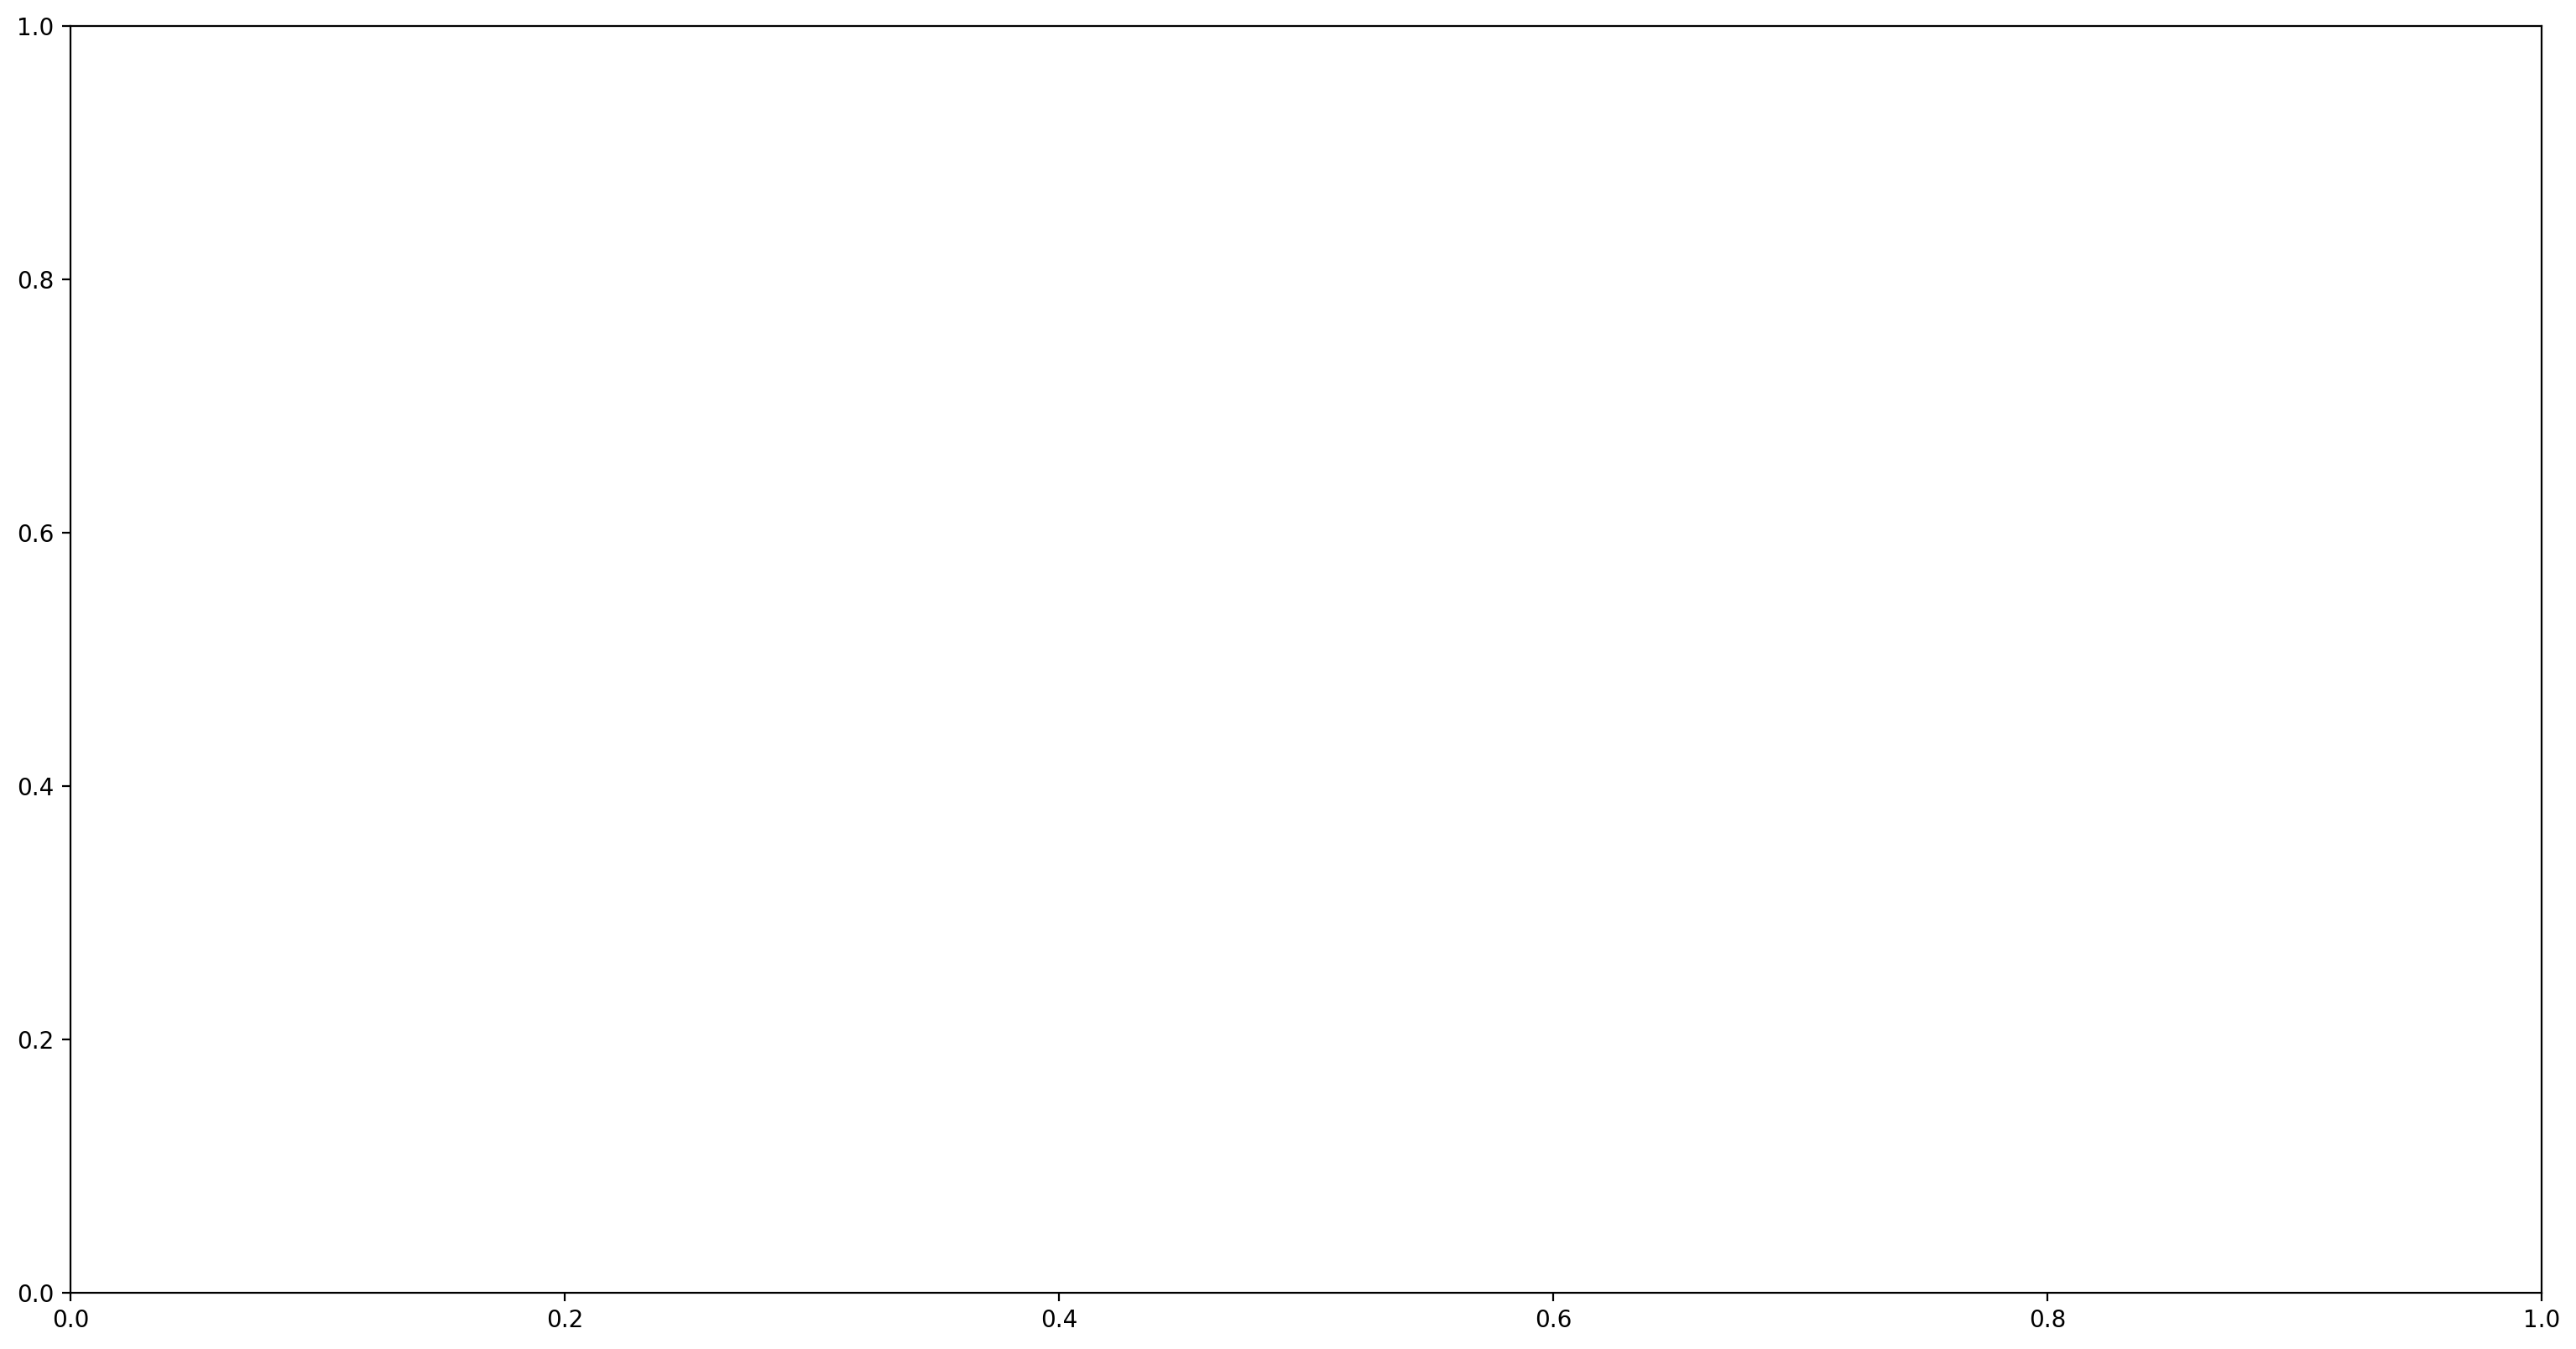

In [15]:
fig=pl.figure(figsize=(19,10), dpi =200)
ax = fig.add_subplot(111)
ax.set_title('Paralell Depth Scan \n R = ' + str(int(Range_list[j])))
pmesh = ax.imshow(10*np.log10(bscan_parallel), extent=(0, max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect = 'auto', vmin=-120, vmax=-40)
cbar = pl.colorbar(pmesh)
ax.set_ylabel('Depth TX and RX (in paralell) [m]')
ax.set_xlabel('Time [ns]')
if i == nRanges -1:
    ax.set_xlabel('Time [ns]')
if i == 0:
    ax.set_ylabel('Depth [m]')



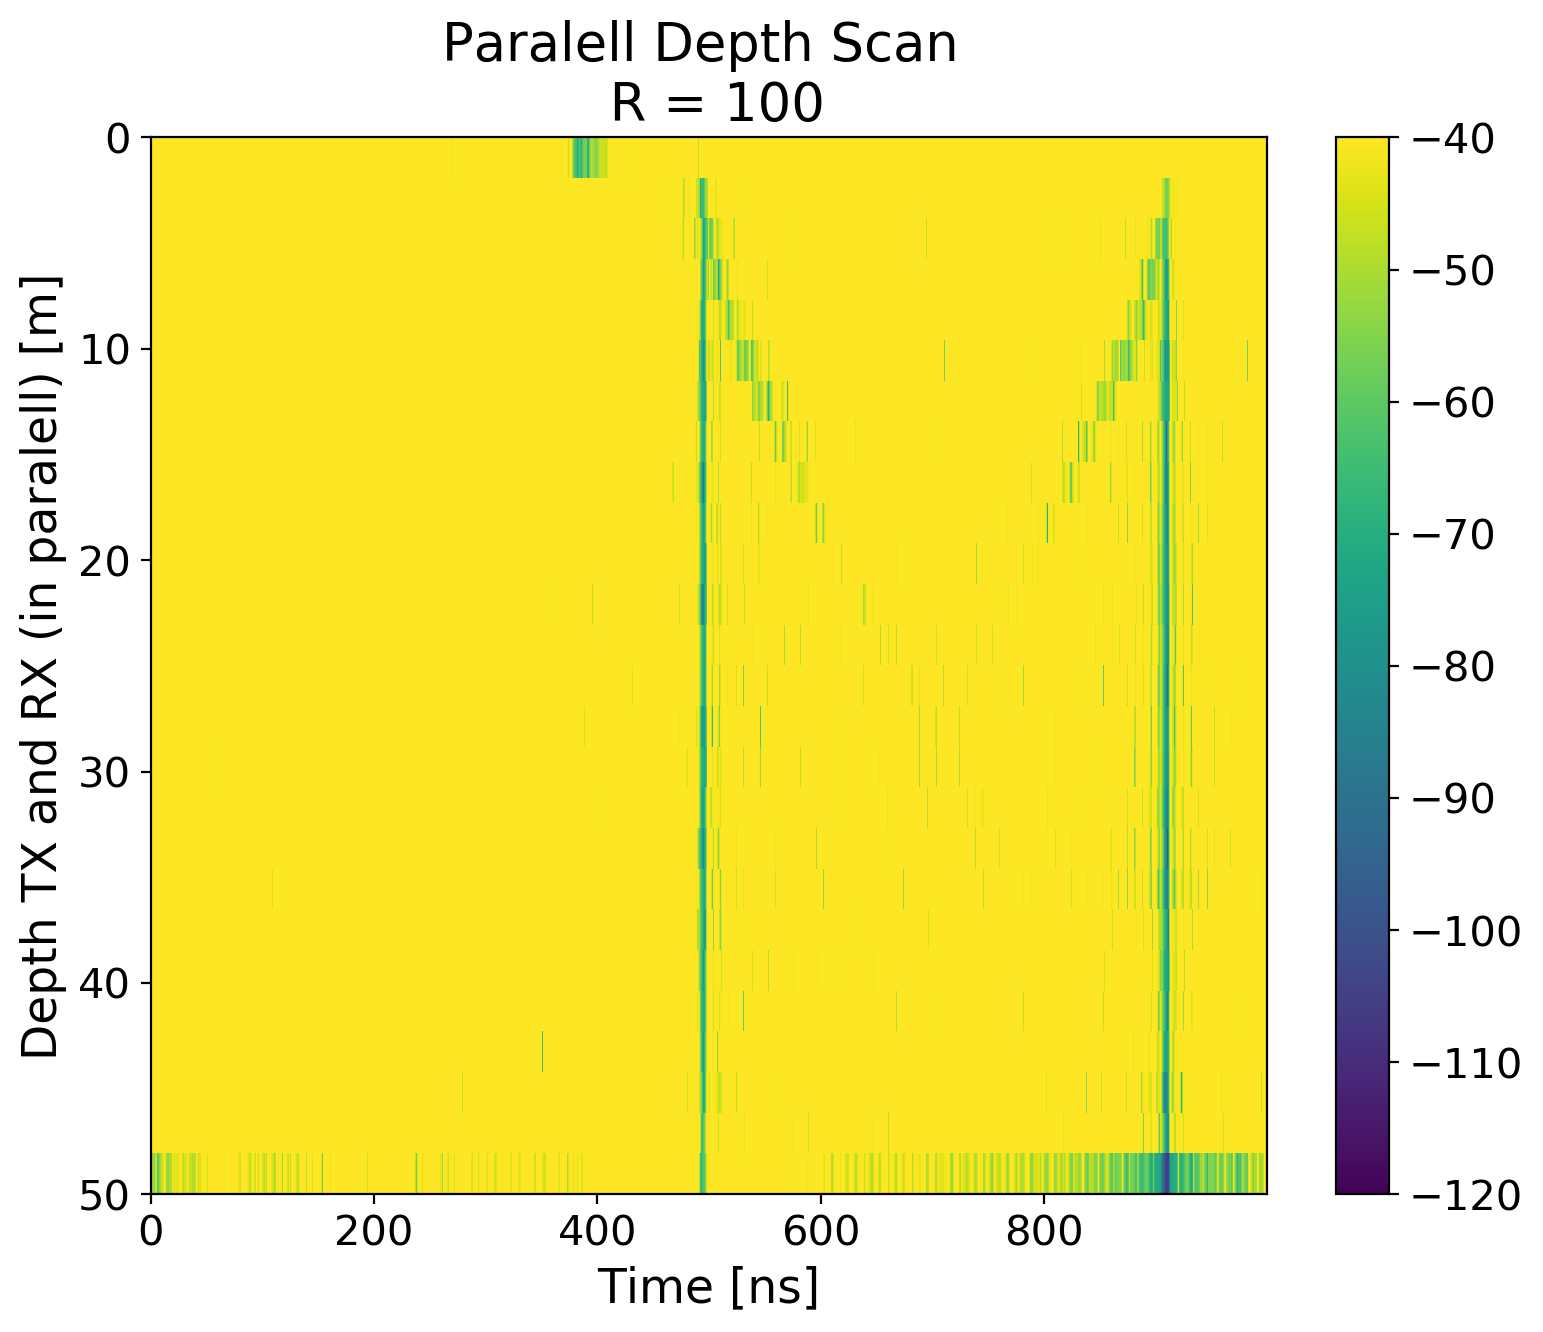

In [85]:
bscan = 10*np.log10(bscan_parallel)-10*np.log10(bscan_parallel_ref)
fig=pl.figure(figsize=(9,7), dpi=200)
ax = fig.add_subplot(111)
#ax.set_title('Paralell Depth Scan \n R = ' + str(int(Range_list[j])))
pmesh = ax.imshow(bscan, extent=(0, max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect = 'auto', vmin=-120, vmax=-40)
cbar = pl.colorbar(pmesh)
ax.set_ylabel('Depth TX and RX (in paralell) [m]')
ax.set_xlabel('Time [ns]')
if i == nRanges -1:
    ax.set_xlabel('Time [ns]')
if i == 0:
    ax.set_ylabel('Depth [m]')

ax.set_title('Paralell Depth Scan \n R = ' + str(int(Range_list[j])), fontsize=19)
#ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
cbar.ax.tick_params(labelsize=15)
#pl.title('Depth of RX and TX =' + str(RX_depths[R])+ ' m')
ax.tick_params(labelsize=15) 
ax.set_ylabel('Depth TX and RX (in paralell) [m]', fontsize=17)
ax.set_xlabel('Time [ns]', fontsize=17)

if i == nRanges -1:
    ax.set_xlabel('Time [ns]')
if i == 0:
    ax.set_ylabel('Depth [m]')
pl.show()

In [118]:
# Paralell Scan

for j in range(nRanges):
#for j in range(1):
    #tx_pulse_filtered = tx_pulse - tx_pulse_ref
    depth_scan_filtered = np.zeros((nDepths_rx, tx_pulse.nSamples))

    for i in range(nDepths_rx):
        spectrum = ascan_rx[:,i,j,i] - ascan_rx_ref[:,i,j,i]
        #spectrum_rx = ascan_rx[:,i,j]
        nHalf = int(len(spectrum)/2)
        spectrum[:nHalf] = np.zeros(nHalf)

        pulse = np.fft.ifft(spectrum)
        pulse = butterBandpassFilter(pulse, 0.25e9,0.75e9, 1/sampling_interval,4)
       

        depth_scan_filtered[i,:] = abs(pulse)**2
        #depth_scan[i,:] = pulse_rx.real
    fig=pl.figure(figsize=(19,10), dpi =200)
    ax = fig.add_subplot(111)
    #ax.set_title('Paralell Depth Scan \n R = ' + str(int(Range_list[j])))
    #ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    pmesh = ax.imshow(10*np.log10(depth_scan_filtered), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    cbar = pl.colorbar(pmesh)


    ax.set_ylabel('Depth TX and RX (in paralell) [m]')
    ax.set_xlabel('Time [ns]')

    
    
    if i == nRanges -1:
        ax.set_xlabel('Time [ns]')
    if i == 0:
        ax.set_ylabel('Depth [m]')
        
    vertical_features_1 = [310, 375, 390]
    vertical_features_2 = [785, 805, 885]
    Range = np.linspace(10, 30, len(vertical_features_1))
    
    #time = np.linspace(min(vertical_features), max(vertical_features), len(vertical_features))
    #pl.plot(Range, vertical_features_1, marker='o', c='r', label='Left Feature')
    #pl.plot(Range, vertical_features_2, marker='o', c='b', label='Right Feature')
    #pl.legend()
    #pl.axhline(300, c='y')
    #pl.axhline(395, c='y')
    #pl.axhline(495, c='y')
    #pl.text(280, 600, 'Direct Signal', rotation=90, fontsize=17)
    #pl.xlabel('Range[m]', fontsize=17)
    #pl.ylabel('Time of Vertical Features', fontsize=17)
    #pl.grid(alpha=0.5)
    #pl.xticks(fontsize=17)
    #pl.yticks(fontsize=17)
    #pl.show()

ValueError: could not broadcast input array from shape (1999,) into shape (799,)

819
700


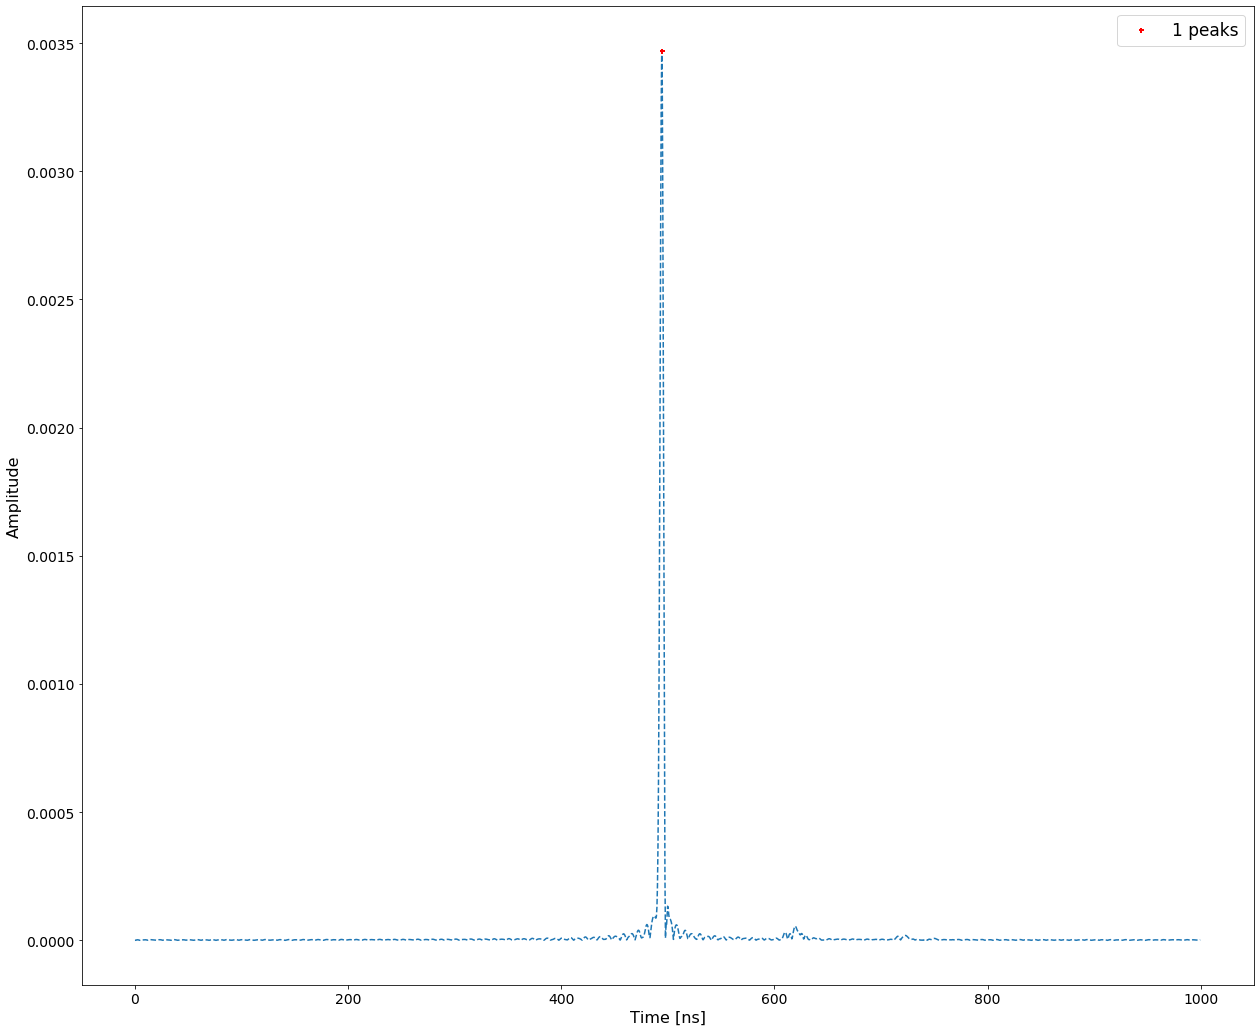

In [19]:
range_oi = 30
depth_oi = 20

id_depth = util.findNearest(depth_oi, receiverDepth_list)
id_range = util.findNearest(range_oi, Range_list)
#print(id_range, id_depth)
spectrum_oi = ascan_rx[:,id_depth,id_range,id_depth] #i : depth, j: range
spectrum_oi[:nHalf] = np.zeros(nHalf)

pulse_oi = np.fft.ifft(spectrum_oi)
pulse_oi = butterBandpassFilter(pulse_oi, 0.25e9,0.75e9, 1/sampling_interval,4)
time = tx_pulse.time_space

cut_lower = 3.5e-7
cut_upper = 4.1e-7

a = np.where(time < cut_upper)
b = np.amax(a)
c = np.where(time > cut_lower)
d = np.amin(c)
print(b)
print(d)


#pulse_oi[745:840] = 0

#pl.plot(time, abs(pulse_oi))

indexes = pku.indexes(abs(pulse_oi), thres = 0.9)
pplot(time*1e9, abs(pulse_oi), indexes)
#pl.xlim(640, 800)
#pl.ylim(0, 3e-5)
pl.xlabel('Time [ns]', fontsize = 16)
pl.ylabel('Amplitude', fontsize = 16)
pl.xticks(fontsize = 14)
pl.yticks(fontsize = 14)
pl.legend(fontsize = 17)

pl.show()

[749 765 778 793 801 804 820 837 959 972 980]


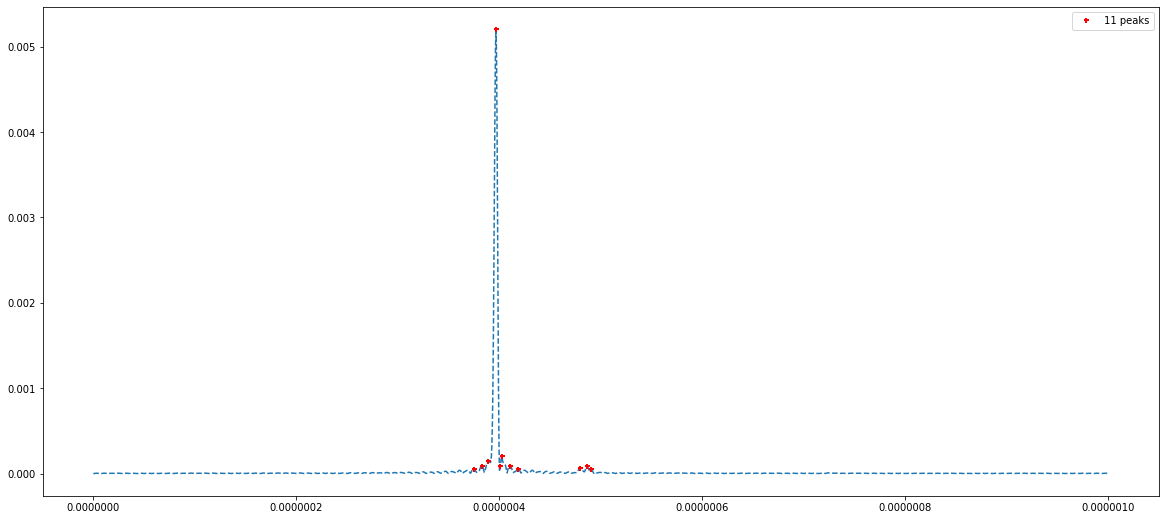

In [105]:
indexes = pku.indexes(abs(pulse_oi), thres = 0.01)
pplot(time, abs(pulse_oi), indexes)
print(indexes)

In [94]:
#Prediction where unwanted Peaks will be:
 
r =  10           # Range
c = 2.997e8       # Speed of Light
d =  20           # Depth of TX and RX Antenna
epsilon_r = 3.19  # Permittivity of Pure Ice

t_direct     = (r * np.sqrt(epsilon_r))/c  # direct transmitted signal
t_reflected = (2 * np.sqrt(r**2/4+d**2))/c * np.sqrt(epsilon_r) # signal reflected from the surface

print(t_direct*1e9, 'ns')

59.59483183013597 ns


In [59]:
#Wavefront emanating from source depth:
sourceDepth = 20
id_tx = util.findNearest(tx_array, sourceDepth)
print(id_tx, tx_array[id_tx])

10 20.0


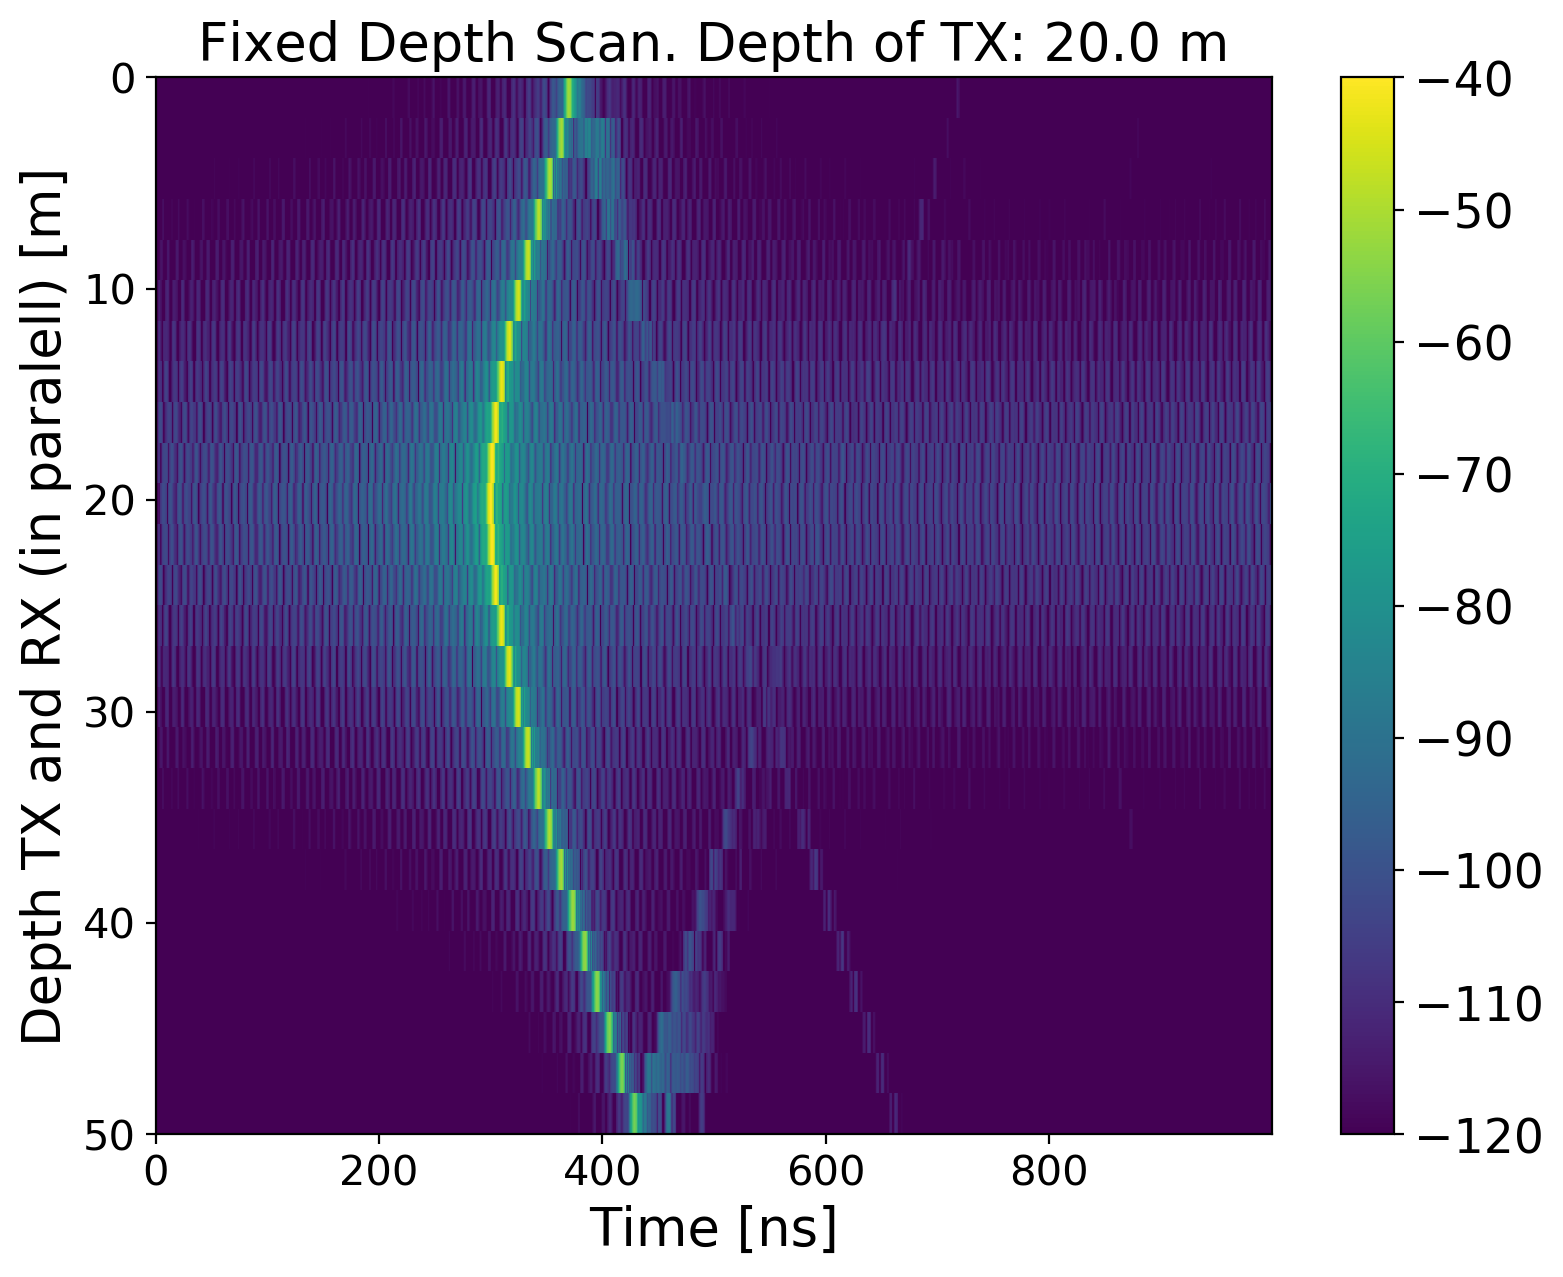

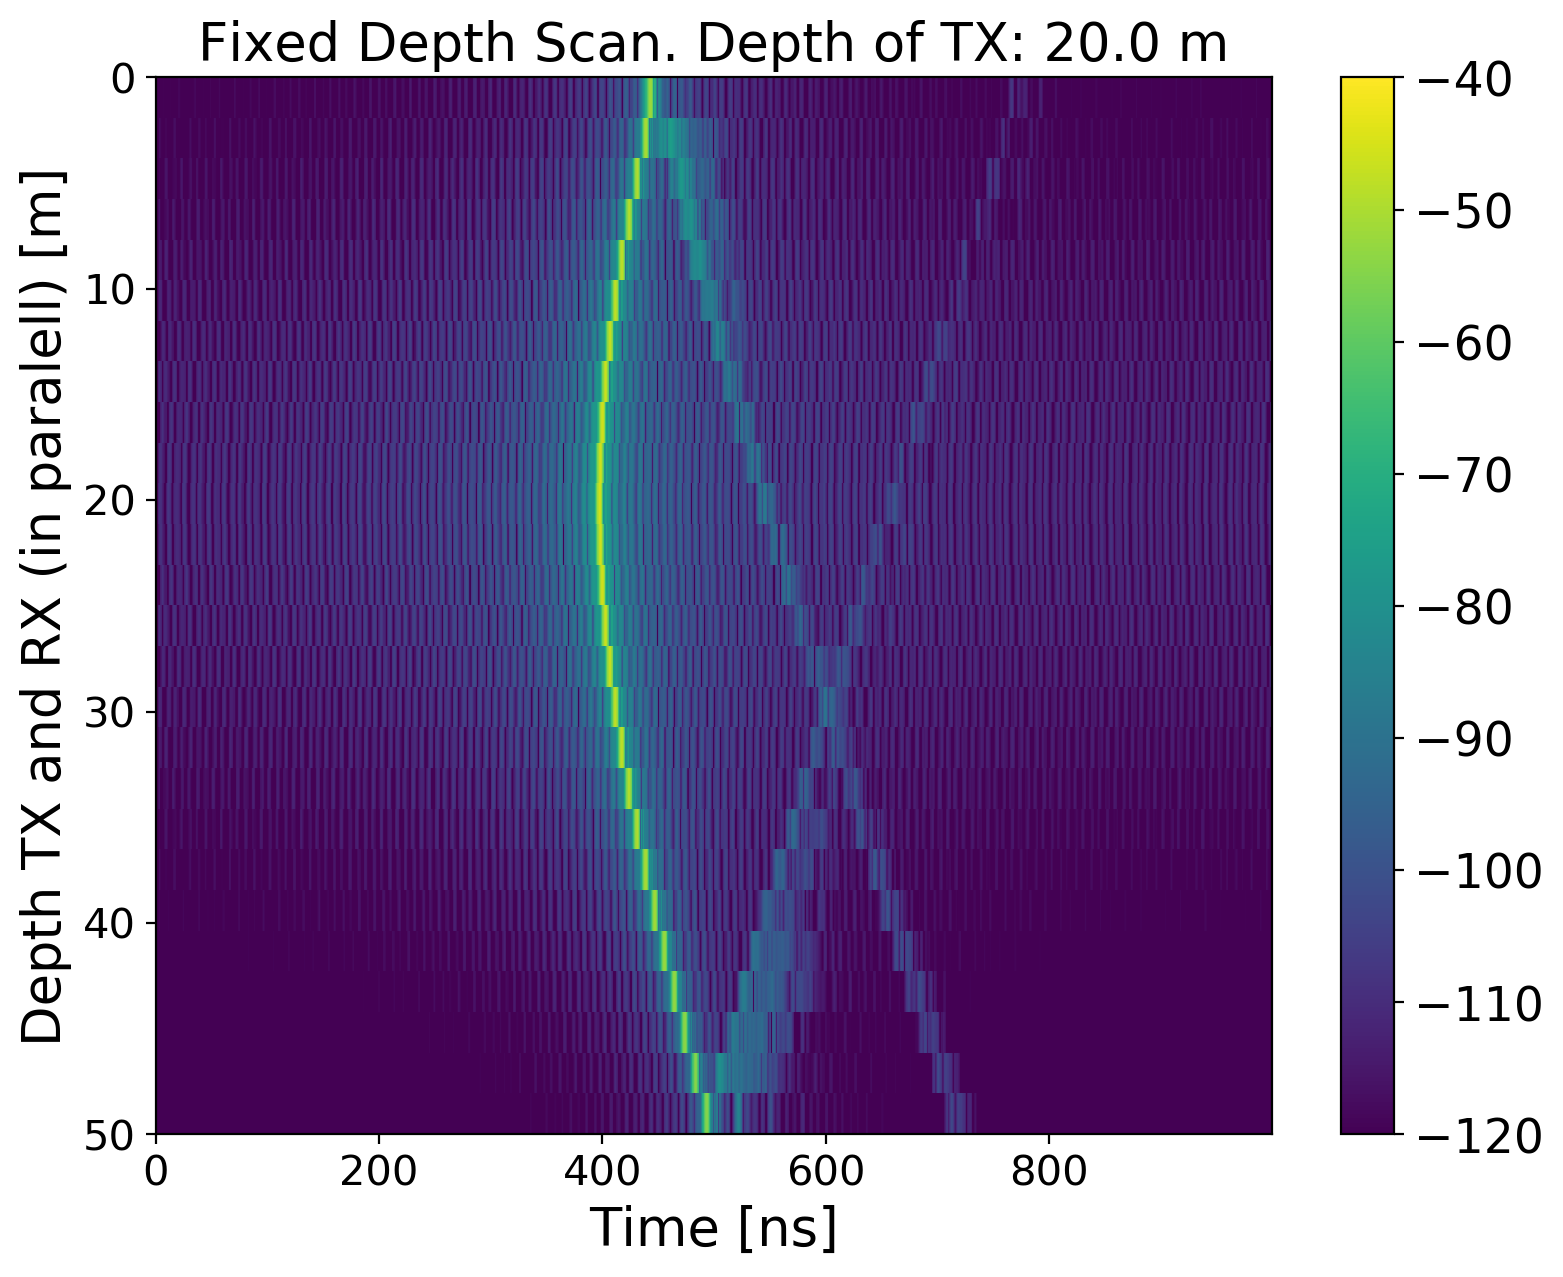

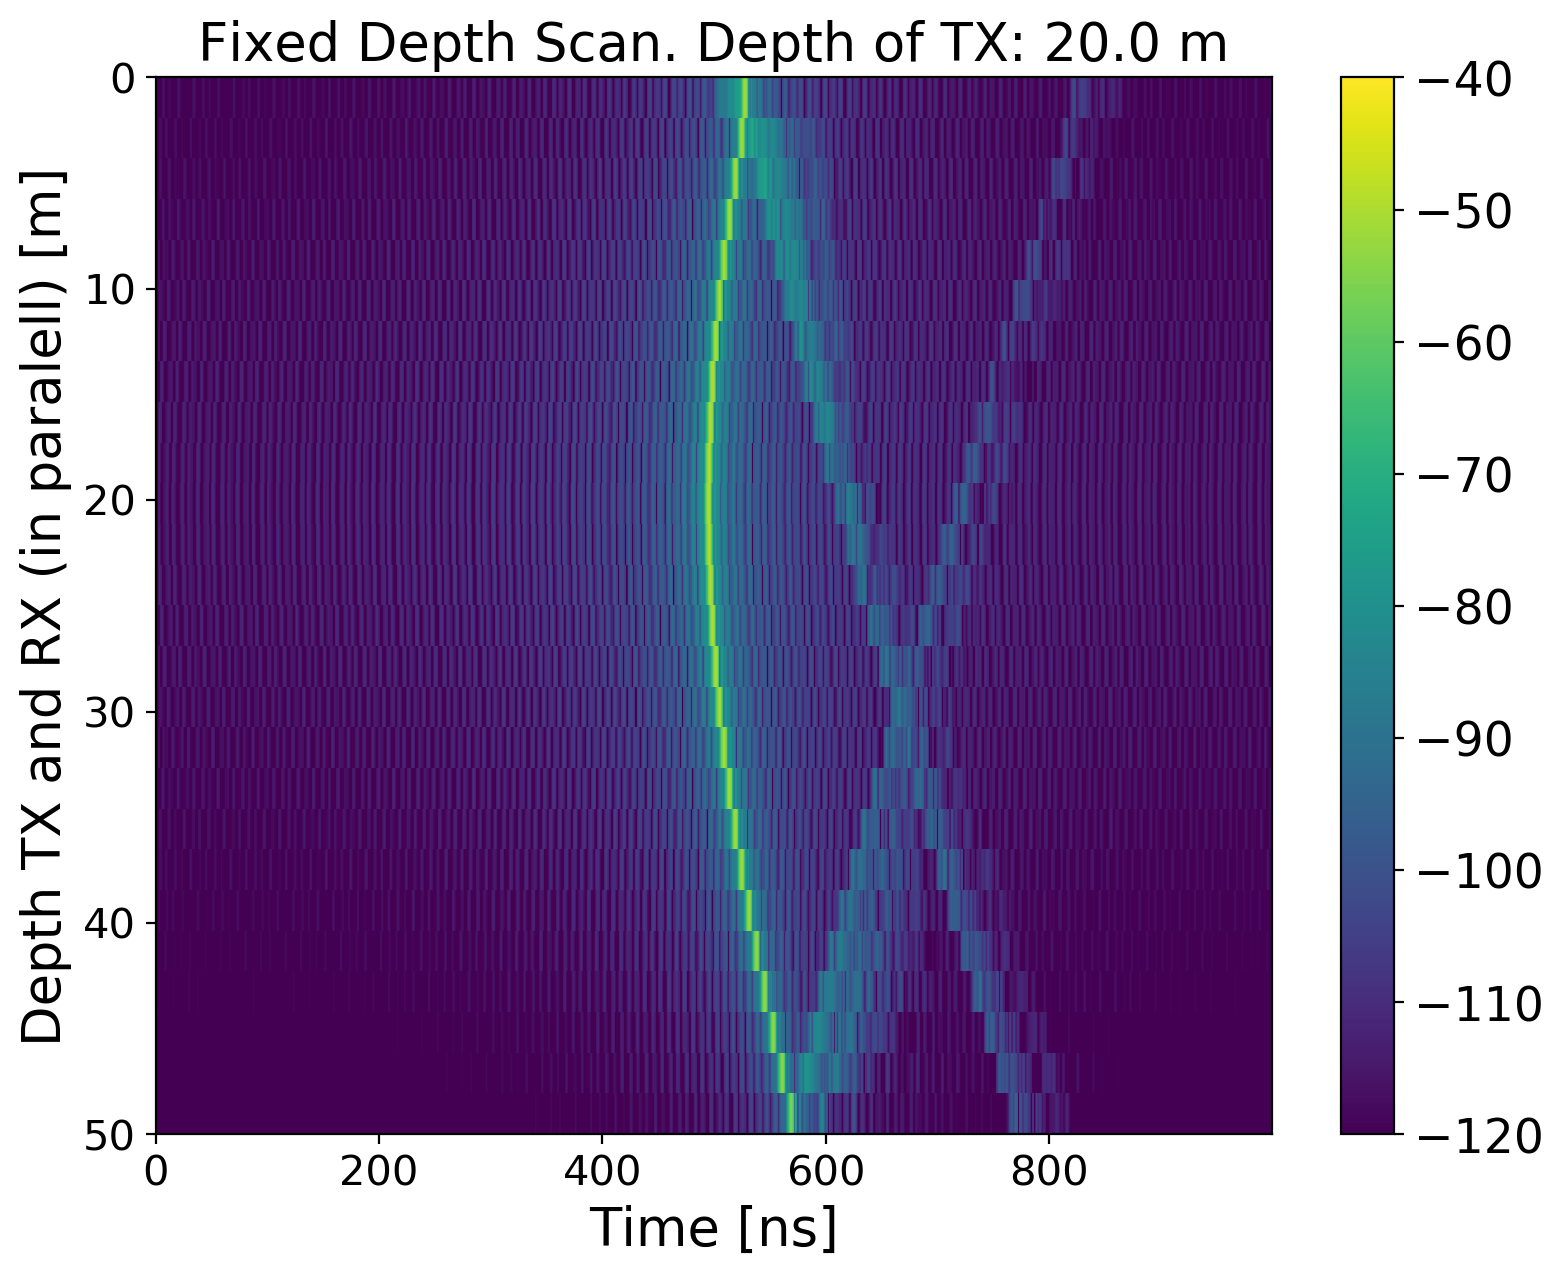

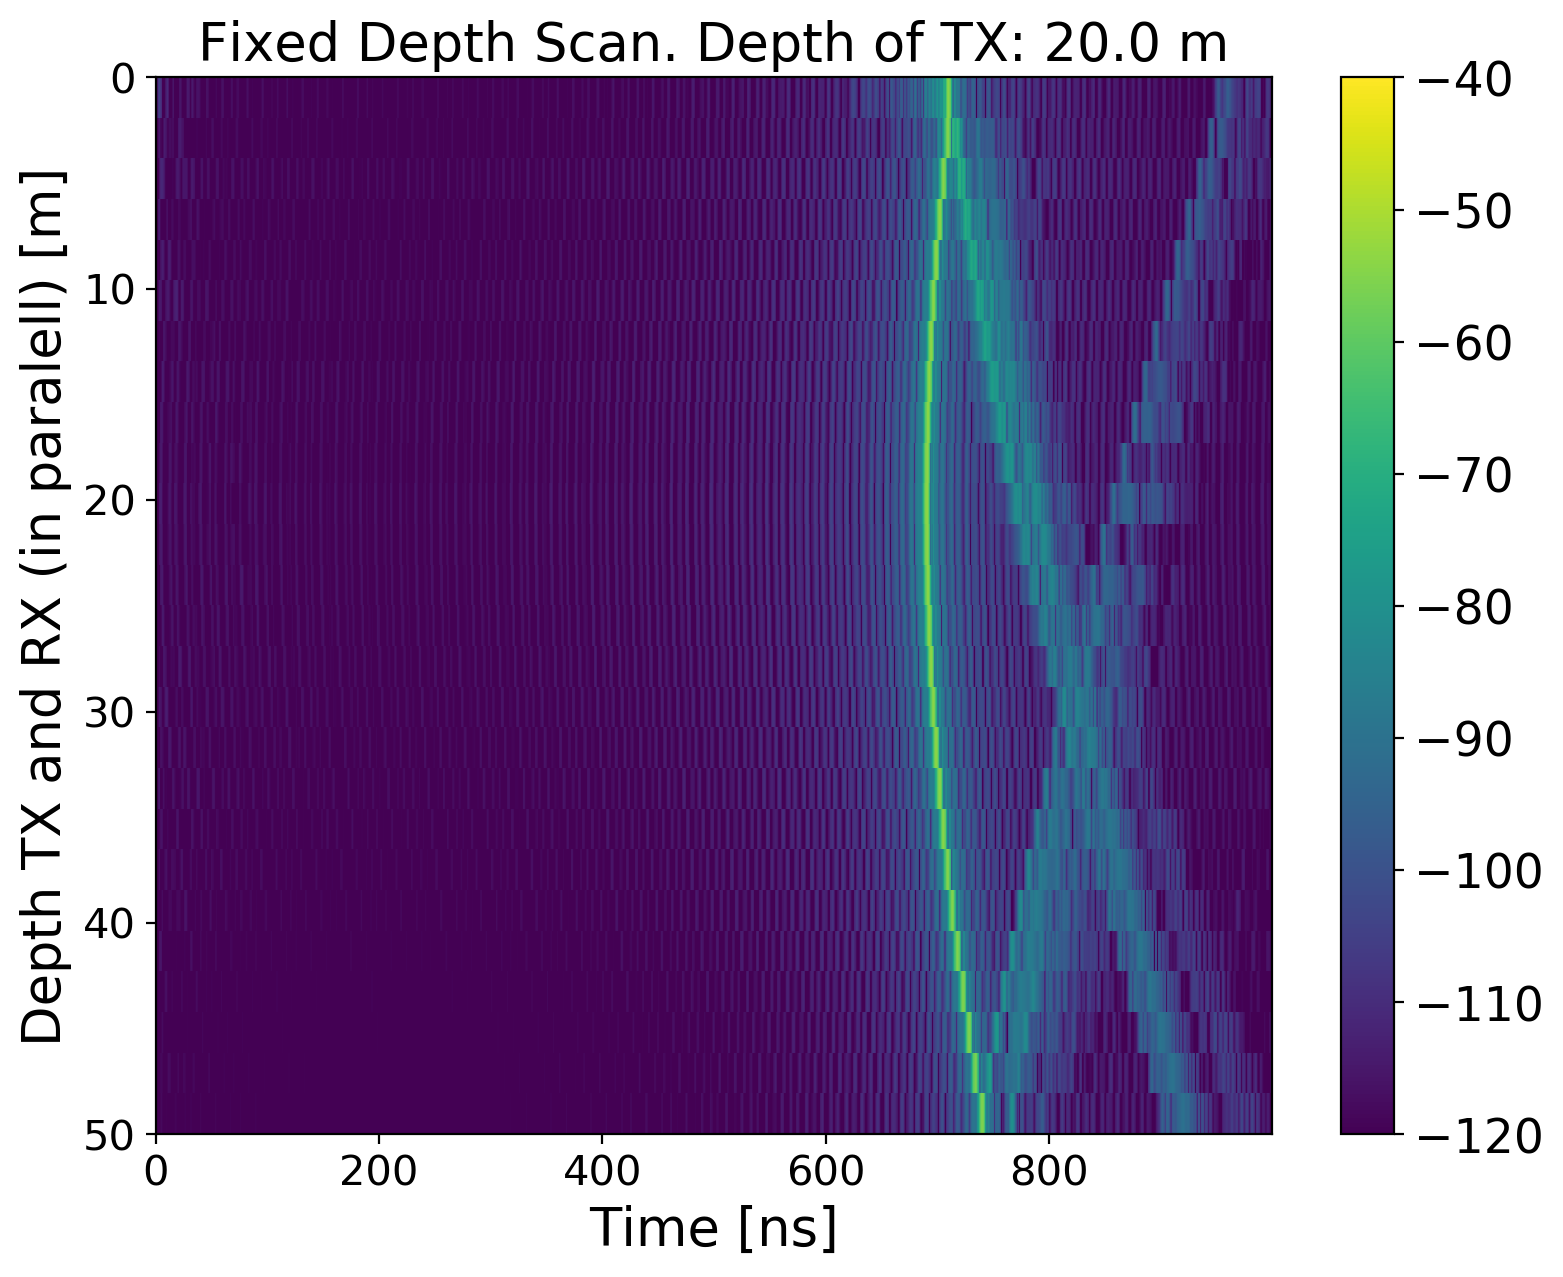

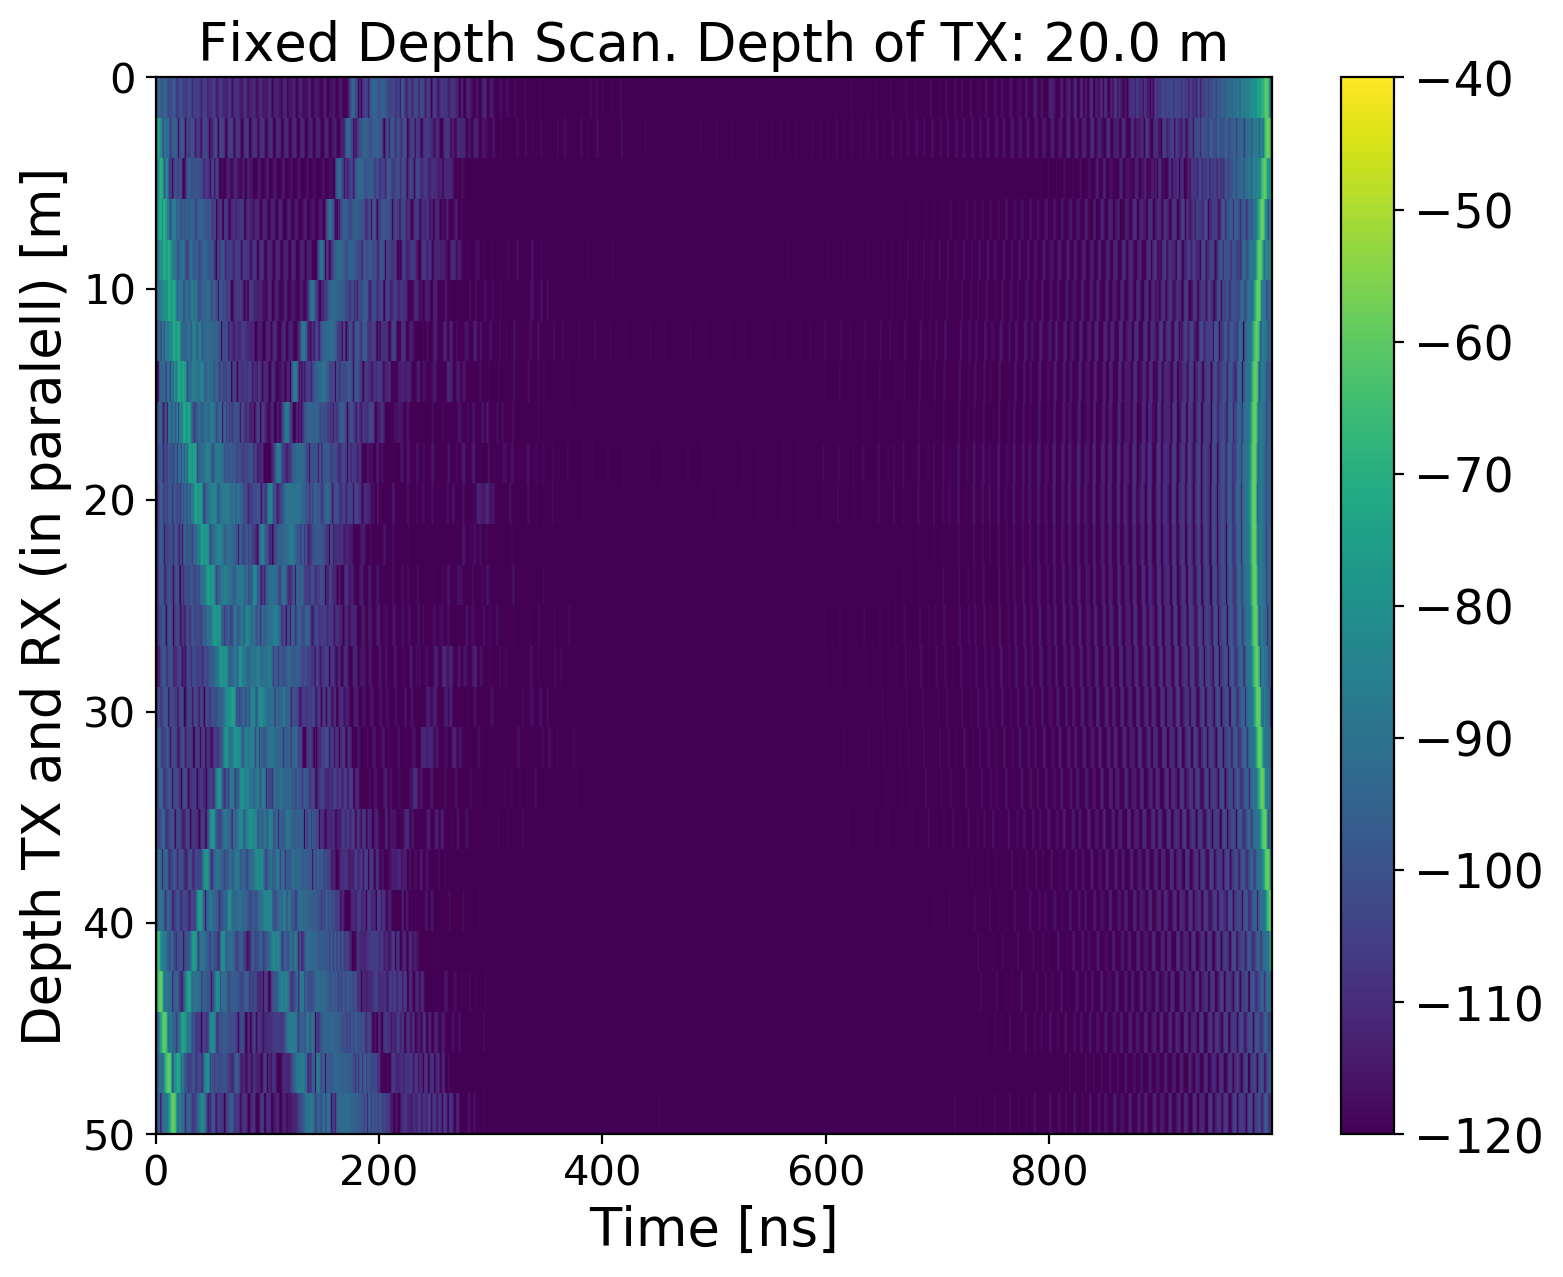

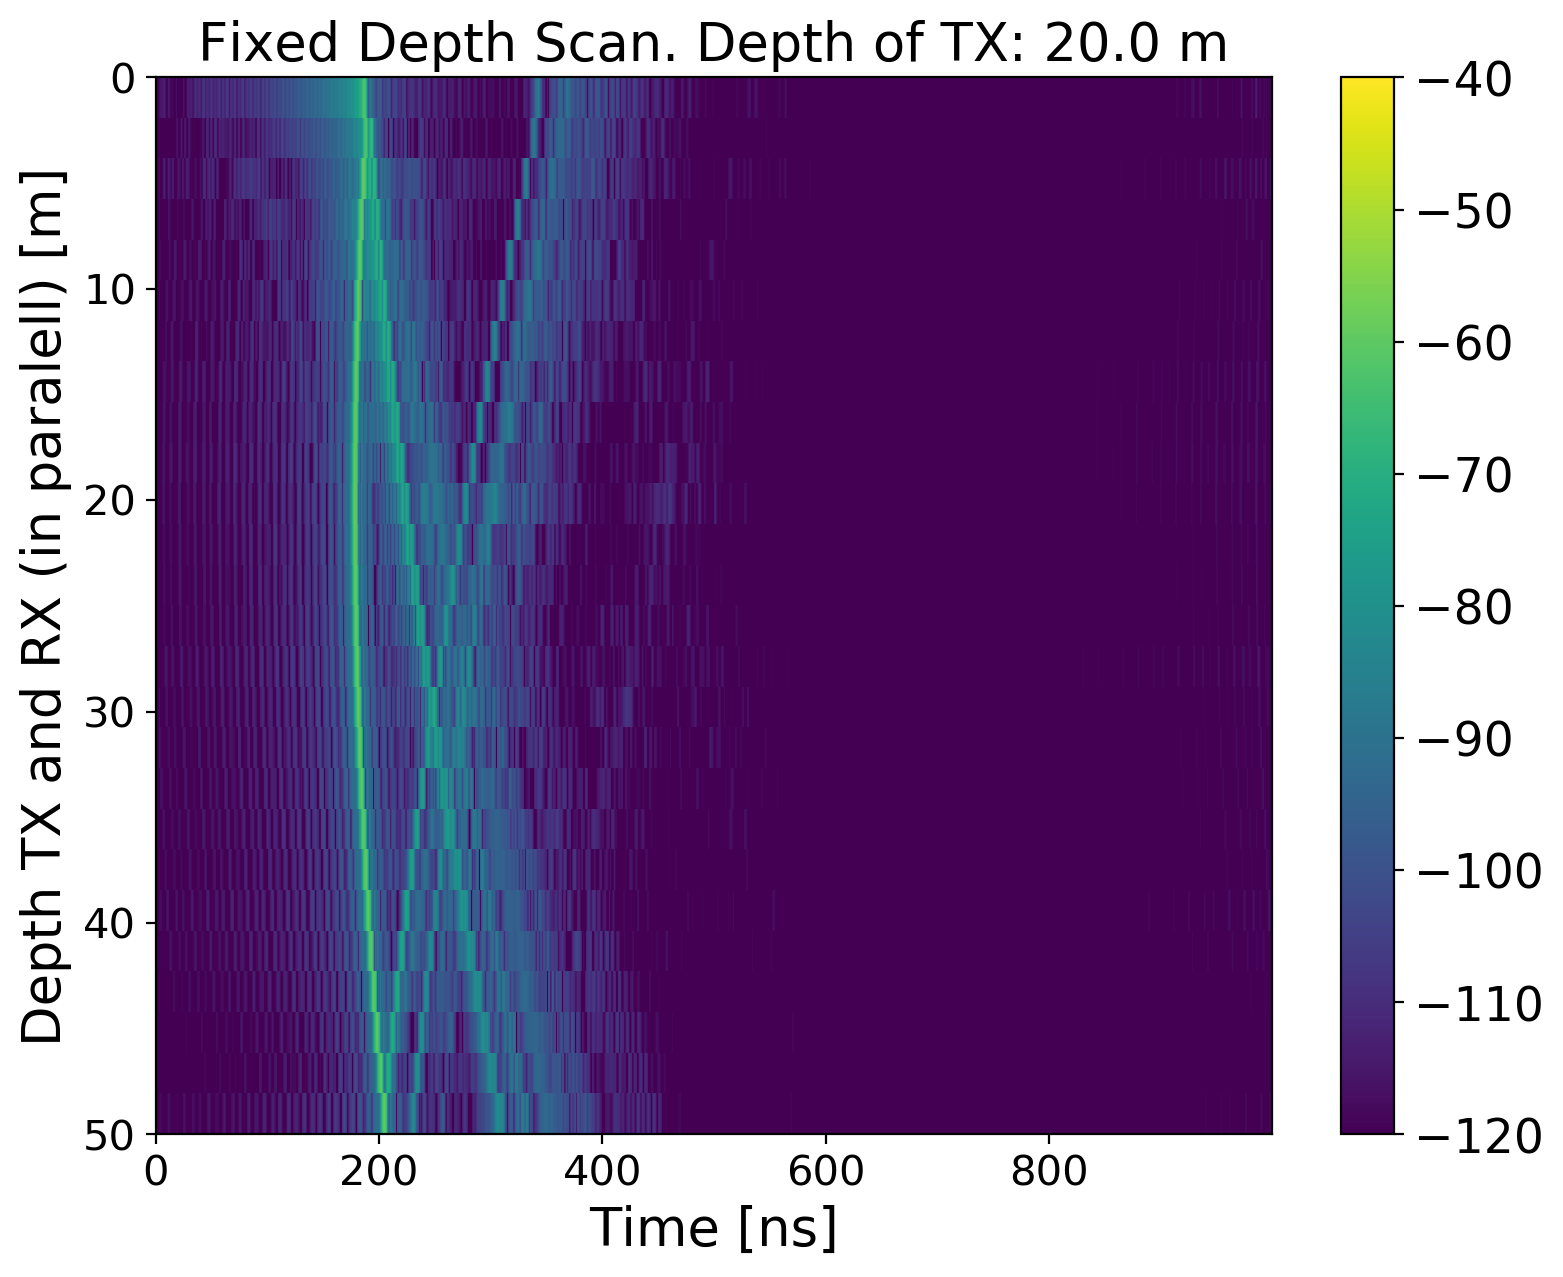

In [87]:
# fix depth of TX, varying range between TX and RX 

for j in range(nRanges):
    depth_scan = np.zeros((nDepths_rx, tx_pulse.nSamples))

    for i in range(nDepths_rx):
        spectrum_rx = ascan_rx[:,id_tx,j,i]
        nHalf = int(len(spectrum_rx)/2)
        spectrum_rx[:nHalf] = np.zeros(nHalf)

        pulse_rx = np.fft.ifft(spectrum_rx)
        pulse_rx = butterBandpassFilter(pulse_rx, 0.25e9,0.75e9, 1/sampling_interval,5)
       

        depth_scan[i,:] = abs(pulse_rx)**2
        #depth_scan[i,:] = pulse_rx.real
    fig=pl.figure(figsize=(9,7), dpi = 200)
    ax = fig.add_subplot(111)
    ax.set_title('Fixed Depth Scan. Depth of TX: ' + str(tx_array[id_tx])+' m', fontsize=19)
    #ax.set_title('Fixed Depth Scan \n  '' Range between TX and RX, R = ' +str(int(Range_list[j])), fontsize=19)
    #ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    pmesh = ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto', vmin=-120, vmax=-40)                   
    cbar = pl.colorbar(pmesh)
    cbar.ax.tick_params(labelsize=17)
    #pl.title('Depth of RX and TX =' + str(RX_depths[R])+ ' m')
    ax.tick_params(labelsize=15)


    ax.set_ylabel('Depth TX and RX (in paralell) [m]', fontsize=19)
    ax.set_xlabel('Time [ns]', fontsize=19)

    if i == nRanges -1:
        ax.set_xlabel('Time [ns]')
    if i == 0:
        ax.set_ylabel('Depth [m]')
    pl.show()

In [149]:
# Determining the Depth of the Water Pocket in 1D - refractive index profile

delay_data = np.genfromtxt('delay_times_pure_ice.txt', skip_header=1).T
epsilon_r = 3.19    # relative permittivity of pure ice
#t_delay = delay_data[1] 
#t_delay = 4.12538439e-07
t_delay = 5.12538439e-07
c = 2.997e8         
#r = delay_data[0]    # Range between Antennas
r = 10
# -------------- #
d = 0.5 * np.sqrt((c**2/epsilon_r)*t_delay**2-r**2)   #depth
print(d)


42.71024619206286


NameError: name 'r' is not defined

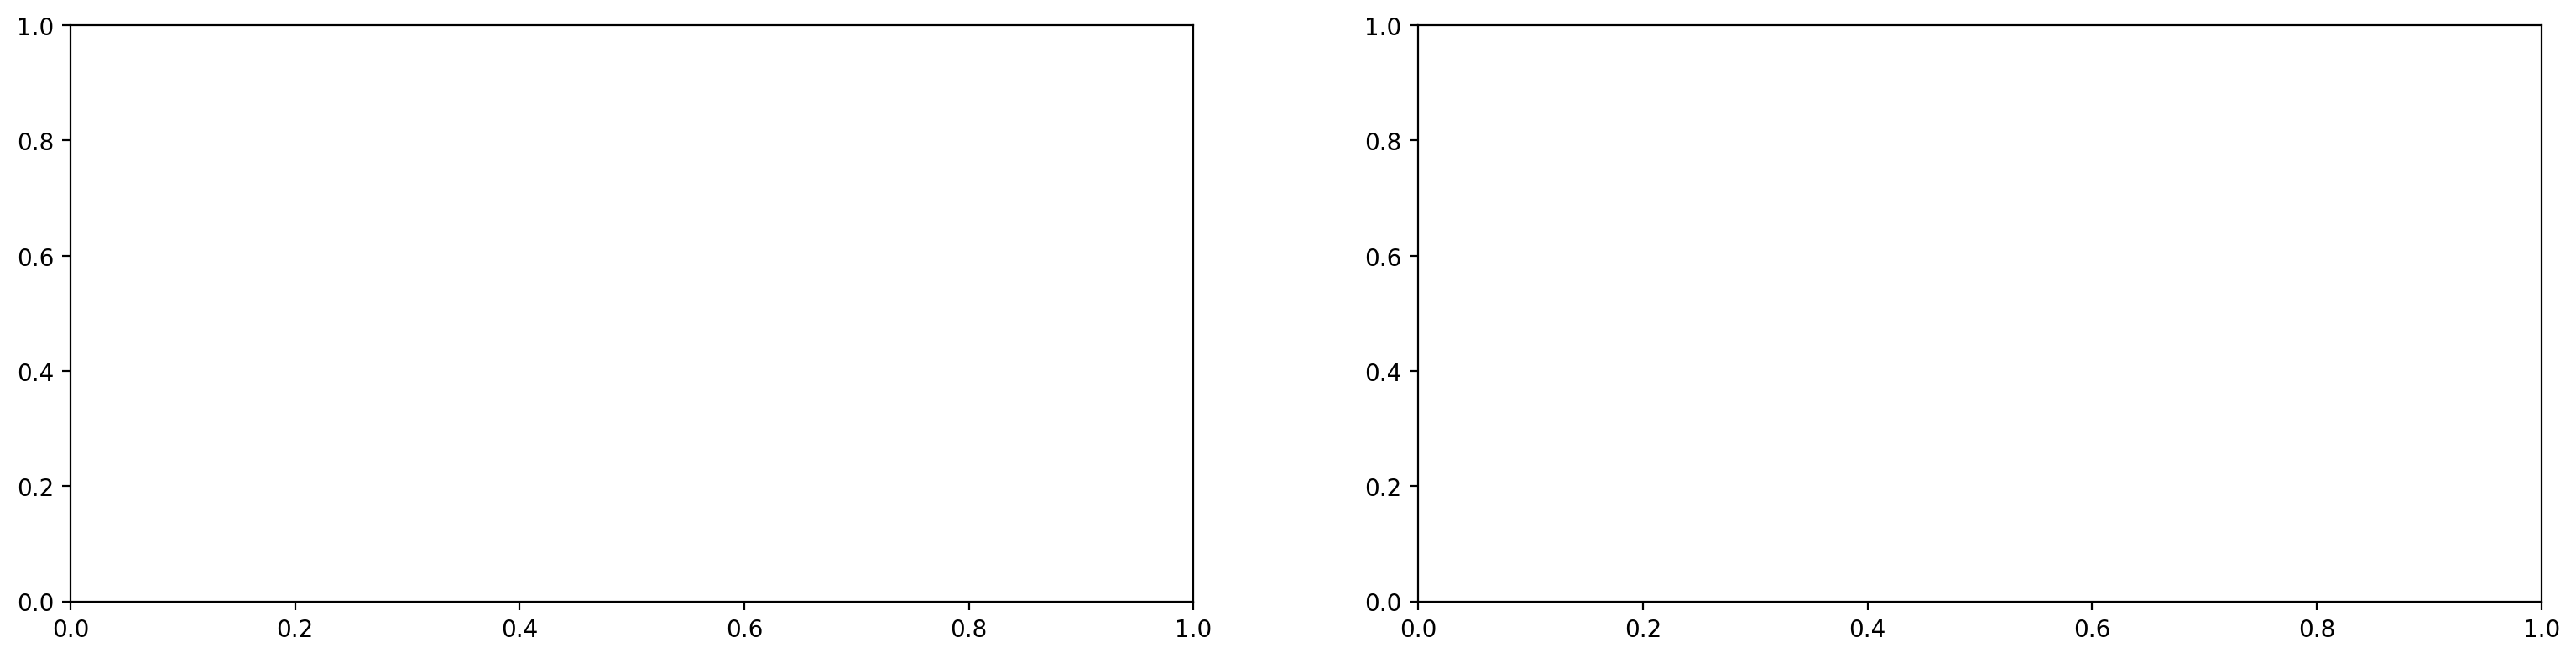

In [18]:
fig = pl.figure(figsize=(19,10), dpi = 200)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.plot(r, t_delay, linestyle='--')
ax2.plot(r, d, linestyle=':', c='r')
ax1.set_xlabel('Range [m]')
ax2.set_xlabel('Range [m]')
ax1.set_ylabel('Delay Time [s]')
ax2.set_ylabel('Estimated Depth [m]')

depth = np.mean(d)
ax2.axhline(depth)
ax2.text(5,38, r'Average Depth: '+str(round(depth,3))+'[m]', fontsize=13, style='italic')


825.9587020649001
We will pick a snow thickness of 24.88662963791828 m
825.9587020649001


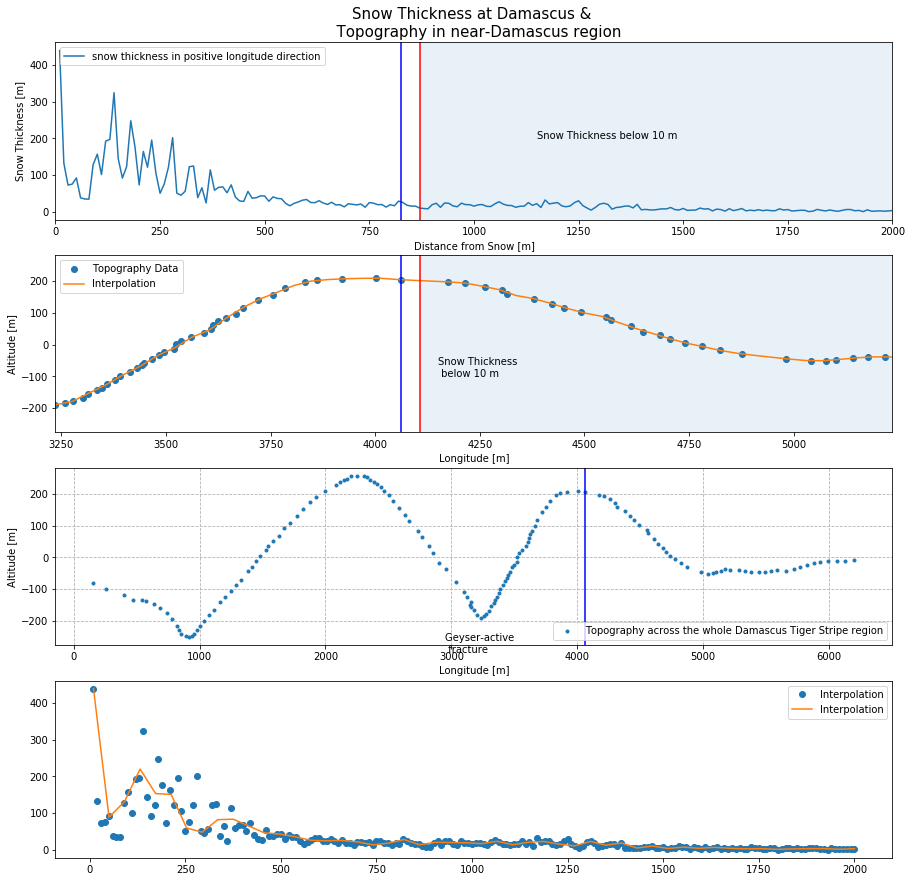

In [13]:
from scipy import interpolate
snow_data = np.genfromtxt('snow-thickness-at-damascus-100kyr.txt', skip_header = True).T  
topography = np.genfromtxt('damascus-topography.txt', skip_header = True).T
pl.rcParams["figure.figsize"] = (15, 15)
fig, ((ax1,ax2, ax3, ax4)) = pl.subplots(4)

# C U T T I N G
b = np.where(topography[0]>3235)
a = np.where(topography[0]<4500)
topography_cut_x = topography[0][74:118]
topography_cut_y = topography[1][74:118]


x_t = np.gradient(topography_cut_x)
y_t = np.gradient(topography_cut_y)
x_t_new = np.where(y_t < -1.42857143)
#print(x_t_new)
#print(y_t)
gradient = topography_cut_x[x_t_new]
gradient2 = min(gradient)
#print(topography_cut_x[x_t_new])



topography_interpolated = interp1d(topography[0], topography[1])
xnew = np.linspace(3235, 3235+2000, endpoint=True)
xnew2 = np.linspace(min(snow_data[0]), 2000, endpoint=True)

print(topography_interpolated)
yt = np.gradient(topography_interpolated)
#xtnew = np.where(yt < 1)

snow_interpolated = interp1d(snow_data[0], snow_data[1])
snowthickness = gradient2-3235.98820059
print(snowthickness)
w = np.where(snow_data[0] > snowthickness)
print('We will pick a snow thickness of', snow_data[1][82], 'm')



ax1.plot(snow_data[0], snow_data[1], label='snow thickness in positive longitude direction')
ax2.plot(topography[0], topography[1], 'o', xnew, topography_interpolated(xnew), '-', label='Interpolation')
ax3.plot(topography[0], topography[1], linestyle='None', marker='.', label='Topography across the whole Damascus Tiger Stripe region')
ax4.plot(snow_data[0], snow_data[1], 'o', xnew2, snow_interpolated(xnew2), '-', label='Interpolation')

ax1.set_xlabel('Distance from Snow [m]')
ax1.set_ylabel('Snow Thickness [m]')
ax1.set_xlim(0, max(snow_data[0]))
#ax1.set_xlim(800, 900)
ax2.set_xlim(3235.98820059, 3235.98820059+2000)
#ax3.set_xlim(3235.98820059, 3235.98820059+2000)

a = np.where(snow_data[1]<10) 
b = min(snow_data[0][a])


ax1.axvline(b, c = 'r')
ax1.axvspan(xmin = b, xmax = max(snow_data[0]), alpha= 0.1)
ax1.text(1150, 200, 'Snow Thickness below 10 m')

ax2.axvline(3235.98820059+b, c='r')
ax2.axvspan(xmin = 3235.98820059+b, xmax= 3235.98820059+2000, alpha=0.1)
ax2.text(4150, -100, 'Snow Thickness \n below 10 m')
ax2.axvline(gradient2, c='b')
ax1.axvline(snowthickness, c='b')
ax3.axvline(gradient2, c='b')

ax2.set_xlabel('Longitude [m]')
ax2.set_ylabel('Altitude [m]')
ax1.set_title('Snow Thickness at Damascus & \n  Topography in near-Damascus region', fontsize=15)
ax3.set_xlabel('Longitude [m]')
ax3.set_ylabel('Altitude [m]')



ax1.legend()
ax2.legend(['Topography Data', 'Interpolation'])
ax3.legend()
ax4.legend()
ax3.grid(linestyle='--')
ax3.text(2950,-300, 'Geyser-active \n fracture')
print(gradient2-3235.98820059)




825.9587020649001
We will pick a snow thickness of 24.88662963791828 m
825.9587020649001


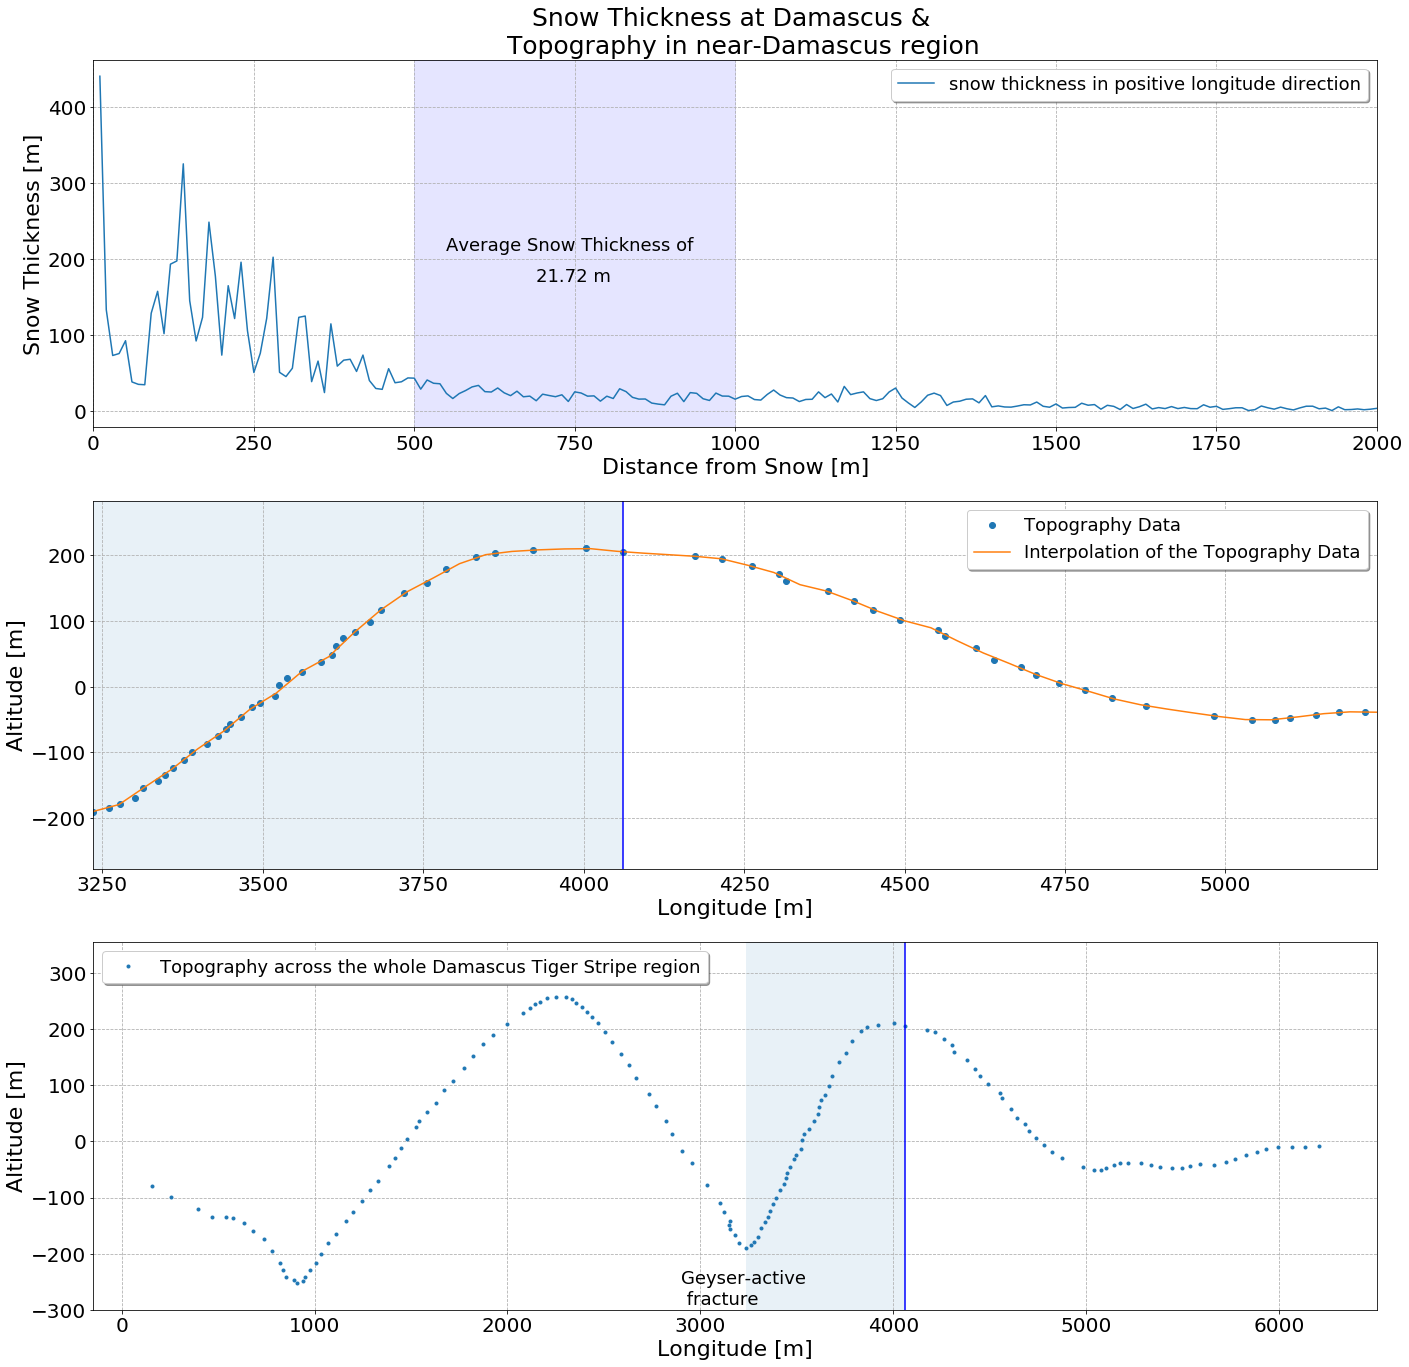

In [124]:
from scipy import interpolate
snow_data = np.genfromtxt('snow-thickness-at-damascus-100kyr.txt', skip_header = True).T  
topography = np.genfromtxt('damascus-topography.txt', skip_header = True).T
pl.rcParams["figure.figsize"] = (23, 23)
fig, ((ax1,ax2, ax3)) = pl.subplots(3)

# C U T T I N G
b = np.where(topography[0]>3235)
a = np.where(topography[0]<4500)
topography_cut_x = topography[0][74:118]
topography_cut_y = topography[1][74:118]


x_t = np.gradient(topography_cut_x)
y_t = np.gradient(topography_cut_y)
x_t_new = np.where(y_t < -1.42857143)
#print(x_t_new)
#print(y_t)
gradient = topography_cut_x[x_t_new]
gradient2 = min(gradient)
#print(topography_cut_x[x_t_new])



topography_interpolated = interp1d(topography[0], topography[1])
xnew = np.linspace(3235, 3235+2000, endpoint=True)
xnew2 = np.linspace(min(snow_data[0]), 2000, endpoint=True)

print(topography_interpolated)
yt = np.gradient(topography_interpolated)
#xtnew = np.where(yt < 1)

snow_interpolated = interp1d(snow_data[0], snow_data[1])
snowthickness = gradient2-3235.98820059
print(snowthickness)
w = np.where(snow_data[0] > snowthickness)
print('We will pick a snow thickness of', snow_data[1][82], 'm')



ax1.plot(snow_data[0], snow_data[1], label='snow thickness in positive longitude direction')
ax2.plot(topography[0], topography[1], 'o', xnew, topography_interpolated(xnew), '-', label='Interpolation of the Topography Data')
ax3.plot(topography[0], topography[1], linestyle='None', marker='.', label='Topography across the whole Damascus Tiger Stripe region')

ax1.set_xlabel('Distance from Snow [m]',fontsize=22)
ax1.set_ylabel('Snow Thickness [m]', fontsize=22)
ax1.set_xlim(0, max(snow_data[0]))
#ax1.set_xlim(800, 900)
ax2.set_xlim(3235.98820059, 3235.98820059+2000)
#ax3.set_xlim(3235.98820059, 3235.98820059+2000)

a = np.where(snow_data[1]<10) 
b = min(snow_data[0][a])





ax2.axvspan(xmin = 3235.98820059 , xmax= gradient2, alpha=0.1)
ax3.axvspan(xmin = 3235.98820059, xmax= gradient2, alpha=0.1)
ax2.axvline(gradient2, c='b')
#ax1.axvline(snowthickness, c='g')
#ax1.axhline(snow_data[1][82], c='g') Snow Thickness 25 m
ax1.axvspan(xmin=500,xmax=1000, color='b', alpha=0.1)
ax1.text(550, 210, 'Average Snow Thickness of', fontsize = 18)
ax1.text(690, 170, str(round(snow_average,2)) + ' m', fontsize=18)
#ax1.scatter(snowthickness, snow_data[1][82], s=150, c='g')
#ax1.text(840, 50, 'Snow Thickness $=$ 25 m', fontsize=18, style='italic')
ax3.axvline(gradient2, c='b')
ax2.set_xlabel('Longitude [m]', fontsize=22)
ax2.set_ylabel('Altitude [m]', fontsize=22)
ax1.set_title('Snow Thickness at Damascus & \n  Topography in near-Damascus region', fontsize=25)
ax3.set_xlabel('Longitude [m]', fontsize=22)
ax3.set_ylabel('Altitude [m]', fontsize=22)
ax3.set_ylim(-300, 355)



ax1.legend(fontsize=18, shadow=True)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax2.legend(['Topography Data', 'Interpolation of the Topography Data'], fontsize = 18, shadow=True)
ax3.legend(fontsize=18, loc='upper left', shadow=True)
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
ax3.grid(linestyle='--')
ax3.text(2900,-290, 'Geyser-active \n fracture', fontsize=18)
print(gradient2-3235.98820059)
#X, Y = np.meshgrid(np.arange(3200-0.2*np.pi, 3200-0.01*np.pi, .06), np.arange(-200-0.5*np.pi, -200+0.5*np.pi, .08))
#U = np.cos(X)
#V = np.sin(X)
#ax3.quiver(X, Y, U, V, scale=5, width=0.001)



In [76]:
a = np.where(snow_data[0]<500)
b = np.where(snow_data[0]>1000)
c = np.array(a)
d = np.array(d)
snow_cut = snow_data[1][c.max():d.min()]
#print(snow_cut)
snow_average = np.mean(snow_cut)
print(snow_average)

21.723977739971097


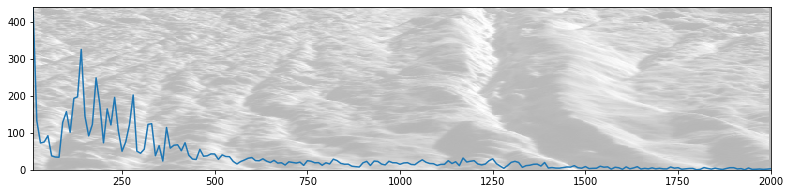

In [123]:
pl.rcParams["figure.figsize"] = (18, 3)
img = Image.open('DamscusSulcus.jpg')
extent = np.min(snow_data[0]), np.max(snow_data[0]), np.min(snow_data[1]), np.max(snow_data[1])
pl.imshow(img, alpha=0.3, extent=extent)
pl.plot(snow_data[0], snow_data[1], label='snow thickness in positive longitude direction')